<a href="http://cocl.us/pytorch_link_top?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork20647850-2022-01-01">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />


<h1><h1>Pre-trained-Models with PyTorch </h1>


In this lab, you will use pre-trained models to classify between the negative and positive samples; you will be provided with the dataset object. The particular pre-trained model will be resnet18; you will have three questions:

<ul>
<li>change the output layer</li>
<li> train the model</li> 
<li>  identify  several  misclassified samples</li> 
 </ul>
You will take several screenshots of your work and share your notebook. 


<h2>Table of Contents</h2>


<div class="alert alert-block alert-info" style="margin-top: 20px">

<ul>
    <li><a href="https://#download_data"> Download Data</a></li>
    <li><a href="https://#auxiliary"> Imports and Auxiliary Functions </a></li>
    <li><a href="https://#data_class"> Dataset Class</a></li>
    <li><a href="https://#Question_1">Question 1</a></li>
    <li><a href="https://#Question_2">Question 2</a></li>
    <li><a href="https://#Question_3">Question 3</a></li>
</ul>
<p>Estimated Time Needed: <strong>120 min</strong></p>
 </div>
<hr>


<h2 id="download_data">Download Data</h2>


Download the dataset and unzip the files in your data directory, unlike the other labs, all the data will be deleted after you close  the lab, this may take some time:


In [2]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip 

--2022-10-23 14:58:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2598656062 (2.4G) [application/zip]
Saving to: ‘Positive_tensors.zip’

Positive_tensors.zi 100%[===================>]   2.42G  10.4MB/s    in 3m 43s  

2022-10-23 15:02:39 (11.1 MB/s) - ‘Positive_tensors.zip’ saved [2598656062/2598656062]



In [3]:
!unzip -o Positive_tensors.zip 

Archive:  Positive_tensors.zip
   creating: Positive_tensors/
  inflating: Positive_tensors/5114.pt  
  inflating: Positive_tensors/17137.pt  
  inflating: Positive_tensors/10854.pt  
  inflating: Positive_tensors/2877.pt  
  inflating: Positive_tensors/5285.pt  
  inflating: Positive_tensors/7011.pt  
  inflating: Positive_tensors/15032.pt  
  inflating: Positive_tensors/12951.pt  
  inflating: Positive_tensors/7380.pt  
  inflating: Positive_tensors/18349.pt  
  inflating: Positive_tensors/3789.pt  
  inflating: Positive_tensors/3418.pt  
  inflating: Positive_tensors/4278.pt  
  inflating: Positive_tensors/19025.pt  
  inflating: Positive_tensors/12652.pt  
  inflating: Positive_tensors/2774.pt  
  inflating: Positive_tensors/10757.pt  
  inflating: Positive_tensors/9103.pt  
  inflating: Positive_tensors/9292.pt  
  inflating: Positive_tensors/19165.pt  
  inflating: Positive_tensors/12712.pt  
  inflating: Positive_tensors/12483.pt  
  inflating: Positive_tensors/10617.pt  
  infl

  inflating: Positive_tensors/13728.pt  
  inflating: Positive_tensors/479.pt  
  inflating: Positive_tensors/8079.pt  
  inflating: Positive_tensors/5093.pt  
  inflating: Positive_tensors/5302.pt  
  inflating: Positive_tensors/17321.pt  
  inflating: Positive_tensors/7196.pt  
  inflating: Positive_tensors/7207.pt  
  inflating: Positive_tensors/15224.pt  
  inflating: Positive_tensors/12444.pt  
  inflating: Positive_tensors/19233.pt  
  inflating: Positive_tensors/9084.pt  
  inflating: Positive_tensors/9315.pt  
  inflating: Positive_tensors/2562.pt  
  inflating: Positive_tensors/10541.pt  
  inflating: Positive_tensors/1808.pt  
  inflating: Positive_tensors/14148.pt  
  inflating: Positive_tensors/14008.pt  
  inflating: Positive_tensors/14399.pt  
  inflating: Positive_tensors/1948.pt  
  inflating: Positive_tensors/12695.pt  
  inflating: Positive_tensors/12504.pt  
  inflating: Positive_tensors/19373.pt  
  inflating: Positive_tensors/9255.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/8896.pt  
  inflating: Positive_tensors/4782.pt  
  inflating: Positive_tensors/16430.pt  
  inflating: Positive_tensors/4413.pt  
  inflating: Positive_tensors/9768.pt  
  inflating: Positive_tensors/12039.pt  
  inflating: Positive_tensors/7979.pt  
  inflating: Positive_tensors/15659.pt  
  inflating: Positive_tensors/4881.pt  
  inflating: Positive_tensors/11250.pt  
  inflating: Positive_tensors/3273.pt  
  inflating: Positive_tensors/8795.pt  
  inflating: Positive_tensors/8404.pt  
  inflating: Positive_tensors/395.pt  
  inflating: Positive_tensors/18522.pt  
  inflating: Positive_tensors/6984.pt  
  inflating: Positive_tensors/13355.pt  
  inflating: Positive_tensors/1376.pt  
  inflating: Positive_tensors/11081.pt  
  inflating: Positive_tensors/3333.pt  
  inflating: Positive_tensors/11310.pt  
  inflating: Positive_tensors/8544.pt  
  inflating: Positive_tensors/144.pt  
  inflating: Positive_tensors/18462.pt  
  inflating: Positive_tensors/131

  inflating: Positive_tensors/13330.pt  
  inflating: Positive_tensors/1082.pt  
  inflating: Positive_tensors/5809.pt  
  inflating: Positive_tensors/10149.pt  
  inflating: Positive_tensors/16445.pt  
  inflating: Positive_tensors/4466.pt  
  inflating: Positive_tensors/14540.pt  
  inflating: Positive_tensors/6563.pt  
  inflating: Positive_tensors/1092.pt  
  inflating: Positive_tensors/13320.pt  
  inflating: Positive_tensors/1303.pt  
  inflating: Positive_tensors/18557.pt  
  inflating: Positive_tensors/8471.pt  
  inflating: Positive_tensors/3197.pt  
  inflating: Positive_tensors/11225.pt  
  inflating: Positive_tensors/3206.pt  
  inflating: Positive_tensors/17729.pt  
  inflating: Positive_tensors/19938.pt  
  inflating: Positive_tensors/17669.pt  
  inflating: Positive_tensors/19878.pt  
  inflating: Positive_tensors/1243.pt  
  inflating: Positive_tensors/13260.pt  
  inflating: Positive_tensors/14892.pt  
  inflating: Positive_tensors/131.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/4891.pt  
  inflating: Positive_tensors/15649.pt  
  inflating: Positive_tensors/13254.pt  
  inflating: Positive_tensors/1277.pt  
  inflating: Positive_tensors/6885.pt  
  inflating: Positive_tensors/294.pt  
  inflating: Positive_tensors/105.pt  
  inflating: Positive_tensors/18423.pt  
  inflating: Positive_tensors/8505.pt  
  inflating: Positive_tensors/8694.pt  
  inflating: Positive_tensors/11351.pt  
  inflating: Positive_tensors/3372.pt  
  inflating: Positive_tensors/4980.pt  
  inflating: Positive_tensors/15758.pt  
  inflating: Positive_tensors/7878.pt  
  inflating: Positive_tensors/12138.pt  
  inflating: Positive_tensors/9669.pt  
  inflating: Positive_tensors/16531.pt  
  inflating: Positive_tensors/4512.pt  
  inflating: Positive_tensors/4683.pt  
  inflating: Positive_tensors/8997.pt  
  inflating: Positive_tensors/14434.pt  
  inflating: Positive_tensors/6417.pt  
  inflating: Positive_tensors/6786.pt  
  inflating: Positive_tensors/4452

  inflating: Positive_tensors/5130.pt  
  inflating: Positive_tensors/17113.pt  
  inflating: Positive_tensors/17282.pt  
  inflating: Positive_tensors/10870.pt  
  inflating: Positive_tensors/2853.pt  
  inflating: Positive_tensors/1539.pt  
  inflating: Positive_tensors/948.pt  
  inflating: Positive_tensors/6359.pt  
  inflating: Positive_tensors/13988.pt  
  inflating: Positive_tensors/9127.pt  
  inflating: Positive_tensors/2750.pt  
  inflating: Positive_tensors/10773.pt  
  inflating: Positive_tensors/12676.pt  
  inflating: Positive_tensors/19001.pt  
  inflating: Positive_tensors/19390.pt  
  inflating: Positive_tensors/9067.pt  
  inflating: Positive_tensors/10633.pt  
  inflating: Positive_tensors/2610.pt  
  inflating: Positive_tensors/2581.pt  
  inflating: Positive_tensors/12736.pt  
  inflating: Positive_tensors/19141.pt  
  inflating: Positive_tensors/808.pt  
  inflating: Positive_tensors/6188.pt  
  inflating: Positive_tensors/6219.pt  
  inflating: Positive_tensors/1

  inflating: Positive_tensors/19155.pt  
  inflating: Positive_tensors/12722.pt  
  inflating: Positive_tensors/10627.pt  
  inflating: Positive_tensors/2604.pt  
  inflating: Positive_tensors/2595.pt  
  inflating: Positive_tensors/9073.pt  
  inflating: Positive_tensors/4099.pt  
  inflating: Positive_tensors/4308.pt  
  inflating: Positive_tensors/11899.pt  
  inflating: Positive_tensors/4248.pt  
  inflating: Positive_tensors/19015.pt  
  inflating: Positive_tensors/19384.pt  
  inflating: Positive_tensors/12662.pt  
  inflating: Positive_tensors/2744.pt  
  inflating: Positive_tensors/10767.pt  
  inflating: Positive_tensors/9133.pt  
  inflating: Positive_tensors/5124.pt  
  inflating: Positive_tensors/17107.pt  
  inflating: Positive_tensors/10864.pt  
  inflating: Positive_tensors/2847.pt  
  inflating: Positive_tensors/17296.pt  
  inflating: Positive_tensors/7021.pt  
  inflating: Positive_tensors/15002.pt  
  inflating: Positive_tensors/12961.pt  
  inflating: Positive_tenso

  inflating: Positive_tensors/7377.pt  
  inflating: Positive_tensors/13658.pt  
  inflating: Positive_tensors/698.pt  
  inflating: Positive_tensors/509.pt  
  inflating: Positive_tensors/8109.pt  
  inflating: Positive_tensors/8298.pt  
  inflating: Positive_tensors/14038.pt  
  inflating: Positive_tensors/1978.pt  
  inflating: Positive_tensors/12534.pt  
  inflating: Positive_tensors/19343.pt  
  inflating: Positive_tensors/9265.pt  
  inflating: Positive_tensors/2783.pt  
  inflating: Positive_tensors/10431.pt  
  inflating: Positive_tensors/2412.pt  
  inflating: Positive_tensors/29.pt  
  inflating: Positive_tensors/12474.pt  
  inflating: Positive_tensors/19192.pt  
  inflating: Positive_tensors/19203.pt  
  inflating: Positive_tensors/9325.pt  
  inflating: Positive_tensors/2552.pt  
  inflating: Positive_tensors/10571.pt  
  inflating: Positive_tensors/1838.pt  
  inflating: Positive_tensors/14178.pt  
  inflating: Positive_tensors/13718.pt  
  inflating: Positive_tensors/134

  inflating: Positive_tensors/1206.pt  
  inflating: Positive_tensors/13225.pt  
  inflating: Positive_tensors/15729.pt  
  inflating: Positive_tensors/15669.pt  
  inflating: Positive_tensors/16892.pt  
  inflating: Positive_tensors/11260.pt  
  inflating: Positive_tensors/3243.pt  
  inflating: Positive_tensors/8434.pt  
  inflating: Positive_tensors/18683.pt  
  inflating: Positive_tensors/18512.pt  
  inflating: Positive_tensors/14997.pt  
  inflating: Positive_tensors/13365.pt  
  inflating: Positive_tensors/1346.pt  
  inflating: Positive_tensors/14694.pt  
  inflating: Positive_tensors/14505.pt  
  inflating: Positive_tensors/6526.pt  
  inflating: Positive_tensors/18980.pt  
  inflating: Positive_tensors/16791.pt  
  inflating: Positive_tensors/16400.pt  
  inflating: Positive_tensors/4423.pt  
  inflating: Positive_tensors/9758.pt  
  inflating: Positive_tensors/12009.pt  
  inflating: Positive_tensors/7949.pt  
  inflating: Positive_tensors/12398.pt  
  inflating: Positive_te

  inflating: Positive_tensors/3376.pt  
  inflating: Positive_tensors/11355.pt  
  inflating: Positive_tensors/4984.pt  
  inflating: Positive_tensors/13081.pt  
  inflating: Positive_tensors/13310.pt  
  inflating: Positive_tensors/1333.pt  
  inflating: Positive_tensors/18567.pt  
  inflating: Positive_tensors/8441.pt  
  inflating: Positive_tensors/11184.pt  
  inflating: Positive_tensors/11215.pt  
  inflating: Positive_tensors/3236.pt  
  inflating: Positive_tensors/17719.pt  
  inflating: Positive_tensors/17488.pt  
  inflating: Positive_tensors/19908.pt  
  inflating: Positive_tensors/5839.pt  
  inflating: Positive_tensors/10179.pt  
  inflating: Positive_tensors/16475.pt  
  inflating: Positive_tensors/4456.pt  
  inflating: Positive_tensors/14570.pt  
  inflating: Positive_tensors/6553.pt  
  inflating: Positive_tensors/5928.pt  
  inflating: Positive_tensors/10068.pt  
  inflating: Positive_tensors/4547.pt  
  inflating: Positive_tensors/16564.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/7908.pt  
  inflating: Positive_tensors/9488.pt  
  inflating: Positive_tensors/9719.pt  
  inflating: Positive_tensors/12299.pt  
  inflating: Positive_tensors/7848.pt  
  inflating: Positive_tensors/12108.pt  
  inflating: Positive_tensors/9659.pt  
  inflating: Positive_tensors/16501.pt  
  inflating: Positive_tensors/4522.pt  
  inflating: Positive_tensors/16690.pt  
  inflating: Positive_tensors/18881.pt  
  inflating: Positive_tensors/14404.pt  
  inflating: Positive_tensors/6427.pt  
  inflating: Positive_tensors/14795.pt  
  inflating: Positive_tensors/13264.pt  
  inflating: Positive_tensors/1247.pt  
  inflating: Positive_tensors/14896.pt  
  inflating: Positive_tensors/18413.pt  
  inflating: Positive_tensors/18782.pt  
  inflating: Positive_tensors/135.pt  
  inflating: Positive_tensors/8535.pt  
  inflating: Positive_tensors/11361.pt  
  inflating: Positive_tensors/3342.pt  
  inflating: Positive_tensors/16993.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/12945.pt  
  inflating: Positive_tensors/5100.pt  
  inflating: Positive_tensors/17123.pt  
  inflating: Positive_tensors/5291.pt  
  inflating: Positive_tensors/10840.pt  
  inflating: Positive_tensors/2863.pt  
  inflating: Positive_tensors/1698.pt  
  inflating: Positive_tensors/1509.pt  
  inflating: Positive_tensors/15137.pt  
  inflating: Positive_tensors/7114.pt  
  inflating: Positive_tensors/7285.pt  
  inflating: Positive_tensors/12854.pt  
  inflating: Positive_tensors/17032.pt  
  inflating: Positive_tensors/5011.pt  
  inflating: Positive_tensors/5380.pt  
  inflating: Positive_tensors/2972.pt  
  inflating: Positive_tensors/10951.pt  
  inflating: Positive_tensors/1789.pt  
  inflating: Positive_tensors/1418.pt  
  inflating: Positive_tensors/869.pt  
  inflating: Positive_tensors/6278.pt  
  inflating: Positive_tensors/9006.pt  
  inflating: Positive_tensors/9397.pt  
  inflating: Positive_tensors/10652.pt  
  inflating: Positive_tensors/267

  inflating: Positive_tensors/5125.pt  
  inflating: Positive_tensors/15392.pt  
  inflating: Positive_tensors/12960.pt  
  inflating: Positive_tensors/15003.pt  
  inflating: Positive_tensors/7020.pt  
  inflating: Positive_tensors/12663.pt  
  inflating: Positive_tensors/19385.pt  
  inflating: Positive_tensors/19014.pt  
  inflating: Positive_tensors/9132.pt  
  inflating: Positive_tensors/10766.pt  
  inflating: Positive_tensors/2745.pt  
  inflating: Positive_tensors/4249.pt  
  inflating: Positive_tensors/11898.pt  
  inflating: Positive_tensors/12772.pt  
  inflating: Positive_tensors/19294.pt  
  inflating: Positive_tensors/19105.pt  
  inflating: Positive_tensors/9023.pt  
  inflating: Positive_tensors/2654.pt  
  inflating: Positive_tensors/10677.pt  
  inflating: Positive_tensors/4358.pt  
  inflating: Positive_tensors/11989.pt  
  inflating: Positive_tensors/18269.pt  
  inflating: Positive_tensors/3538.pt  
  inflating: Positive_tensors/17386.pt  
  inflating: Positive_ten

  inflating: Positive_tensors/15355.pt  
  inflating: Positive_tensors/17310.pt  
  inflating: Positive_tensors/5333.pt  
  inflating: Positive_tensors/17081.pt  
  inflating: Positive_tensors/15215.pt  
  inflating: Positive_tensors/7236.pt  
  inflating: Positive_tensors/15184.pt  
  inflating: Positive_tensors/448.pt  
  inflating: Positive_tensors/13488.pt  
  inflating: Positive_tensors/13719.pt  
  inflating: Positive_tensors/8048.pt  
  inflating: Positive_tensors/14179.pt  
  inflating: Positive_tensors/1839.pt  
  inflating: Positive_tensors/19202.pt  
  inflating: Positive_tensors/19193.pt  
  inflating: Positive_tensors/12475.pt  
  inflating: Positive_tensors/10570.pt  
  inflating: Positive_tensors/2553.pt  
  inflating: Positive_tensors/9324.pt  
  inflating: Positive_tensors/14068.pt  
  inflating: Positive_tensors/1928.pt  
  inflating: Positive_tensors/19313.pt  
  inflating: Positive_tensors/19082.pt  
  inflating: Positive_tensors/12564.pt  
  inflating: Positive_ten

  inflating: Positive_tensors/14504.pt  
  inflating: Positive_tensors/14695.pt  
  inflating: Positive_tensors/4422.pt  
  inflating: Positive_tensors/16401.pt  
  inflating: Positive_tensors/16790.pt  
  inflating: Positive_tensors/8435.pt  
  inflating: Positive_tensors/3242.pt  
  inflating: Positive_tensors/11261.pt  
  inflating: Positive_tensors/16893.pt  
  inflating: Positive_tensors/1347.pt  
  inflating: Positive_tensors/13364.pt  
  inflating: Positive_tensors/14996.pt  
  inflating: Positive_tensors/18513.pt  
  inflating: Positive_tensors/18682.pt  
  inflating: Positive_tensors/15668.pt  
  inflating: Positive_tensors/5449.pt  
  inflating: Positive_tensors/11166.pt  
  inflating: Positive_tensors/3145.pt  
  inflating: Positive_tensors/4826.pt  
  inflating: Positive_tensors/16805.pt  
  inflating: Positive_tensors/8732.pt  
  inflating: Positive_tensors/332.pt  
  inflating: Positive_tensors/18585.pt  
  inflating: Positive_tensors/18614.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/4686.pt  
  inflating: Positive_tensors/14431.pt  
  inflating: Positive_tensors/6412.pt  
  inflating: Positive_tensors/6783.pt  
  inflating: Positive_tensors/4457.pt  
  inflating: Positive_tensors/16474.pt  
  inflating: Positive_tensors/6552.pt  
  inflating: Positive_tensors/14571.pt  
  inflating: Positive_tensors/10178.pt  
  inflating: Positive_tensors/5838.pt  
  inflating: Positive_tensors/17489.pt  
  inflating: Positive_tensors/17718.pt  
  inflating: Positive_tensors/19909.pt  
  inflating: Positive_tensors/18566.pt  
  inflating: Positive_tensors/1332.pt  
  inflating: Positive_tensors/13311.pt  
  inflating: Positive_tensors/13080.pt  
  inflating: Positive_tensors/3237.pt  
  inflating: Positive_tensors/11214.pt  
  inflating: Positive_tensors/11185.pt  
  inflating: Positive_tensors/8440.pt  
  inflating: Positive_tensors/17598.pt  
  inflating: Positive_tensors/17609.pt  
  inflating: Positive_tensors/19818.pt  
  inflating: Positive_ten

  inflating: Positive_tensors/3203.pt  
  inflating: Positive_tensors/8474.pt  
  inflating: Positive_tensors/15629.pt  
  inflating: Positive_tensors/15769.pt  
  inflating: Positive_tensors/134.pt  
  inflating: Positive_tensors/18783.pt  
  inflating: Positive_tensors/18412.pt  
  inflating: Positive_tensors/14897.pt  
  inflating: Positive_tensors/1246.pt  
  inflating: Positive_tensors/13265.pt  
  inflating: Positive_tensors/16992.pt  
  inflating: Positive_tensors/3343.pt  
  inflating: Positive_tensors/11360.pt  
  inflating: Positive_tensors/8534.pt  
  inflating: Positive_tensors/16691.pt  
  inflating: Positive_tensors/4523.pt  
  inflating: Positive_tensors/16500.pt  
  inflating: Positive_tensors/14794.pt  
  inflating: Positive_tensors/6426.pt  
  inflating: Positive_tensors/14405.pt  
  inflating: Positive_tensors/18880.pt  
  inflating: Positive_tensors/12109.pt  
  inflating: Positive_tensors/7849.pt  
  inflating: Positive_tensors/12298.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/10841.pt  
  inflating: Positive_tensors/5290.pt  
  inflating: Positive_tensors/17122.pt  
  inflating: Positive_tensors/5101.pt  
  inflating: Positive_tensors/10742.pt  
  inflating: Positive_tensors/2761.pt  
  inflating: Positive_tensors/9287.pt  
  inflating: Positive_tensors/9116.pt  
  inflating: Positive_tensors/19030.pt  
  inflating: Positive_tensors/12647.pt  
  inflating: Positive_tensors/6368.pt  
  inflating: Positive_tensors/979.pt  
  inflating: Positive_tensors/2670.pt  
  inflating: Positive_tensors/10653.pt  
  inflating: Positive_tensors/9396.pt  
  inflating: Positive_tensors/9007.pt  
  inflating: Positive_tensors/19121.pt  
  inflating: Positive_tensors/12756.pt  
  inflating: Positive_tensors/6279.pt  
  inflating: Positive_tensors/868.pt  
  inflating: Positive_tensors/1419.pt  
  inflating: Positive_tensors/1788.pt  
  inflating: Positive_tensors/12855.pt  
  inflating: Positive_tensors/7284.pt  
  inflating: Positive_tensors/711

  inflating: Positive_tensors/7150.pt  
  inflating: Positive_tensors/15173.pt  
  inflating: Positive_tensors/12810.pt  
  inflating: Positive_tensors/18208.pt  
  inflating: Positive_tensors/18199.pt  
  inflating: Positive_tensors/3559.pt  
  inflating: Positive_tensors/4339.pt  
  inflating: Positive_tensors/12482.pt  
  inflating: Positive_tensors/12713.pt  
  inflating: Positive_tensors/19164.pt  
  inflating: Positive_tensors/9042.pt  
  inflating: Positive_tensors/10587.pt  
  inflating: Positive_tensors/2635.pt  
  inflating: Positive_tensors/10616.pt  
  inflating: Positive_tensors/4228.pt  
  inflating: Positive_tensors/12593.pt  
  inflating: Positive_tensors/12602.pt  
  inflating: Positive_tensors/19075.pt  
  inflating: Positive_tensors/9153.pt  
  inflating: Positive_tensors/10496.pt  
  inflating: Positive_tensors/10707.pt  
  inflating: Positive_tensors/2724.pt  
  inflating: Positive_tensors/17167.pt  
  inflating: Positive_tensors/5144.pt  
  inflating: Positive_ten

  inflating: Positive_tensors/17260.pt  
  inflating: Positive_tensors/12997.pt  
  inflating: Positive_tensors/7346.pt  
  inflating: Positive_tensors/15365.pt  
  inflating: Positive_tensors/19372.pt  
  inflating: Positive_tensors/12505.pt  
  inflating: Positive_tensors/12694.pt  
  inflating: Positive_tensors/2423.pt  
  inflating: Positive_tensors/18.pt  
  inflating: Positive_tensors/10400.pt  
  inflating: Positive_tensors/10791.pt  
  inflating: Positive_tensors/9254.pt  
  inflating: Positive_tensors/1949.pt  
  inflating: Positive_tensors/14398.pt  
  inflating: Positive_tensors/14009.pt  
  inflating: Positive_tensors/19263.pt  
  inflating: Positive_tensors/12414.pt  
  inflating: Positive_tensors/12785.pt  
  inflating: Positive_tensors/10511.pt  
  inflating: Positive_tensors/2532.pt  
  inflating: Positive_tensors/10680.pt  
  inflating: Positive_tensors/9345.pt  
  inflating: Positive_tensors/1858.pt  
  inflating: Positive_tensors/14289.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/9629.pt  
  inflating: Positive_tensors/12178.pt  
  inflating: Positive_tensors/7838.pt  
  inflating: Positive_tensors/15489.pt  
  inflating: Positive_tensors/15718.pt  
  inflating: Positive_tensors/8545.pt  
  inflating: Positive_tensors/11311.pt  
  inflating: Positive_tensors/3332.pt  
  inflating: Positive_tensors/11080.pt  
  inflating: Positive_tensors/13214.pt  
  inflating: Positive_tensors/1237.pt  
  inflating: Positive_tensors/13185.pt  
  inflating: Positive_tensors/18463.pt  
  inflating: Positive_tensors/145.pt  
  inflating: Positive_tensors/16975.pt  
  inflating: Positive_tensors/4956.pt  
  inflating: Positive_tensors/11387.pt  
  inflating: Positive_tensors/3035.pt  
  inflating: Positive_tensors/11016.pt  
  inflating: Positive_tensors/8642.pt  
  inflating: Positive_tensors/18764.pt  
  inflating: Positive_tensors/242.pt  
  inflating: Positive_tensors/14870.pt  
  inflating: Positive_tensors/6853.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/6422.pt  
  inflating: Positive_tensors/14790.pt  
  inflating: Positive_tensors/18884.pt  
  inflating: Positive_tensors/18416.pt  
  inflating: Positive_tensors/18787.pt  
  inflating: Positive_tensors/130.pt  
  inflating: Positive_tensors/14893.pt  
  inflating: Positive_tensors/13261.pt  
  inflating: Positive_tensors/1242.pt  
  inflating: Positive_tensors/16996.pt  
  inflating: Positive_tensors/11364.pt  
  inflating: Positive_tensors/3347.pt  
  inflating: Positive_tensors/8530.pt  
  inflating: Positive_tensors/17668.pt  
  inflating: Positive_tensors/19879.pt  
  inflating: Positive_tensors/18507.pt  
  inflating: Positive_tensors/18696.pt  
  inflating: Positive_tensors/14982.pt  
  inflating: Positive_tensors/1353.pt  
  inflating: Positive_tensors/13370.pt  
  inflating: Positive_tensors/16887.pt  
  inflating: Positive_tensors/3256.pt  
  inflating: Positive_tensors/11275.pt  
  inflating: Positive_tensors/8421.pt  
  inflating: Positive_ten

  inflating: Positive_tensors/11350.pt  
  inflating: Positive_tensors/8695.pt  
  inflating: Positive_tensors/8504.pt  
  inflating: Positive_tensors/18562.pt  
  inflating: Positive_tensors/13084.pt  
  inflating: Positive_tensors/13315.pt  
  inflating: Positive_tensors/1336.pt  
  inflating: Positive_tensors/11181.pt  
  inflating: Positive_tensors/11210.pt  
  inflating: Positive_tensors/3233.pt  
  inflating: Positive_tensors/8444.pt  
  inflating: Positive_tensors/15619.pt  
  inflating: Positive_tensors/15588.pt  
  inflating: Positive_tensors/7939.pt  
  inflating: Positive_tensors/12079.pt  
  inflating: Positive_tensors/9728.pt  
  inflating: Positive_tensors/16470.pt  
  inflating: Positive_tensors/4453.pt  
  inflating: Positive_tensors/14575.pt  
  inflating: Positive_tensors/6556.pt  
  inflating: Positive_tensors/1285.pt  
  inflating: Positive_tensors/14854.pt  
  inflating: Positive_tensors/6877.pt  
  inflating: Positive_tensors/1114.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/2611.pt  
  inflating: Positive_tensors/10632.pt  
  inflating: Positive_tensors/9066.pt  
  inflating: Positive_tensors/19140.pt  
  inflating: Positive_tensors/12737.pt  
  inflating: Positive_tensors/6309.pt  
  inflating: Positive_tensors/6098.pt  
  inflating: Positive_tensors/918.pt  
  inflating: Positive_tensors/2491.pt  
  inflating: Positive_tensors/10723.pt  
  inflating: Positive_tensors/2700.pt  
  inflating: Positive_tensors/9177.pt  
  inflating: Positive_tensors/19051.pt  
  inflating: Positive_tensors/12626.pt  
  inflating: Positive_tensors/15046.pt  
  inflating: Positive_tensors/7065.pt  
  inflating: Positive_tensors/12925.pt  
  inflating: Positive_tensors/17143.pt  
  inflating: Positive_tensors/5160.pt  
  inflating: Positive_tensors/2803.pt  
  inflating: Positive_tensors/10820.pt  
  inflating: Positive_tensors/1569.pt  
  inflating: Positive_tensors/1429.pt  
  inflating: Positive_tensors/12865.pt  
  inflating: Positive_tensors/

  inflating: Positive_tensors/18439.pt  
  inflating: Positive_tensors/3368.pt  
  inflating: Positive_tensors/4508.pt  
  inflating: Positive_tensors/4699.pt  
  inflating: Positive_tensors/19755.pt  
  inflating: Positive_tensors/7862.pt  
  inflating: Positive_tensors/15841.pt  
  inflating: Positive_tensors/12122.pt  
  inflating: Positive_tensors/5967.pt  
  inflating: Positive_tensors/17944.pt  
  inflating: Positive_tensors/2395.pt  
  inflating: Positive_tensors/10027.pt  
  inflating: Positive_tensors/2004.pt  
  inflating: Positive_tensors/9673.pt  
  inflating: Positive_tensors/4419.pt  
  inflating: Positive_tensors/4788.pt  
  inflating: Positive_tensors/19644.pt  
  inflating: Positive_tensors/15950.pt  
  inflating: Positive_tensors/7973.pt  
  inflating: Positive_tensors/12033.pt  
  inflating: Positive_tensors/17855.pt  
  inflating: Positive_tensors/5876.pt  
  inflating: Positive_tensors/2284.pt  
  inflating: Positive_tensors/2115.pt  
  inflating: Positive_tensors/

  inflating: Positive_tensors/7615.pt  
  inflating: Positive_tensors/7584.pt  
  inflating: Positive_tensors/19922.pt  
  inflating: Positive_tensors/1088.pt  
  inflating: Positive_tensors/1319.pt  
  inflating: Positive_tensors/14778.pt  
  inflating: Positive_tensors/12274.pt  
  inflating: Positive_tensors/15886.pt  
  inflating: Positive_tensors/19403.pt  
  inflating: Positive_tensors/19792.pt  
  inflating: Positive_tensors/9525.pt  
  inflating: Positive_tensors/2352.pt  
  inflating: Positive_tensors/10371.pt  
  inflating: Positive_tensors/17983.pt  
  inflating: Positive_tensors/5532.pt  
  inflating: Positive_tensors/17511.pt  
  inflating: Positive_tensors/17680.pt  
  inflating: Positive_tensors/19891.pt  
  inflating: Positive_tensors/7437.pt  
  inflating: Positive_tensors/15414.pt  
  inflating: Positive_tensors/15785.pt  
  inflating: Positive_tensors/13289.pt  
  inflating: Positive_tensors/6858.pt  
  inflating: Positive_tensors/13118.pt  
  inflating: Positive_ten

  inflating: Positive_tensors/18312.pt  
  inflating: Positive_tensors/18083.pt  
  inflating: Positive_tensors/634.pt  
  inflating: Positive_tensors/13565.pt  
  inflating: Positive_tensors/1546.pt  
  inflating: Positive_tensors/15069.pt  
  inflating: Positive_tensors/85.pt  
  inflating: Positive_tensors/9158.pt  
  inflating: Positive_tensors/12598.pt  
  inflating: Positive_tensors/12609.pt  
  inflating: Positive_tensors/14305.pt  
  inflating: Positive_tensors/6326.pt  
  inflating: Positive_tensors/14094.pt  
  inflating: Positive_tensors/937.pt  
  inflating: Positive_tensors/16200.pt  
  inflating: Positive_tensors/4223.pt  
  inflating: Positive_tensors/16191.pt  
  inflating: Positive_tensors/1894.pt  
  inflating: Positive_tensors/6266.pt  
  inflating: Positive_tensors/14245.pt  
  inflating: Positive_tensors/877.pt  
  inflating: Positive_tensors/3991.pt  
  inflating: Positive_tensors/4363.pt  
  inflating: Positive_tensors/16340.pt  
  inflating: Positive_tensors/938

  inflating: Positive_tensors/641.pt  
  inflating: Positive_tensors/8241.pt  
  inflating: Positive_tensors/11415.pt  
  inflating: Positive_tensors/3436.pt  
  inflating: Positive_tensors/11784.pt  
  inflating: Positive_tensors/16275.pt  
  inflating: Positive_tensors/4256.pt  
  inflating: Positive_tensors/11887.pt  
  inflating: Positive_tensors/942.pt  
  inflating: Positive_tensors/14370.pt  
  inflating: Positive_tensors/6353.pt  
  inflating: Positive_tensors/13982.pt  
  inflating: Positive_tensors/10779.pt  
  inflating: Positive_tensors/10639.pt  
  inflating: Positive_tensors/4316.pt  
  inflating: Positive_tensors/16335.pt  
  inflating: Positive_tensors/4087.pt  
  inflating: Positive_tensors/802.pt  
  inflating: Positive_tensors/6213.pt  
  inflating: Positive_tensors/14230.pt  
  inflating: Positive_tensors/6182.pt  
  inflating: Positive_tensors/1473.pt  
  inflating: Positive_tensors/13450.pt  
  inflating: Positive_tensors/18227.pt  
  inflating: Positive_tensors/4

  inflating: Positive_tensors/1447.pt  
  inflating: Positive_tensors/18182.pt  
  inflating: Positive_tensors/18213.pt  
  inflating: Positive_tensors/735.pt  
  inflating: Positive_tensors/8335.pt  
  inflating: Positive_tensors/11561.pt  
  inflating: Positive_tensors/3542.pt  
  inflating: Positive_tensors/1696.pt  
  inflating: Positive_tensors/1507.pt  
  inflating: Positive_tensors/13524.pt  
  inflating: Positive_tensors/18353.pt  
  inflating: Positive_tensors/675.pt  
  inflating: Positive_tensors/8275.pt  
  inflating: Positive_tensors/3793.pt  
  inflating: Positive_tensors/3402.pt  
  inflating: Positive_tensors/11421.pt  
  inflating: Positive_tensors/15028.pt  
  inflating: Positive_tensors/12648.pt  
  inflating: Positive_tensors/9119.pt  
  inflating: Positive_tensors/9288.pt  
  inflating: Positive_tensors/4262.pt  
  inflating: Positive_tensors/16241.pt  
  inflating: Positive_tensors/3890.pt  
  inflating: Positive_tensors/976.pt  
  inflating: Positive_tensors/6367

  inflating: Positive_tensors/17663.pt  
  inflating: Positive_tensors/5640.pt  
  inflating: Positive_tensors/9954.pt  
  inflating: Positive_tensors/1249.pt  
  inflating: Positive_tensors/14898.pt  
  inflating: Positive_tensors/6429.pt  
  inflating: Positive_tensors/9657.pt  
  inflating: Positive_tensors/10392.pt  
  inflating: Positive_tensors/5943.pt  
  inflating: Positive_tensors/17960.pt  
  inflating: Positive_tensors/10003.pt  
  inflating: Positive_tensors/2020.pt  
  inflating: Positive_tensors/12297.pt  
  inflating: Positive_tensors/7846.pt  
  inflating: Positive_tensors/15865.pt  
  inflating: Positive_tensors/12106.pt  
  inflating: Positive_tensors/19771.pt  
  inflating: Positive_tensors/6538.pt  
  inflating: Positive_tensors/9746.pt  
  inflating: Positive_tensors/10283.pt  
  inflating: Positive_tensors/17871.pt  
  inflating: Positive_tensors/5852.pt  
  inflating: Positive_tensors/2131.pt  
  inflating: Positive_tensors/10112.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/15583.pt  
  inflating: Positive_tensors/17717.pt  
  inflating: Positive_tensors/5734.pt  
  inflating: Positive_tensors/17486.pt  
  inflating: Positive_tensors/9820.pt  
  inflating: Positive_tensors/3238.pt  
  inflating: Positive_tensors/18569.pt  
  inflating: Positive_tensors/4538.pt  
  inflating: Positive_tensors/19765.pt  
  inflating: Positive_tensors/7852.pt  
  inflating: Positive_tensors/15871.pt  
  inflating: Positive_tensors/12283.pt  
  inflating: Positive_tensors/12112.pt  
  inflating: Positive_tensors/5957.pt  
  inflating: Positive_tensors/17974.pt  
  inflating: Positive_tensors/10386.pt  
  inflating: Positive_tensors/10017.pt  
  inflating: Positive_tensors/2034.pt  
  inflating: Positive_tensors/9643.pt  
  inflating: Positive_tensors/9940.pt  
  inflating: Positive_tensors/17677.pt  
  inflating: Positive_tensors/5654.pt  
  inflating: Positive_tensors/15772.pt  
  inflating: Positive_tensors/7751.pt  
  inflating: Positive_tenso

  inflating: Positive_tensors/15606.pt  
  inflating: Positive_tensors/7625.pt  
  inflating: Positive_tensors/15597.pt  
  inflating: Positive_tensors/19912.pt  
  inflating: Positive_tensors/1329.pt  
  inflating: Positive_tensors/6549.pt  
  inflating: Positive_tensors/19611.pt  
  inflating: Positive_tensors/19580.pt  
  inflating: Positive_tensors/7926.pt  
  inflating: Positive_tensors/15905.pt  
  inflating: Positive_tensors/12066.pt  
  inflating: Positive_tensors/5823.pt  
  inflating: Positive_tensors/17800.pt  
  inflating: Positive_tensors/10163.pt  
  inflating: Positive_tensors/2140.pt  
  inflating: Positive_tensors/9737.pt  
  inflating: Positive_tensors/19751.pt  
  inflating: Positive_tensors/12126.pt  
  inflating: Positive_tensors/15845.pt  
  inflating: Positive_tensors/7866.pt  
  inflating: Positive_tensors/2000.pt  
  inflating: Positive_tensors/10023.pt  
  inflating: Positive_tensors/17940.pt  
  inflating: Positive_tensors/5963.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/4093.pt  
  inflating: Positive_tensors/13996.pt  
  inflating: Positive_tensors/14364.pt  
  inflating: Positive_tensors/6347.pt  
  inflating: Positive_tensors/956.pt  
  inflating: Positive_tensors/11893.pt  
  inflating: Positive_tensors/16261.pt  
  inflating: Positive_tensors/4242.pt  
  inflating: Positive_tensors/9139.pt  
  inflating: Positive_tensors/12668.pt  
  inflating: Positive_tensors/15399.pt  
  inflating: Positive_tensors/15008.pt  
  inflating: Positive_tensors/11401.pt  
  inflating: Positive_tensors/3422.pt  
  inflating: Positive_tensors/11790.pt  
  inflating: Positive_tensors/8255.pt  
  inflating: Positive_tensors/18373.pt  
  inflating: Positive_tensors/655.pt  
  inflating: Positive_tensors/13504.pt  
  inflating: Positive_tensors/1527.pt  
  inflating: Positive_tensors/13695.pt  
  inflating: Positive_tensors/15288.pt  
  inflating: Positive_tensors/15119.pt  
  inflating: Positive_tensors/3533.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/1513.pt  
  inflating: Positive_tensors/13530.pt  
  inflating: Positive_tensors/17139.pt  
  inflating: Positive_tensors/2879.pt  
  inflating: Positive_tensors/2939.pt  
  inflating: Positive_tensors/17079.pt  
  inflating: Positive_tensors/11575.pt  
  inflating: Positive_tensors/3556.pt  
  inflating: Positive_tensors/8321.pt  
  inflating: Positive_tensors/18196.pt  
  inflating: Positive_tensors/18207.pt  
  inflating: Positive_tensors/721.pt  
  inflating: Positive_tensors/13470.pt  
  inflating: Positive_tensors/1453.pt  
  inflating: Positive_tensors/14181.pt  
  inflating: Positive_tensors/14210.pt  
  inflating: Positive_tensors/6233.pt  
  inflating: Positive_tensors/822.pt  
  inflating: Positive_tensors/16084.pt  
  inflating: Positive_tensors/16315.pt  
  inflating: Positive_tensors/4336.pt  
  inflating: Positive_tensors/10619.pt  
  inflating: Positive_tensors/10588.pt  
  inflating: Positive_tensors/1443.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/13545.pt  
  inflating: Positive_tensors/18332.pt  
  inflating: Positive_tensors/614.pt  
  inflating: Positive_tensors/585.pt  
  inflating: Positive_tensors/8185.pt  
  inflating: Positive_tensors/8214.pt  
  inflating: Positive_tensors/3463.pt  
  inflating: Positive_tensors/11440.pt  
  inflating: Positive_tensors/13794.pt  
  inflating: Positive_tensors/13405.pt  
  inflating: Positive_tensors/1426.pt  
  inflating: Positive_tensors/18272.pt  
  inflating: Positive_tensors/754.pt  
  inflating: Positive_tensors/8354.pt  
  inflating: Positive_tensors/11691.pt  
  inflating: Positive_tensors/11500.pt  
  inflating: Positive_tensors/3523.pt  
  inflating: Positive_tensors/15109.pt  
  inflating: Positive_tensors/15298.pt  
  inflating: Positive_tensors/12769.pt  
  inflating: Positive_tensors/9038.pt  
  inflating: Positive_tensors/16360.pt  
  inflating: Positive_tensors/4343.pt  
  inflating: Positive_tensors/11992.pt  
  inflating: Positive_tensors/

  inflating: Positive_tensors/14618.pt  
  inflating: Positive_tensors/14589.pt  
  inflating: Positive_tensors/10180.pt  
  inflating: Positive_tensors/2232.pt  
  inflating: Positive_tensors/10211.pt  
  inflating: Positive_tensors/9445.pt  
  inflating: Positive_tensors/19563.pt  
  inflating: Positive_tensors/12085.pt  
  inflating: Positive_tensors/12314.pt  
  inflating: Positive_tensors/7557.pt  
  inflating: Positive_tensors/15574.pt  
  inflating: Positive_tensors/5452.pt  
  inflating: Positive_tensors/17471.pt  
  inflating: Positive_tensors/8729.pt  
  inflating: Positive_tensors/329.pt  
  inflating: Positive_tensors/6938.pt  
  inflating: Positive_tensors/13078.pt  
  inflating: Positive_tensors/6419.pt  
  inflating: Positive_tensors/6788.pt  
  inflating: Positive_tensors/8999.pt  
  inflating: Positive_tensors/9667.pt  
  inflating: Positive_tensors/2381.pt  
  inflating: Positive_tensors/5973.pt  
  inflating: Positive_tensors/17950.pt  
  inflating: Positive_tensors/

  inflating: Positive_tensors/5615.pt  
  inflating: Positive_tensors/17636.pt  
  inflating: Positive_tensors/5584.pt  
  inflating: Positive_tensors/9901.pt  
  inflating: Positive_tensors/3088.pt  
  inflating: Positive_tensors/3319.pt  
  inflating: Positive_tensors/18448.pt  
  inflating: Positive_tensors/19936.pt  
  inflating: Positive_tensors/15622.pt  
  inflating: Positive_tensors/7601.pt  
  inflating: Positive_tensors/7590.pt  
  inflating: Positive_tensors/17727.pt  
  inflating: Positive_tensors/5704.pt  
  inflating: Positive_tensors/5495.pt  
  inflating: Positive_tensors/9810.pt  
  inflating: Positive_tensors/3199.pt  
  inflating: Positive_tensors/3208.pt  
  inflating: Positive_tensors/18559.pt  
  inflating: Positive_tensors/4468.pt  
  inflating: Positive_tensors/9713.pt  
  inflating: Positive_tensors/9482.pt  
  inflating: Positive_tensors/5807.pt  
  inflating: Positive_tensors/17824.pt  
  inflating: Positive_tensors/10147.pt  
  inflating: Positive_tensors/21

  inflating: Positive_tensors/18929.pt  
  inflating: Positive_tensors/8899.pt  
  inflating: Positive_tensors/6519.pt  
  inflating: Positive_tensors/6688.pt  
  inflating: Positive_tensors/15955.pt  
  inflating: Positive_tensors/7976.pt  
  inflating: Positive_tensors/12036.pt  
  inflating: Positive_tensors/19641.pt  
  inflating: Positive_tensors/9767.pt  
  inflating: Positive_tensors/2281.pt  
  inflating: Positive_tensors/17850.pt  
  inflating: Positive_tensors/5873.pt  
  inflating: Positive_tensors/2110.pt  
  inflating: Positive_tensors/10133.pt  
  inflating: Positive_tensors/5770.pt  
  inflating: Positive_tensors/17753.pt  
  inflating: Positive_tensors/9864.pt  
  inflating: Positive_tensors/19942.pt  
  inflating: Positive_tensors/7675.pt  
  inflating: Positive_tensors/15656.pt  
  inflating: Positive_tensors/1379.pt  
  inflating: Positive_tensors/1239.pt  
  inflating: Positive_tensors/17582.pt  
  inflating: Positive_tensors/17613.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/16042.pt  
  inflating: Positive_tensors/4061.pt  
  inflating: Positive_tensors/3902.pt  
  inflating: Positive_tensors/11921.pt  
  inflating: Positive_tensors/13964.pt  
  inflating: Positive_tensors/1947.pt  
  inflating: Positive_tensors/14396.pt  
  inflating: Positive_tensors/6024.pt  
  inflating: Positive_tensors/14007.pt  
  inflating: Positive_tensors/11861.pt  
  inflating: Positive_tensors/3842.pt  
  inflating: Positive_tensors/16293.pt  
  inflating: Positive_tensors/4121.pt  
  inflating: Positive_tensors/16102.pt  
  inflating: Positive_tensors/16.pt  
  inflating: Positive_tensors/12999.pt  
  inflating: Positive_tensors/7348.pt  
  inflating: Positive_tensors/3741.pt  
  inflating: Positive_tensors/11762.pt  
  inflating: Positive_tensors/8136.pt  
  inflating: Positive_tensors/18381.pt  
  inflating: Positive_tensors/18010.pt  
  inflating: Positive_tensors/536.pt  
  inflating: Positive_tensors/1644.pt  
  inflating: Positive_tensors/1

  inflating: Positive_tensors/6323.pt  
  inflating: Positive_tensors/14091.pt  
  inflating: Positive_tensors/16205.pt  
  inflating: Positive_tensors/4226.pt  
  inflating: Positive_tensors/16194.pt  
  inflating: Positive_tensors/872.pt  
  inflating: Positive_tensors/6263.pt  
  inflating: Positive_tensors/14240.pt  
  inflating: Positive_tensors/1891.pt  
  inflating: Positive_tensors/4366.pt  
  inflating: Positive_tensors/16345.pt  
  inflating: Positive_tensors/3994.pt  
  inflating: Positive_tensors/10649.pt  
  inflating: Positive_tensors/2969.pt  
  inflating: Positive_tensors/17029.pt  
  inflating: Positive_tensors/8371.pt  
  inflating: Positive_tensors/3506.pt  
  inflating: Positive_tensors/11525.pt  
  inflating: Positive_tensors/3697.pt  
  inflating: Positive_tensors/1403.pt  
  inflating: Positive_tensors/13420.pt  
  inflating: Positive_tensors/1792.pt  
  inflating: Positive_tensors/18257.pt  
  inflating: Positive_tensors/771.pt  
  inflating: Positive_tensors/28

  inflating: Positive_tensors/6140.pt  
  inflating: Positive_tensors/1823.pt  
  inflating: Positive_tensors/13800.pt  
  inflating: Positive_tensors/4294.pt  
  inflating: Positive_tensors/11845.pt  
  inflating: Positive_tensors/3866.pt  
  inflating: Positive_tensors/4105.pt  
  inflating: Positive_tensors/16126.pt  
  inflating: Positive_tensors/980.pt  
  inflating: Positive_tensors/6391.pt  
  inflating: Positive_tensors/13940.pt  
  inflating: Positive_tensors/1963.pt  
  inflating: Positive_tensors/6000.pt  
  inflating: Positive_tensors/14023.pt  
  inflating: Positive_tensors/19358.pt  
  inflating: Positive_tensors/2409.pt  
  inflating: Positive_tensors/32.pt  
  inflating: Positive_tensors/2798.pt  
  inflating: Positive_tensors/5269.pt  
  inflating: Positive_tensors/1660.pt  
  inflating: Positive_tensors/13643.pt  
  inflating: Positive_tensors/512.pt  
  inflating: Positive_tensors/683.pt  
  inflating: Positive_tensors/18034.pt  
  inflating: Positive_tensors/8283.pt

  inflating: Positive_tensors/6968.pt  
  inflating: Positive_tensors/13028.pt  
  inflating: Positive_tensors/379.pt  
  inflating: Positive_tensors/14648.pt  
  inflating: Positive_tensors/9415.pt  
  inflating: Positive_tensors/9784.pt  
  inflating: Positive_tensors/10241.pt  
  inflating: Positive_tensors/2262.pt  
  inflating: Positive_tensors/5890.pt  
  inflating: Positive_tensors/12344.pt  
  inflating: Positive_tensors/7995.pt  
  inflating: Positive_tensors/19533.pt  
  inflating: Positive_tensors/14759.pt  
  inflating: Positive_tensors/9504.pt  
  inflating: Positive_tensors/9695.pt  
  inflating: Positive_tensors/2373.pt  
  inflating: Positive_tensors/10350.pt  
  inflating: Positive_tensors/5981.pt  
  inflating: Positive_tensors/12255.pt  
  inflating: Positive_tensors/7884.pt  
  inflating: Positive_tensors/19422.pt  
  inflating: Positive_tensors/7416.pt  
  inflating: Positive_tensors/15435.pt  
  inflating: Positive_tensors/7787.pt  
  inflating: Positive_tensors/5

  inflating: Positive_tensors/9743.pt  
  inflating: Positive_tensors/19665.pt  
  inflating: Positive_tensors/15971.pt  
  inflating: Positive_tensors/7952.pt  
  inflating: Positive_tensors/12383.pt  
  inflating: Positive_tensors/12012.pt  
  inflating: Positive_tensors/7651.pt  
  inflating: Positive_tensors/15672.pt  
  inflating: Positive_tensors/19966.pt  
  inflating: Positive_tensors/9840.pt  
  inflating: Positive_tensors/5754.pt  
  inflating: Positive_tensors/17777.pt  
  inflating: Positive_tensors/16889.pt  
  inflating: Positive_tensors/3258.pt  
  inflating: Positive_tensors/18509.pt  
  inflating: Positive_tensors/18698.pt  
  inflating: Positive_tensors/3318.pt  
  inflating: Positive_tensors/3089.pt  
  inflating: Positive_tensors/18449.pt  
  inflating: Positive_tensors/7480.pt  
  inflating: Positive_tensors/15732.pt  
  inflating: Positive_tensors/7711.pt  
  inflating: Positive_tensors/19826.pt  
  inflating: Positive_tensors/9900.pt  
  inflating: Positive_tenso

  inflating: Positive_tensors/16708.pt  
  inflating: Positive_tensors/18919.pt  
  inflating: Positive_tensors/11168.pt  
  inflating: Positive_tensors/4828.pt  
  inflating: Positive_tensors/17464.pt  
  inflating: Positive_tensors/5447.pt  
  inflating: Positive_tensors/15561.pt  
  inflating: Positive_tensors/7542.pt  
  inflating: Positive_tensors/9982.pt  
  inflating: Positive_tensors/5507.pt  
  inflating: Positive_tensors/17524.pt  
  inflating: Positive_tensors/5696.pt  
  inflating: Positive_tensors/7402.pt  
  inflating: Positive_tensors/15421.pt  
  inflating: Positive_tensors/7793.pt  
  inflating: Positive_tensors/4968.pt  
  inflating: Positive_tensors/11028.pt  
  inflating: Positive_tensors/16648.pt  
  inflating: Positive_tensors/18859.pt  
  inflating: Positive_tensors/19436.pt  
  inflating: Positive_tensors/7890.pt  
  inflating: Positive_tensors/12241.pt  
  inflating: Positive_tensors/5995.pt  
  inflating: Positive_tensors/2367.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/14126.pt  
  inflating: Positive_tensors/6105.pt  
  inflating: Positive_tensors/885.pt  
  inflating: Positive_tensors/3963.pt  
  inflating: Positive_tensors/11940.pt  
  inflating: Positive_tensors/4391.pt  
  inflating: Positive_tensors/16023.pt  
  inflating: Positive_tensors/4000.pt  
  inflating: Positive_tensors/7269.pt  
  inflating: Positive_tensors/11643.pt  
  inflating: Positive_tensors/3660.pt  
  inflating: Positive_tensors/8386.pt  
  inflating: Positive_tensors/8017.pt  
  inflating: Positive_tensors/18131.pt  
  inflating: Positive_tensors/417.pt  
  inflating: Positive_tensors/786.pt  
  inflating: Positive_tensors/13746.pt  
  inflating: Positive_tensors/1765.pt  
  inflating: Positive_tensors/7378.pt  
  inflating: Positive_tensors/3771.pt  
  inflating: Positive_tensors/11752.pt  
  inflating: Positive_tensors/8297.pt  
  inflating: Positive_tensors/8106.pt  
  inflating: Positive_tensors/506.pt  
  inflating: Positive_tensors/697.pt 

  inflating: Positive_tensors/563.pt  
  inflating: Positive_tensors/13632.pt  
  inflating: Positive_tensors/1611.pt  
  inflating: Positive_tensors/1580.pt  
  inflating: Positive_tensors/1912.pt  
  inflating: Positive_tensors/13931.pt  
  inflating: Positive_tensors/14052.pt  
  inflating: Positive_tensors/6071.pt  
  inflating: Positive_tensors/3817.pt  
  inflating: Positive_tensors/11834.pt  
  inflating: Positive_tensors/16157.pt  
  inflating: Positive_tensors/4174.pt  
  inflating: Positive_tensors/43.pt  
  inflating: Positive_tensors/2478.pt  
  inflating: Positive_tensors/19329.pt  
  inflating: Positive_tensors/17388.pt  
  inflating: Positive_tensors/2959.pt  
  inflating: Positive_tensors/17019.pt  
  inflating: Positive_tensors/8341.pt  
  inflating: Positive_tensors/3536.pt  
  inflating: Positive_tensors/11515.pt  
  inflating: Positive_tensors/11684.pt  
  inflating: Positive_tensors/1433.pt  
  inflating: Positive_tensors/13410.pt  
  inflating: Positive_tensors/13

  inflating: Positive_tensors/10999.pt  
  inflating: Positive_tensors/13762.pt  
  inflating: Positive_tensors/1741.pt  
  inflating: Positive_tensors/433.pt  
  inflating: Positive_tensors/18284.pt  
  inflating: Positive_tensors/18115.pt  
  inflating: Positive_tensors/8033.pt  
  inflating: Positive_tensors/11667.pt  
  inflating: Positive_tensors/3644.pt  
  inflating: Positive_tensors/5259.pt  
  inflating: Positive_tensors/10888.pt  
  inflating: Positive_tensors/1650.pt  
  inflating: Positive_tensors/13673.pt  
  inflating: Positive_tensors/18395.pt  
  inflating: Positive_tensors/18004.pt  
  inflating: Positive_tensors/522.pt  
  inflating: Positive_tensors/8122.pt  
  inflating: Positive_tensors/3755.pt  
  inflating: Positive_tensors/11776.pt  
  inflating: Positive_tensors/16287.pt  
  inflating: Positive_tensors/11875.pt  
  inflating: Positive_tensors/3856.pt  
  inflating: Positive_tensors/4135.pt  
  inflating: Positive_tensors/16116.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/13915.pt  
  inflating: Positive_tensors/14076.pt  
  inflating: Positive_tensors/6055.pt  
  inflating: Positive_tensors/67.pt  
  inflating: Positive_tensors/14678.pt  
  inflating: Positive_tensors/9425.pt  
  inflating: Positive_tensors/10271.pt  
  inflating: Positive_tensors/2252.pt  
  inflating: Positive_tensors/17883.pt  
  inflating: Positive_tensors/12374.pt  
  inflating: Positive_tensors/15986.pt  
  inflating: Positive_tensors/19503.pt  
  inflating: Positive_tensors/19692.pt  
  inflating: Positive_tensors/19991.pt  
  inflating: Positive_tensors/15514.pt  
  inflating: Positive_tensors/7537.pt  
  inflating: Positive_tensors/15685.pt  
  inflating: Positive_tensors/17411.pt  
  inflating: Positive_tensors/5432.pt  
  inflating: Positive_tensors/17780.pt  
  inflating: Positive_tensors/8749.pt  
  inflating: Positive_tensors/13389.pt  
  inflating: Positive_tensors/6958.pt  
  inflating: Positive_tensors/13018.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/10094.pt  
  inflating: Positive_tensors/10305.pt  
  inflating: Positive_tensors/2326.pt  
  inflating: Positive_tensors/12191.pt  
  inflating: Positive_tensors/12200.pt  
  inflating: Positive_tensors/19477.pt  
  inflating: Positive_tensors/9780.pt  
  inflating: Positive_tensors/9411.pt  
  inflating: Positive_tensors/2266.pt  
  inflating: Positive_tensors/10245.pt  
  inflating: Positive_tensors/5894.pt  
  inflating: Positive_tensors/12340.pt  
  inflating: Positive_tensors/7991.pt  
  inflating: Positive_tensors/19537.pt  
  inflating: Positive_tensors/18958.pt  
  inflating: Positive_tensors/16749.pt  
  inflating: Positive_tensors/11129.pt  
  inflating: Positive_tensors/4869.pt  
  inflating: Positive_tensors/7692.pt  
  inflating: Positive_tensors/7503.pt  
  inflating: Positive_tensors/15520.pt  
  inflating: Positive_tensors/5797.pt  
  inflating: Positive_tensors/5406.pt  
  inflating: Positive_tensors/17425.pt  
  inflating: Positive_tenso

  inflating: Positive_tensors/11268.pt  
  inflating: Positive_tensors/17764.pt  
  inflating: Positive_tensors/5747.pt  
  inflating: Positive_tensors/9853.pt  
  inflating: Positive_tensors/19975.pt  
  inflating: Positive_tensors/15661.pt  
  inflating: Positive_tensors/7642.pt  
  inflating: Positive_tensors/11379.pt  
  inflating: Positive_tensors/5656.pt  
  inflating: Positive_tensors/17675.pt  
  inflating: Positive_tensors/9942.pt  
  inflating: Positive_tensors/19864.pt  
  inflating: Positive_tensors/7753.pt  
  inflating: Positive_tensors/15770.pt  
  inflating: Positive_tensors/15873.pt  
  inflating: Positive_tensors/7850.pt  
  inflating: Positive_tensors/12281.pt  
  inflating: Positive_tensors/12110.pt  
  inflating: Positive_tensors/19767.pt  
  inflating: Positive_tensors/9641.pt  
  inflating: Positive_tensors/17976.pt  
  inflating: Positive_tensors/5955.pt  
  inflating: Positive_tensors/10384.pt  
  inflating: Positive_tensors/2036.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/6254.pt  
  inflating: Positive_tensors/11980.pt  
  inflating: Positive_tensors/16372.pt  
  inflating: Positive_tensors/4351.pt  
  inflating: Positive_tensors/8346.pt  
  inflating: Positive_tensors/11512.pt  
  inflating: Positive_tensors/3531.pt  
  inflating: Positive_tensors/11683.pt  
  inflating: Positive_tensors/13417.pt  
  inflating: Positive_tensors/1434.pt  
  inflating: Positive_tensors/13786.pt  
  inflating: Positive_tensors/746.pt  
  inflating: Positive_tensors/18260.pt  
  inflating: Positive_tensors/12878.pt  
  inflating: Positive_tensors/7138.pt  
  inflating: Positive_tensors/7078.pt  
  inflating: Positive_tensors/12938.pt  
  inflating: Positive_tensors/8206.pt  
  inflating: Positive_tensors/8197.pt  
  inflating: Positive_tensors/3471.pt  
  inflating: Positive_tensors/11452.pt  
  inflating: Positive_tensors/1574.pt  
  inflating: Positive_tensors/13557.pt  
  inflating: Positive_tensors/597.pt  
  inflating: Positive_tensors/6

  inflating: Positive_tensors/931.pt  
  inflating: Positive_tensors/14092.pt  
  inflating: Positive_tensors/14303.pt  
  inflating: Positive_tensors/6320.pt  
  inflating: Positive_tensors/16197.pt  
  inflating: Positive_tensors/16206.pt  
  inflating: Positive_tensors/4225.pt  
  inflating: Positive_tensors/871.pt  
  inflating: Positive_tensors/1892.pt  
  inflating: Positive_tensors/6260.pt  
  inflating: Positive_tensors/14243.pt  
  inflating: Positive_tensors/3997.pt  
  inflating: Positive_tensors/4365.pt  
  inflating: Positive_tensors/16346.pt  
  inflating: Positive_tensors/2669.pt  
  inflating: Positive_tensors/19138.pt  
  inflating: Positive_tensors/5009.pt  
  inflating: Positive_tensors/10949.pt  
  inflating: Positive_tensors/5398.pt  
  inflating: Positive_tensors/8372.pt  
  inflating: Positive_tensors/3694.pt  
  inflating: Positive_tensors/3505.pt  
  inflating: Positive_tensors/11526.pt  
  inflating: Positive_tensors/1791.pt  
  inflating: Positive_tensors/140

  inflating: Positive_tensors/2679.pt  
  inflating: Positive_tensors/16356.pt  
  inflating: Positive_tensors/4375.pt  
  inflating: Positive_tensors/3987.pt  
  inflating: Positive_tensors/14253.pt  
  inflating: Positive_tensors/6270.pt  
  inflating: Positive_tensors/1882.pt  
  inflating: Positive_tensors/861.pt  
  inflating: Positive_tensors/18244.pt  
  inflating: Positive_tensors/762.pt  
  inflating: Positive_tensors/13433.pt  
  inflating: Positive_tensors/1410.pt  
  inflating: Positive_tensors/1781.pt  
  inflating: Positive_tensors/11536.pt  
  inflating: Positive_tensors/3515.pt  
  inflating: Positive_tensors/3684.pt  
  inflating: Positive_tensors/8362.pt  
  inflating: Positive_tensors/5388.pt  
  inflating: Positive_tensors/10959.pt  
  inflating: Positive_tensors/5019.pt  
  inflating: Positive_tensors/5159.pt  
  inflating: Positive_tensors/10819.pt  
  inflating: Positive_tensors/18304.pt  
  inflating: Positive_tensors/18095.pt  
  inflating: Positive_tensors/622

  inflating: Positive_tensors/7068.pt  
  inflating: Positive_tensors/4190.pt  
  inflating: Positive_tensors/16222.pt  
  inflating: Positive_tensors/4201.pt  
  inflating: Positive_tensors/6095.pt  
  inflating: Positive_tensors/14327.pt  
  inflating: Positive_tensors/6304.pt  
  inflating: Positive_tensors/915.pt  
  inflating: Positive_tensors/4341.pt  
  inflating: Positive_tensors/16362.pt  
  inflating: Positive_tensors/11990.pt  
  inflating: Positive_tensors/6244.pt  
  inflating: Positive_tensors/14267.pt  
  inflating: Positive_tensors/13895.pt  
  inflating: Positive_tensors/855.pt  
  inflating: Positive_tensors/7128.pt  
  inflating: Positive_tensors/12868.pt  
  inflating: Positive_tensors/18270.pt  
  inflating: Positive_tensors/756.pt  
  inflating: Positive_tensors/13796.pt  
  inflating: Positive_tensors/1424.pt  
  inflating: Positive_tensors/13407.pt  
  inflating: Positive_tensors/11693.pt  
  inflating: Positive_tensors/3521.pt  
  inflating: Positive_tensors/11

  inflating: Positive_tensors/9812.pt  
  inflating: Positive_tensors/5706.pt  
  inflating: Positive_tensors/17725.pt  
  inflating: Positive_tensors/5497.pt  
  inflating: Positive_tensors/15760.pt  
  inflating: Positive_tensors/7743.pt  
  inflating: Positive_tensors/19874.pt  
  inflating: Positive_tensors/9952.pt  
  inflating: Positive_tensors/17665.pt  
  inflating: Positive_tensors/5646.pt  
  inflating: Positive_tensors/11369.pt  
  inflating: Positive_tensors/18889.pt  
  inflating: Positive_tensors/16698.pt  
  inflating: Positive_tensors/16509.pt  
  inflating: Positive_tensors/10005.pt  
  inflating: Positive_tensors/2026.pt  
  inflating: Positive_tensors/10394.pt  
  inflating: Positive_tensors/5945.pt  
  inflating: Positive_tensors/17966.pt  
  inflating: Positive_tensors/9651.pt  
  inflating: Positive_tensors/19777.pt  
  inflating: Positive_tensors/12100.pt  
  inflating: Positive_tensors/12291.pt  
  inflating: Positive_tensors/7840.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/4639.pt  
  inflating: Positive_tensors/4889.pt  
  inflating: Positive_tensors/11258.pt  
  inflating: Positive_tensors/17754.pt  
  inflating: Positive_tensors/5777.pt  
  inflating: Positive_tensors/9863.pt  
  inflating: Positive_tensors/19945.pt  
  inflating: Positive_tensors/15651.pt  
  inflating: Positive_tensors/7672.pt  
  inflating: Positive_tensors/7971.pt  
  inflating: Positive_tensors/15952.pt  
  inflating: Positive_tensors/12031.pt  
  inflating: Positive_tensors/19646.pt  
  inflating: Positive_tensors/9760.pt  
  inflating: Positive_tensors/5874.pt  
  inflating: Positive_tensors/17857.pt  
  inflating: Positive_tensors/2286.pt  
  inflating: Positive_tensors/10134.pt  
  inflating: Positive_tensors/2117.pt  
  inflating: Positive_tensors/16438.pt  
  inflating: Positive_tensors/16578.pt  
  inflating: Positive_tensors/12171.pt  
  inflating: Positive_tensors/15812.pt  
  inflating: Positive_tensors/7831.pt  
  inflating: Positive_tenso

  inflating: Positive_tensors/5603.pt  
  inflating: Positive_tensors/5592.pt  
  inflating: Positive_tensors/9917.pt  
  inflating: Positive_tensors/19831.pt  
  inflating: Positive_tensors/15725.pt  
  inflating: Positive_tensors/7706.pt  
  inflating: Positive_tensors/7497.pt  
  inflating: Positive_tensors/5743.pt  
  inflating: Positive_tensors/17760.pt  
  inflating: Positive_tensors/9857.pt  
  inflating: Positive_tensors/19971.pt  
  inflating: Positive_tensors/7646.pt  
  inflating: Positive_tensors/15665.pt  
  inflating: Positive_tensors/13369.pt  
  inflating: Positive_tensors/8438.pt  
  inflating: Positive_tensors/14698.pt  
  inflating: Positive_tensors/14509.pt  
  inflating: Positive_tensors/12005.pt  
  inflating: Positive_tensors/15966.pt  
  inflating: Positive_tensors/7945.pt  
  inflating: Positive_tensors/12394.pt  
  inflating: Positive_tensors/19672.pt  
  inflating: Positive_tensors/9754.pt  
  inflating: Positive_tensors/2123.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/6201.pt  
  inflating: Positive_tensors/14222.pt  
  inflating: Positive_tensors/4095.pt  
  inflating: Positive_tensors/4304.pt  
  inflating: Positive_tensors/16327.pt  
  inflating: Positive_tensors/950.pt  
  inflating: Positive_tensors/13990.pt  
  inflating: Positive_tensors/14362.pt  
  inflating: Positive_tensors/6341.pt  
  inflating: Positive_tensors/11895.pt  
  inflating: Positive_tensors/16267.pt  
  inflating: Positive_tensors/4244.pt  
  inflating: Positive_tensors/2748.pt  
  inflating: Positive_tensors/19019.pt  
  inflating: Positive_tensors/19388.pt  
  inflating: Positive_tensors/5128.pt  
  inflating: Positive_tensors/10868.pt  
  inflating: Positive_tensors/8253.pt  
  inflating: Positive_tensors/11796.pt  
  inflating: Positive_tensors/11407.pt  
  inflating: Positive_tensors/3424.pt  
  inflating: Positive_tensors/13693.pt  
  inflating: Positive_tensors/13502.pt  
  inflating: Positive_tensors/1521.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/4167.pt  
  inflating: Positive_tensors/16144.pt  
  inflating: Positive_tensors/13922.pt  
  inflating: Positive_tensors/1901.pt  
  inflating: Positive_tensors/6062.pt  
  inflating: Positive_tensors/14041.pt  
  inflating: Positive_tensors/16004.pt  
  inflating: Positive_tensors/4027.pt  
  inflating: Positive_tensors/3944.pt  
  inflating: Positive_tensors/11967.pt  
  inflating: Positive_tensors/16395.pt  
  inflating: Positive_tensors/14101.pt  
  inflating: Positive_tensors/6122.pt  
  inflating: Positive_tensors/1841.pt  
  inflating: Positive_tensors/13862.pt  
  inflating: Positive_tensors/14290.pt  
  inflating: Positive_tensors/10699.pt  
  inflating: Positive_tensors/10508.pt  
  inflating: Positive_tensors/17368.pt  
  inflating: Positive_tensors/13761.pt  
  inflating: Positive_tensors/1742.pt  
  inflating: Positive_tensors/18116.pt  
  inflating: Positive_tensors/18287.pt  
  inflating: Positive_tensors/430.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/3540.pt  
  inflating: Positive_tensors/11563.pt  
  inflating: Positive_tensors/8337.pt  
  inflating: Positive_tensors/12809.pt  
  inflating: Positive_tensors/7149.pt  
  inflating: Positive_tensors/16092.pt  
  inflating: Positive_tensors/4320.pt  
  inflating: Positive_tensors/16303.pt  
  inflating: Positive_tensors/14197.pt  
  inflating: Positive_tensors/6225.pt  
  inflating: Positive_tensors/14206.pt  
  inflating: Positive_tensors/834.pt  
  inflating: Positive_tensors/16243.pt  
  inflating: Positive_tensors/4260.pt  
  inflating: Positive_tensors/3892.pt  
  inflating: Positive_tensors/14346.pt  
  inflating: Positive_tensors/6365.pt  
  inflating: Positive_tensors/1997.pt  
  inflating: Positive_tensors/974.pt  
  inflating: Positive_tensors/7009.pt  
  inflating: Positive_tensors/7398.pt  
  inflating: Positive_tensors/12949.pt  
  inflating: Positive_tensors/18351.pt  
  inflating: Positive_tensors/677.pt  
  inflating: Positive_tensors/169

  inflating: Positive_tensors/17783.pt  
  inflating: Positive_tensors/17412.pt  
  inflating: Positive_tensors/5431.pt  
  inflating: Positive_tensors/1038.pt  
  inflating: Positive_tensors/14978.pt  
  inflating: Positive_tensors/14838.pt  
  inflating: Positive_tensors/1178.pt  
  inflating: Positive_tensors/7474.pt  
  inflating: Positive_tensors/15457.pt  
  inflating: Positive_tensors/5571.pt  
  inflating: Positive_tensors/17552.pt  
  inflating: Positive_tensors/9566.pt  
  inflating: Positive_tensors/2080.pt  
  inflating: Positive_tensors/2311.pt  
  inflating: Positive_tensors/10332.pt  
  inflating: Positive_tensors/12237.pt  
  inflating: Positive_tensors/19440.pt  
  inflating: Positive_tensors/6718.pt  
  inflating: Positive_tensors/6489.pt  
  inflating: Positive_tensors/8909.pt  
  inflating: Positive_tensors/16539.pt  
  inflating: Positive_tensors/10035.pt  
  inflating: Positive_tensors/2016.pt  
  inflating: Positive_tensors/2387.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/7400.pt  
  inflating: Positive_tensors/7791.pt  
  inflating: Positive_tensors/18649.pt  
  inflating: Positive_tensors/16858.pt  
  inflating: Positive_tensors/3289.pt  
  inflating: Positive_tensors/3118.pt  
  inflating: Positive_tensors/5414.pt  
  inflating: Positive_tensors/17437.pt  
  inflating: Positive_tensors/5785.pt  
  inflating: Positive_tensors/9891.pt  
  inflating: Positive_tensors/7511.pt  
  inflating: Positive_tensors/15532.pt  
  inflating: Positive_tensors/7680.pt  
  inflating: Positive_tensors/7983.pt  
  inflating: Positive_tensors/12352.pt  
  inflating: Positive_tensors/19525.pt  
  inflating: Positive_tensors/9403.pt  
  inflating: Positive_tensors/9792.pt  
  inflating: Positive_tensors/5886.pt  
  inflating: Positive_tensors/2274.pt  
  inflating: Positive_tensors/10257.pt  
  inflating: Positive_tensors/4778.pt  
  inflating: Positive_tensors/4638.pt  
  inflating: Positive_tensors/12212.pt  
  inflating: Positive_tensors/12

  inflating: Positive_tensors/14788.pt  
  inflating: Positive_tensors/14559.pt  
  inflating: Positive_tensors/19622.pt  
  inflating: Positive_tensors/12055.pt  
  inflating: Positive_tensors/7915.pt  
  inflating: Positive_tensors/15936.pt  
  inflating: Positive_tensors/10150.pt  
  inflating: Positive_tensors/2173.pt  
  inflating: Positive_tensors/5810.pt  
  inflating: Positive_tensors/17833.pt  
  inflating: Positive_tensors/9495.pt  
  inflating: Positive_tensors/9704.pt  
  inflating: Positive_tensors/9807.pt  
  inflating: Positive_tensors/5482.pt  
  inflating: Positive_tensors/17730.pt  
  inflating: Positive_tensors/5713.pt  
  inflating: Positive_tensors/7587.pt  
  inflating: Positive_tensors/15635.pt  
  inflating: Positive_tensors/7616.pt  
  inflating: Positive_tensors/19921.pt  
  inflating: Positive_tensors/13339.pt  
  inflating: Positive_tensors/8468.pt  
  inflating: Positive_tensors/9916.pt  
  inflating: Positive_tensors/5593.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/11641.pt  
  inflating: Positive_tensors/1767.pt  
  inflating: Positive_tensors/13744.pt  
  inflating: Positive_tensors/18133.pt  
  inflating: Positive_tensors/415.pt  
  inflating: Positive_tensors/784.pt  
  inflating: Positive_tensors/15248.pt  
  inflating: Positive_tensors/9379.pt  
  inflating: Positive_tensors/12428.pt  
  inflating: Positive_tensors/887.pt  
  inflating: Positive_tensors/13847.pt  
  inflating: Positive_tensors/1864.pt  
  inflating: Positive_tensors/6296.pt  
  inflating: Positive_tensors/6107.pt  
  inflating: Positive_tensors/14124.pt  
  inflating: Positive_tensors/11942.pt  
  inflating: Positive_tensors/3961.pt  
  inflating: Positive_tensors/4393.pt  
  inflating: Positive_tensors/4002.pt  
  inflating: Positive_tensors/16021.pt  
  inflating: Positive_tensors/14223.pt  
  inflating: Positive_tensors/6200.pt  
  inflating: Positive_tensors/6191.pt  
  inflating: Positive_tensors/811.pt  
  inflating: Positive_tensors/1632

  inflating: Positive_tensors/460.pt  
  inflating: Positive_tensors/1483.pt  
  inflating: Positive_tensors/1712.pt  
  inflating: Positive_tensors/13731.pt  
  inflating: Positive_tensors/3586.pt  
  inflating: Positive_tensors/3617.pt  
  inflating: Positive_tensors/11634.pt  
  inflating: Positive_tensors/8060.pt  
  inflating: Positive_tensors/4077.pt  
  inflating: Positive_tensors/16054.pt  
  inflating: Positive_tensors/11937.pt  
  inflating: Positive_tensors/3914.pt  
  inflating: Positive_tensors/6172.pt  
  inflating: Positive_tensors/14151.pt  
  inflating: Positive_tensors/13832.pt  
  inflating: Positive_tensors/1811.pt  
  inflating: Positive_tensors/10558.pt  
  inflating: Positive_tensors/16145.pt  
  inflating: Positive_tensors/4166.pt  
  inflating: Positive_tensors/3805.pt  
  inflating: Positive_tensors/11826.pt  
  inflating: Positive_tensors/14040.pt  
  inflating: Positive_tensors/6063.pt  
  inflating: Positive_tensors/1900.pt  
  inflating: Positive_tensors/1

  inflating: Positive_tensors/4043.pt  
  inflating: Positive_tensors/1825.pt  
  inflating: Positive_tensors/13806.pt  
  inflating: Positive_tensors/14165.pt  
  inflating: Positive_tensors/6146.pt  
  inflating: Positive_tensors/4103.pt  
  inflating: Positive_tensors/16120.pt  
  inflating: Positive_tensors/4292.pt  
  inflating: Positive_tensors/11843.pt  
  inflating: Positive_tensors/3860.pt  
  inflating: Positive_tensors/6006.pt  
  inflating: Positive_tensors/14025.pt  
  inflating: Positive_tensors/6397.pt  
  inflating: Positive_tensors/13946.pt  
  inflating: Positive_tensors/1965.pt  
  inflating: Positive_tensors/986.pt  
  inflating: Positive_tensors/12529.pt  
  inflating: Positive_tensors/34.pt  
  inflating: Positive_tensors/9278.pt  
  inflating: Positive_tensors/15349.pt  
  inflating: Positive_tensors/18032.pt  
  inflating: Positive_tensors/685.pt  
  inflating: Positive_tensors/514.pt  
  inflating: Positive_tensors/1666.pt  
  inflating: Positive_tensors/13645.

  inflating: Positive_tensors/9536.pt  
  inflating: Positive_tensors/19410.pt  
  inflating: Positive_tensors/19781.pt  
  inflating: Positive_tensors/12267.pt  
  inflating: Positive_tensors/15895.pt  
  inflating: Positive_tensors/6748.pt  
  inflating: Positive_tensors/8959.pt  
  inflating: Positive_tensors/14868.pt  
  inflating: Positive_tensors/1128.pt  
  inflating: Positive_tensors/15407.pt  
  inflating: Positive_tensors/7424.pt  
  inflating: Positive_tensors/15796.pt  
  inflating: Positive_tensors/19882.pt  
  inflating: Positive_tensors/17502.pt  
  inflating: Positive_tensors/5521.pt  
  inflating: Positive_tensors/17693.pt  
  inflating: Positive_tensors/14979.pt  
  inflating: Positive_tensors/1039.pt  
  inflating: Positive_tensors/7535.pt  
  inflating: Positive_tensors/15516.pt  
  inflating: Positive_tensors/15687.pt  
  inflating: Positive_tensors/19993.pt  
  inflating: Positive_tensors/5430.pt  
  inflating: Positive_tensors/17413.pt  
  inflating: Positive_ten

  inflating: Positive_tensors/17687.pt  
  inflating: Positive_tensors/19896.pt  
  inflating: Positive_tensors/15413.pt  
  inflating: Positive_tensors/7430.pt  
  inflating: Positive_tensors/15782.pt  
  inflating: Positive_tensors/15881.pt  
  inflating: Positive_tensors/12273.pt  
  inflating: Positive_tensors/19404.pt  
  inflating: Positive_tensors/19795.pt  
  inflating: Positive_tensors/9522.pt  
  inflating: Positive_tensors/17984.pt  
  inflating: Positive_tensors/10376.pt  
  inflating: Positive_tensors/2355.pt  
  inflating: Positive_tensors/4659.pt  
  inflating: Positive_tensors/4488.pt  
  inflating: Positive_tensors/4719.pt  
  inflating: Positive_tensors/12333.pt  
  inflating: Positive_tensors/19544.pt  
  inflating: Positive_tensors/9462.pt  
  inflating: Positive_tensors/2215.pt  
  inflating: Positive_tensors/10236.pt  
  inflating: Positive_tensors/2184.pt  
  inflating: Positive_tensors/5475.pt  
  inflating: Positive_tensors/17456.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/1299.pt  
  inflating: Positive_tensors/8979.pt  
  inflating: Positive_tensors/6768.pt  
  inflating: Positive_tensors/7896.pt  
  inflating: Positive_tensors/12247.pt  
  inflating: Positive_tensors/19430.pt  
  inflating: Positive_tensors/9687.pt  
  inflating: Positive_tensors/9516.pt  
  inflating: Positive_tensors/5993.pt  
  inflating: Positive_tensors/2361.pt  
  inflating: Positive_tensors/10342.pt  
  inflating: Positive_tensors/9837.pt  
  inflating: Positive_tensors/17491.pt  
  inflating: Positive_tensors/17700.pt  
  inflating: Positive_tensors/5723.pt  
  inflating: Positive_tensors/15594.pt  
  inflating: Positive_tensors/15605.pt  
  inflating: Positive_tensors/7626.pt  
  inflating: Positive_tensors/19911.pt  
  inflating: Positive_tensors/13309.pt  
  inflating: Positive_tensors/13098.pt  
  inflating: Positive_tensors/8458.pt  
  inflating: Positive_tensors/14569.pt  
  inflating: Positive_tensors/19583.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/9258.pt  
  inflating: Positive_tensors/14.pt  
  inflating: Positive_tensors/12509.pt  
  inflating: Positive_tensors/12698.pt  
  inflating: Positive_tensors/1945.pt  
  inflating: Positive_tensors/13966.pt  
  inflating: Positive_tensors/14394.pt  
  inflating: Positive_tensors/14005.pt  
  inflating: Positive_tensors/6026.pt  
  inflating: Positive_tensors/3840.pt  
  inflating: Positive_tensors/11863.pt  
  inflating: Positive_tensors/16291.pt  
  inflating: Positive_tensors/16100.pt  
  inflating: Positive_tensors/4123.pt  
  inflating: Positive_tensors/9349.pt  
  inflating: Positive_tensors/12418.pt  
  inflating: Positive_tensors/12789.pt  
  inflating: Positive_tensors/13877.pt  
  inflating: Positive_tensors/1854.pt  
  inflating: Positive_tensors/14285.pt  
  inflating: Positive_tensors/6137.pt  
  inflating: Positive_tensors/14114.pt  
  inflating: Positive_tensors/11972.pt  
  inflating: Positive_tensors/3951.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/4286.pt  
  inflating: Positive_tensors/20.pt  
  inflating: Positive_tensors/10438.pt  
  inflating: Positive_tensors/10578.pt  
  inflating: Positive_tensors/1831.pt  
  inflating: Positive_tensors/13812.pt  
  inflating: Positive_tensors/14171.pt  
  inflating: Positive_tensors/6152.pt  
  inflating: Positive_tensors/3934.pt  
  inflating: Positive_tensors/11917.pt  
  inflating: Positive_tensors/16074.pt  
  inflating: Positive_tensors/4057.pt  
  inflating: Positive_tensors/8040.pt  
  inflating: Positive_tensors/11614.pt  
  inflating: Positive_tensors/3637.pt  
  inflating: Positive_tensors/11585.pt  
  inflating: Positive_tensors/13711.pt  
  inflating: Positive_tensors/1732.pt  
  inflating: Positive_tensors/13480.pt  
  inflating: Positive_tensors/18166.pt  
  inflating: Positive_tensors/440.pt  
  inflating: Positive_tensors/17089.pt  
  inflating: Positive_tensors/17318.pt  
  inflating: Positive_tensors/4047.pt  
  inflating: Positive_tensors/

  inflating: Positive_tensors/3801.pt  
  inflating: Positive_tensors/4162.pt  
  inflating: Positive_tensors/16141.pt  
  inflating: Positive_tensors/13927.pt  
  inflating: Positive_tensors/1904.pt  
  inflating: Positive_tensors/6067.pt  
  inflating: Positive_tensors/14044.pt  
  inflating: Positive_tensors/16001.pt  
  inflating: Positive_tensors/4022.pt  
  inflating: Positive_tensors/16390.pt  
  inflating: Positive_tensors/3941.pt  
  inflating: Positive_tensors/11962.pt  
  inflating: Positive_tensors/14104.pt  
  inflating: Positive_tensors/6127.pt  
  inflating: Positive_tensors/14295.pt  
  inflating: Positive_tensors/1844.pt  
  inflating: Positive_tensors/13867.pt  
  inflating: Positive_tensors/12799.pt  
  inflating: Positive_tensors/12408.pt  
  inflating: Positive_tensors/9359.pt  
  inflating: Positive_tensors/15268.pt  
  inflating: Positive_tensors/18113.pt  
  inflating: Positive_tensors/18282.pt  
  inflating: Positive_tensors/435.pt  
  inflating: Positive_tenso

  inflating: Positive_tensors/9967.pt  
  inflating: Positive_tensors/8699.pt  
  inflating: Positive_tensors/8508.pt  
  inflating: Positive_tensors/6888.pt  
  inflating: Positive_tensors/13259.pt  
  inflating: Positive_tensors/108.pt  
  inflating: Positive_tensors/299.pt  
  inflating: Positive_tensors/8448.pt  
  inflating: Positive_tensors/13088.pt  
  inflating: Positive_tensors/13319.pt  
  inflating: Positive_tensors/19901.pt  
  inflating: Positive_tensors/7636.pt  
  inflating: Positive_tensors/15615.pt  
  inflating: Positive_tensors/15584.pt  
  inflating: Positive_tensors/5733.pt  
  inflating: Positive_tensors/17710.pt  
  inflating: Positive_tensors/17481.pt  
  inflating: Positive_tensors/9827.pt  
  inflating: Positive_tensors/9724.pt  
  inflating: Positive_tensors/17813.pt  
  inflating: Positive_tensors/5830.pt  
  inflating: Positive_tensors/2153.pt  
  inflating: Positive_tensors/10170.pt  
  inflating: Positive_tensors/15916.pt  
  inflating: Positive_tensors/7

  inflating: Positive_tensors/10337.pt  
  inflating: Positive_tensors/9563.pt  
  inflating: Positive_tensors/19445.pt  
  inflating: Positive_tensors/12232.pt  
  inflating: Positive_tensors/4618.pt  
  inflating: Positive_tensors/4589.pt  
  inflating: Positive_tensors/2194.pt  
  inflating: Positive_tensors/10226.pt  
  inflating: Positive_tensors/2205.pt  
  inflating: Positive_tensors/9472.pt  
  inflating: Positive_tensors/19554.pt  
  inflating: Positive_tensors/12323.pt  
  inflating: Positive_tensors/4709.pt  
  inflating: Positive_tensors/4498.pt  
  inflating: Positive_tensors/16829.pt  
  inflating: Positive_tensors/3169.pt  
  inflating: Positive_tensors/18638.pt  
  inflating: Positive_tensors/15543.pt  
  inflating: Positive_tensors/7560.pt  
  inflating: Positive_tensors/17446.pt  
  inflating: Positive_tensors/5465.pt  
  inflating: Positive_tensors/15792.pt  
  inflating: Positive_tensors/7420.pt  
  inflating: Positive_tensors/15403.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/6108.pt  
  inflating: Positive_tensors/6299.pt  
  inflating: Positive_tensors/13848.pt  
  inflating: Positive_tensors/888.pt  
  inflating: Positive_tensors/19341.pt  
  inflating: Positive_tensors/12536.pt  
  inflating: Positive_tensors/2781.pt  
  inflating: Positive_tensors/2410.pt  
  inflating: Positive_tensors/10433.pt  
  inflating: Positive_tensors/9267.pt  
  inflating: Positive_tensors/6019.pt  
  inflating: Positive_tensors/6388.pt  
  inflating: Positive_tensors/13959.pt  
  inflating: Positive_tensors/999.pt  
  inflating: Positive_tensors/1679.pt  
  inflating: Positive_tensors/5270.pt  
  inflating: Positive_tensors/17253.pt  
  inflating: Positive_tensors/2882.pt  
  inflating: Positive_tensors/7375.pt  
  inflating: Positive_tensors/15356.pt  
  inflating: Positive_tensors/17082.pt  
  inflating: Positive_tensors/17313.pt  
  inflating: Positive_tensors/5330.pt  
  inflating: Positive_tensors/15187.pt  
  inflating: Positive_tensors/15

  inflating: Positive_tensors/6854.pt  
  inflating: Positive_tensors/14877.pt  
  inflating: Positive_tensors/13114.pt  
  inflating: Positive_tensors/1137.pt  
  inflating: Positive_tensors/3172.pt  
  inflating: Positive_tensors/11151.pt  
  inflating: Positive_tensors/16832.pt  
  inflating: Positive_tensors/4811.pt  
  inflating: Positive_tensors/8494.pt  
  inflating: Positive_tensors/8705.pt  
  inflating: Positive_tensors/18623.pt  
  inflating: Positive_tensors/305.pt  
  inflating: Positive_tensors/1077.pt  
  inflating: Positive_tensors/13054.pt  
  inflating: Positive_tensors/14937.pt  
  inflating: Positive_tensors/6914.pt  
  inflating: Positive_tensors/15558.pt  
  inflating: Positive_tensors/9469.pt  
  inflating: Positive_tensors/12338.pt  
  inflating: Positive_tensors/6586.pt  
  inflating: Positive_tensors/6617.pt  
  inflating: Positive_tensors/14634.pt  
  inflating: Positive_tensors/18920.pt  
  inflating: Positive_tensors/8806.pt  
  inflating: Positive_tensors/

  inflating: Positive_tensors/11165.pt  
  inflating: Positive_tensors/3146.pt  
  inflating: Positive_tensors/8731.pt  
  inflating: Positive_tensors/18617.pt  
  inflating: Positive_tensors/18586.pt  
  inflating: Positive_tensors/331.pt  
  inflating: Positive_tensors/6920.pt  
  inflating: Positive_tensors/14903.pt  
  inflating: Positive_tensors/13060.pt  
  inflating: Positive_tensors/1043.pt  
  inflating: Positive_tensors/14600.pt  
  inflating: Positive_tensors/6623.pt  
  inflating: Positive_tensors/14591.pt  
  inflating: Positive_tensors/18914.pt  
  inflating: Positive_tensors/8832.pt  
  inflating: Positive_tensors/16705.pt  
  inflating: Positive_tensors/4726.pt  
  inflating: Positive_tensors/16494.pt  
  inflating: Positive_tensors/10198.pt  
  inflating: Positive_tensors/10209.pt  
  inflating: Positive_tensors/10349.pt  
  inflating: Positive_tensors/5998.pt  
  inflating: Positive_tensors/6763.pt  
  inflating: Positive_tensors/14740.pt  
  inflating: Positive_tenso

  inflating: Positive_tensors/5738.pt  
  inflating: Positive_tensors/18565.pt  
  inflating: Positive_tensors/13083.pt  
  inflating: Positive_tensors/1331.pt  
  inflating: Positive_tensors/13312.pt  
  inflating: Positive_tensors/11186.pt  
  inflating: Positive_tensors/3234.pt  
  inflating: Positive_tensors/11217.pt  
  inflating: Positive_tensors/8443.pt  
  inflating: Positive_tensors/13015.pt  
  inflating: Positive_tensors/1036.pt  
  inflating: Positive_tensors/6955.pt  
  inflating: Positive_tensors/14976.pt  
  inflating: Positive_tensors/13384.pt  
  inflating: Positive_tensors/18662.pt  
  inflating: Positive_tensors/344.pt  
  inflating: Positive_tensors/8744.pt  
  inflating: Positive_tensors/11110.pt  
  inflating: Positive_tensors/3133.pt  
  inflating: Positive_tensors/4850.pt  
  inflating: Positive_tensors/16873.pt  
  inflating: Positive_tensors/11281.pt  
  inflating: Positive_tensors/15688.pt  
  inflating: Positive_tensors/15519.pt  
  inflating: Positive_tenso

  inflating: Positive_tensors/19062.pt  
  inflating: Positive_tensors/12615.pt  
  inflating: Positive_tensors/12584.pt  
  inflating: Positive_tensors/14199.pt  
  inflating: Positive_tensors/14208.pt  
  inflating: Positive_tensors/2622.pt  
  inflating: Positive_tensors/10601.pt  
  inflating: Positive_tensors/10590.pt  
  inflating: Positive_tensors/9055.pt  
  inflating: Positive_tensors/19173.pt  
  inflating: Positive_tensors/12704.pt  
  inflating: Positive_tensors/12495.pt  
  inflating: Positive_tensors/12807.pt  
  inflating: Positive_tensors/7147.pt  
  inflating: Positive_tensors/15164.pt  
  inflating: Positive_tensors/10902.pt  
  inflating: Positive_tensors/2921.pt  
  inflating: Positive_tensors/5042.pt  
  inflating: Positive_tensors/17061.pt  
  inflating: Positive_tensors/8339.pt  
  inflating: Positive_tensors/739.pt  
  inflating: Positive_tensors/6.pt   
  inflating: Positive_tensors/13468.pt  
  inflating: Positive_tensors/8279.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/4029.pt  
  inflating: Positive_tensors/11969.pt  
  inflating: Positive_tensors/9243.pt  
  inflating: Positive_tensors/10786.pt  
  inflating: Positive_tensors/2434.pt  
  inflating: Positive_tensors/10417.pt  
  inflating: Positive_tensors/12683.pt  
  inflating: Positive_tensors/12512.pt  
  inflating: Positive_tensors/19365.pt  
  inflating: Positive_tensors/4138.pt  
  inflating: Positive_tensors/11878.pt  
  inflating: Positive_tensors/3758.pt  
  inflating: Positive_tensors/18009.pt  
  inflating: Positive_tensors/18398.pt  
  inflating: Positive_tensors/12980.pt  
  inflating: Positive_tensors/7351.pt  
  inflating: Positive_tensors/15372.pt  
  inflating: Positive_tensors/10885.pt  
  inflating: Positive_tensors/5254.pt  
  inflating: Positive_tensors/17277.pt  
  inflating: Positive_tensors/7180.pt  
  inflating: Positive_tensors/15232.pt  
  inflating: Positive_tensors/7211.pt  
  inflating: Positive_tensors/5085.pt  
  inflating: Positive_tens

  inflating: Positive_tensors/10543.pt  
  inflating: Positive_tensors/2560.pt  
  inflating: Positive_tensors/9086.pt  
  inflating: Positive_tensors/9317.pt  
  inflating: Positive_tensors/5091.pt  
  inflating: Positive_tensors/17323.pt  
  inflating: Positive_tensors/5300.pt  
  inflating: Positive_tensors/7194.pt  
  inflating: Positive_tensors/15226.pt  
  inflating: Positive_tensors/7205.pt  
  inflating: Positive_tensors/1709.pt  
  inflating: Positive_tensors/1498.pt  
  inflating: Positive_tensors/1649.pt  
  inflating: Positive_tensors/5240.pt  
  inflating: Positive_tensors/17263.pt  
  inflating: Positive_tensors/10891.pt  
  inflating: Positive_tensors/7345.pt  
  inflating: Positive_tensors/15366.pt  
  inflating: Positive_tensors/12994.pt  
  inflating: Positive_tensors/19371.pt  
  inflating: Positive_tensors/12697.pt  
  inflating: Positive_tensors/12506.pt  
  inflating: Positive_tensors/10792.pt  
  inflating: Positive_tensors/2420.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/4961.pt  
  inflating: Positive_tensors/16942.pt  
  inflating: Positive_tensors/11021.pt  
  inflating: Positive_tensors/3002.pt  
  inflating: Positive_tensors/8675.pt  
  inflating: Positive_tensors/275.pt  
  inflating: Positive_tensors/18753.pt  
  inflating: Positive_tensors/1296.pt  
  inflating: Positive_tensors/6864.pt  
  inflating: Positive_tensors/14847.pt  
  inflating: Positive_tensors/13124.pt  
  inflating: Positive_tensors/1107.pt  
  inflating: Positive_tensors/14744.pt  
  inflating: Positive_tensors/6767.pt  
  inflating: Positive_tensors/18850.pt  
  inflating: Positive_tensors/8976.pt  
  inflating: Positive_tensors/16641.pt  
  inflating: Positive_tensors/4662.pt  
  inflating: Positive_tensors/9519.pt  
  inflating: Positive_tensors/9688.pt  
  inflating: Positive_tensors/12248.pt  
  inflating: Positive_tensors/7899.pt  
  inflating: Positive_tensors/6676.pt  
  inflating: Positive_tensors/14655.pt  
  inflating: Positive_tensors/1

  inflating: Positive_tensors/17688.pt  
  inflating: Positive_tensors/17519.pt  
  inflating: Positive_tensors/10379.pt  
  inflating: Positive_tensors/6753.pt  
  inflating: Positive_tensors/14770.pt  
  inflating: Positive_tensors/18864.pt  
  inflating: Positive_tensors/8942.pt  
  inflating: Positive_tensors/4656.pt  
  inflating: Positive_tensors/16675.pt  
  inflating: Positive_tensors/14630.pt  
  inflating: Positive_tensors/6613.pt  
  inflating: Positive_tensors/6582.pt  
  inflating: Positive_tensors/18924.pt  
  inflating: Positive_tensors/8802.pt  
  inflating: Positive_tensors/16735.pt  
  inflating: Positive_tensors/4716.pt  
  inflating: Positive_tensors/4487.pt  
  inflating: Positive_tensors/10239.pt  
  inflating: Positive_tensors/17459.pt  
  inflating: Positive_tensors/4815.pt  
  inflating: Positive_tensors/16836.pt  
  inflating: Positive_tensors/11155.pt  
  inflating: Positive_tensors/3176.pt  
  inflating: Positive_tensors/8701.pt  
  inflating: Positive_tenso

  inflating: Positive_tensors/18483.pt  
  inflating: Positive_tensors/8634.pt  
  inflating: Positive_tensors/16903.pt  
  inflating: Positive_tensors/4920.pt  
  inflating: Positive_tensors/3043.pt  
  inflating: Positive_tensors/11060.pt  
  inflating: Positive_tensors/4623.pt  
  inflating: Positive_tensors/16600.pt  
  inflating: Positive_tensors/16591.pt  
  inflating: Positive_tensors/8937.pt  
  inflating: Positive_tensors/18811.pt  
  inflating: Positive_tensors/6726.pt  
  inflating: Positive_tensors/14705.pt  
  inflating: Positive_tensors/14494.pt  
  inflating: Positive_tensors/12198.pt  
  inflating: Positive_tensors/12209.pt  
  inflating: Positive_tensors/9558.pt  
  inflating: Positive_tensors/7998.pt  
  inflating: Positive_tensors/12349.pt  
  inflating: Positive_tensors/9789.pt  
  inflating: Positive_tensors/9418.pt  
  inflating: Positive_tensors/16740.pt  
  inflating: Positive_tensors/4763.pt  
  inflating: Positive_tensors/8877.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/14378.pt  
  inflating: Positive_tensors/8249.pt  
  inflating: Positive_tensors/649.pt  
  inflating: Positive_tensors/13689.pt  
  inflating: Positive_tensors/13518.pt  
  inflating: Positive_tensors/15014.pt  
  inflating: Positive_tensors/7037.pt  
  inflating: Positive_tensors/15385.pt  
  inflating: Positive_tensors/12977.pt  
  inflating: Positive_tensors/17111.pt  
  inflating: Positive_tensors/5132.pt  
  inflating: Positive_tensors/17280.pt  
  inflating: Positive_tensors/2851.pt  
  inflating: Positive_tensors/10872.pt  
  inflating: Positive_tensors/12837.pt  
  inflating: Positive_tensors/7177.pt  
  inflating: Positive_tensors/15154.pt  
  inflating: Positive_tensors/10932.pt  
  inflating: Positive_tensors/2911.pt  
  inflating: Positive_tensors/5072.pt  
  inflating: Positive_tensors/17051.pt  
  inflating: Positive_tensors/8098.pt  
  inflating: Positive_tensors/8309.pt  
  inflating: Positive_tensors/709.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/15193.pt  
  inflating: Positive_tensors/15202.pt  
  inflating: Positive_tensors/7221.pt  
  inflating: Positive_tensors/17096.pt  
  inflating: Positive_tensors/17307.pt  
  inflating: Positive_tensors/5324.pt  
  inflating: Positive_tensors/3628.pt  
  inflating: Positive_tensors/18179.pt  
  inflating: Positive_tensors/3768.pt  
  inflating: Positive_tensors/18039.pt  
  inflating: Positive_tensors/7361.pt  
  inflating: Positive_tensors/15342.pt  
  inflating: Positive_tensors/2896.pt  
  inflating: Positive_tensors/5264.pt  
  inflating: Positive_tensors/17247.pt  
  inflating: Positive_tensors/9273.pt  
  inflating: Positive_tensors/2795.pt  
  inflating: Positive_tensors/2404.pt  
  inflating: Positive_tensors/10427.pt  
  inflating: Positive_tensors/12522.pt  
  inflating: Positive_tensors/19355.pt  
  inflating: Positive_tensors/4108.pt  
  inflating: Positive_tensors/11848.pt  
  inflating: Positive_tensors/4299.pt  
  inflating: Positive_tensor

  inflating: Positive_tensors/13828.pt  
  inflating: Positive_tensors/13968.pt  
  inflating: Positive_tensors/6028.pt  
  inflating: Positive_tensors/12507.pt  
  inflating: Positive_tensors/12696.pt  
  inflating: Positive_tensors/19370.pt  
  inflating: Positive_tensors/9256.pt  
  inflating: Positive_tensors/10402.pt  
  inflating: Positive_tensors/2421.pt  
  inflating: Positive_tensors/10793.pt  
  inflating: Positive_tensors/10890.pt  
  inflating: Positive_tensors/17262.pt  
  inflating: Positive_tensors/5241.pt  
  inflating: Positive_tensors/12995.pt  
  inflating: Positive_tensors/15367.pt  
  inflating: Positive_tensors/7344.pt  
  inflating: Positive_tensors/1648.pt  
  inflating: Positive_tensors/14229.pt  
  inflating: Positive_tensors/19152.pt  
  inflating: Positive_tensors/12725.pt  
  inflating: Positive_tensors/2603.pt  
  inflating: Positive_tensors/10620.pt  
  inflating: Positive_tensors/2592.pt  
  inflating: Positive_tensors/9074.pt  
  inflating: Positive_ten

  inflating: Positive_tensors/16943.pt  
  inflating: Positive_tensors/4960.pt  
  inflating: Positive_tensors/3392.pt  
  inflating: Positive_tensors/1106.pt  
  inflating: Positive_tensors/13125.pt  
  inflating: Positive_tensors/14846.pt  
  inflating: Positive_tensors/6865.pt  
  inflating: Positive_tensors/1297.pt  
  inflating: Positive_tensors/18752.pt  
  inflating: Positive_tensors/274.pt  
  inflating: Positive_tensors/15429.pt  
  inflating: Positive_tensors/8765.pt  
  inflating: Positive_tensors/11131.pt  
  inflating: Positive_tensors/3112.pt  
  inflating: Positive_tensors/4871.pt  
  inflating: Positive_tensors/16852.pt  
  inflating: Positive_tensors/3283.pt  
  inflating: Positive_tensors/13034.pt  
  inflating: Positive_tensors/1017.pt  
  inflating: Positive_tensors/6974.pt  
  inflating: Positive_tensors/14957.pt  
  inflating: Positive_tensors/1386.pt  
  inflating: Positive_tensors/365.pt  
  inflating: Positive_tensors/18643.pt  
  inflating: Positive_tensors/15

  inflating: Positive_tensors/8491.pt  
  inflating: Positive_tensors/8700.pt  
  inflating: Positive_tensors/3177.pt  
  inflating: Positive_tensors/11154.pt  
  inflating: Positive_tensors/16837.pt  
  inflating: Positive_tensors/4814.pt  
  inflating: Positive_tensors/1072.pt  
  inflating: Positive_tensors/13051.pt  
  inflating: Positive_tensors/14932.pt  
  inflating: Positive_tensors/6911.pt  
  inflating: Positive_tensors/18626.pt  
  inflating: Positive_tensors/300.pt  
  inflating: Positive_tensors/17458.pt  
  inflating: Positive_tensors/10238.pt  
  inflating: Positive_tensors/18925.pt  
  inflating: Positive_tensors/6583.pt  
  inflating: Positive_tensors/6612.pt  
  inflating: Positive_tensors/14631.pt  
  inflating: Positive_tensors/4486.pt  
  inflating: Positive_tensors/4717.pt  
  inflating: Positive_tensors/16734.pt  
  inflating: Positive_tensors/8803.pt  
  inflating: Positive_tensors/17448.pt  
  inflating: Positive_tensors/310.pt  
  inflating: Positive_tensors/1

  inflating: Positive_tensors/11061.pt  
  inflating: Positive_tensors/3042.pt  
  inflating: Positive_tensors/4921.pt  
  inflating: Positive_tensors/16902.pt  
  inflating: Positive_tensors/8635.pt  
  inflating: Positive_tensors/15468.pt  
  inflating: Positive_tensors/15528.pt  
  inflating: Positive_tensors/18653.pt  
  inflating: Positive_tensors/375.pt  
  inflating: Positive_tensors/1396.pt  
  inflating: Positive_tensors/14947.pt  
  inflating: Positive_tensors/6964.pt  
  inflating: Positive_tensors/1007.pt  
  inflating: Positive_tensors/13024.pt  
  inflating: Positive_tensors/3293.pt  
  inflating: Positive_tensors/16842.pt  
  inflating: Positive_tensors/4861.pt  
  inflating: Positive_tensors/3102.pt  
  inflating: Positive_tensors/11121.pt  
  inflating: Positive_tensors/8775.pt  
  inflating: Positive_tensors/8876.pt  
  inflating: Positive_tensors/4762.pt  
  inflating: Positive_tensors/16741.pt  
  inflating: Positive_tensors/6667.pt  
  inflating: Positive_tensors/1

  inflating: Positive_tensors/19002.pt  
  inflating: Positive_tensors/9064.pt  
  inflating: Positive_tensors/2582.pt  
  inflating: Positive_tensors/10630.pt  
  inflating: Positive_tensors/2613.pt  
  inflating: Positive_tensors/12735.pt  
  inflating: Positive_tensors/19142.pt  
  inflating: Positive_tensors/14239.pt  
  inflating: Positive_tensors/8308.pt  
  inflating: Positive_tensors/8099.pt  
  inflating: Positive_tensors/13459.pt  
  inflating: Positive_tensors/499.pt  
  inflating: Positive_tensors/708.pt  
  inflating: Positive_tensors/15155.pt  
  inflating: Positive_tensors/7176.pt  
  inflating: Positive_tensors/12836.pt  
  inflating: Positive_tensors/17050.pt  
  inflating: Positive_tensors/5073.pt  
  inflating: Positive_tensors/2910.pt  
  inflating: Positive_tensors/10933.pt  
  inflating: Positive_tensors/10783.pt  
  inflating: Positive_tensors/2431.pt  
  inflating: Positive_tensors/10412.pt  
  inflating: Positive_tensors/9246.pt  
  inflating: Positive_tensors/

  inflating: Positive_tensors/4298.pt  
  inflating: Positive_tensors/11849.pt  
  inflating: Positive_tensors/4109.pt  
  inflating: Positive_tensors/10426.pt  
  inflating: Positive_tensors/2405.pt  
  inflating: Positive_tensors/2794.pt  
  inflating: Positive_tensors/9272.pt  
  inflating: Positive_tensors/19354.pt  
  inflating: Positive_tensors/12523.pt  
  inflating: Positive_tensors/15343.pt  
  inflating: Positive_tensors/7360.pt  
  inflating: Positive_tensors/17246.pt  
  inflating: Positive_tensors/5265.pt  
  inflating: Positive_tensors/2897.pt  
  inflating: Positive_tensors/3769.pt  
  inflating: Positive_tensors/18038.pt  
  inflating: Positive_tensors/11929.pt  
  inflating: Positive_tensors/4069.pt  
  inflating: Positive_tensors/12443.pt  
  inflating: Positive_tensors/19234.pt  
  inflating: Positive_tensors/9083.pt  
  inflating: Positive_tensors/9312.pt  
  inflating: Positive_tensors/10546.pt  
  inflating: Positive_tensors/2565.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/2551.pt  
  inflating: Positive_tensors/10572.pt  
  inflating: Positive_tensors/6158.pt  
  inflating: Positive_tensors/13818.pt  
  inflating: Positive_tensors/1738.pt  
  inflating: Positive_tensors/5331.pt  
  inflating: Positive_tensors/17312.pt  
  inflating: Positive_tensors/17083.pt  
  inflating: Positive_tensors/7234.pt  
  inflating: Positive_tensors/15217.pt  
  inflating: Positive_tensors/15186.pt  
  inflating: Positive_tensors/19022.pt  
  inflating: Positive_tensors/12655.pt  
  inflating: Positive_tensors/10750.pt  
  inflating: Positive_tensors/2773.pt  
  inflating: Positive_tensors/9104.pt  
  inflating: Positive_tensors/9295.pt  
  inflating: Positive_tensors/14359.pt  
  inflating: Positive_tensors/1988.pt  
  inflating: Positive_tensors/668.pt  
  inflating: Positive_tensors/13539.pt  
  inflating: Positive_tensors/8268.pt  
  inflating: Positive_tensors/17130.pt  
  inflating: Positive_tensors/5113.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/13055.pt  
  inflating: Positive_tensors/1076.pt  
  inflating: Positive_tensors/304.pt  
  inflating: Positive_tensors/18622.pt  
  inflating: Positive_tensors/15448.pt  
  inflating: Positive_tensors/8615.pt  
  inflating: Positive_tensors/8584.pt  
  inflating: Positive_tensors/16922.pt  
  inflating: Positive_tensors/4901.pt  
  inflating: Positive_tensors/3062.pt  
  inflating: Positive_tensors/11041.pt  
  inflating: Positive_tensors/14827.pt  
  inflating: Positive_tensors/6804.pt  
  inflating: Positive_tensors/1167.pt  
  inflating: Positive_tensors/13144.pt  
  inflating: Positive_tensors/18733.pt  
  inflating: Positive_tensors/184.pt  
  inflating: Positive_tensors/215.pt  
  inflating: Positive_tensors/18830.pt  
  inflating: Positive_tensors/6707.pt  
  inflating: Positive_tensors/14724.pt  
  inflating: Positive_tensors/6496.pt  
  inflating: Positive_tensors/4602.pt  
  inflating: Positive_tensors/16621.pt  
  inflating: Positive_tensors/45

  inflating: Positive_tensors/6861.pt  
  inflating: Positive_tensors/14842.pt  
  inflating: Positive_tensors/1293.pt  
  inflating: Positive_tensors/13121.pt  
  inflating: Positive_tensors/1102.pt  
  inflating: Positive_tensors/270.pt  
  inflating: Positive_tensors/18756.pt  
  inflating: Positive_tensors/18855.pt  
  inflating: Positive_tensors/14741.pt  
  inflating: Positive_tensors/6762.pt  
  inflating: Positive_tensors/16644.pt  
  inflating: Positive_tensors/4667.pt  
  inflating: Positive_tensors/8973.pt  
  inflating: Positive_tensors/5999.pt  
  inflating: Positive_tensors/10348.pt  
  inflating: Positive_tensors/18746.pt  
  inflating: Positive_tensors/260.pt  
  inflating: Positive_tensors/1112.pt  
  inflating: Positive_tensors/13131.pt  
  inflating: Positive_tensors/1283.pt  
  inflating: Positive_tensors/14852.pt  
  inflating: Positive_tensors/6871.pt  
  inflating: Positive_tensors/3017.pt  
  inflating: Positive_tensors/11034.pt  
  inflating: Positive_tensors/3

  inflating: Positive_tensors/3132.pt  
  inflating: Positive_tensors/11111.pt  
  inflating: Positive_tensors/8745.pt  
  inflating: Positive_tensors/205.pt  
  inflating: Positive_tensors/194.pt  
  inflating: Positive_tensors/18723.pt  
  inflating: Positive_tensors/13154.pt  
  inflating: Positive_tensors/1177.pt  
  inflating: Positive_tensors/6814.pt  
  inflating: Positive_tensors/14837.pt  
  inflating: Positive_tensors/11051.pt  
  inflating: Positive_tensors/3072.pt  
  inflating: Positive_tensors/4911.pt  
  inflating: Positive_tensors/16932.pt  
  inflating: Positive_tensors/8594.pt  
  inflating: Positive_tensors/8605.pt  
  inflating: Positive_tensors/15458.pt  
  inflating: Positive_tensors/12238.pt  
  inflating: Positive_tensors/9569.pt  
  inflating: Positive_tensors/8906.pt  
  inflating: Positive_tensors/4583.pt  
  inflating: Positive_tensors/16631.pt  
  inflating: Positive_tensors/4612.pt  
  inflating: Positive_tensors/6486.pt  
  inflating: Positive_tensors/147

  inflating: Positive_tensors/14198.pt  
  inflating: Positive_tensors/1998.pt  
  inflating: Positive_tensors/14349.pt  
  inflating: Positive_tensors/9285.pt  
  inflating: Positive_tensors/9114.pt  
  inflating: Positive_tensors/2763.pt  
  inflating: Positive_tensors/10740.pt  
  inflating: Positive_tensors/12645.pt  
  inflating: Positive_tensors/19032.pt  
  inflating: Positive_tensors/12946.pt  
  inflating: Positive_tensors/7397.pt  
  inflating: Positive_tensors/7006.pt  
  inflating: Positive_tensors/15025.pt  
  inflating: Positive_tensors/10843.pt  
  inflating: Positive_tensors/2860.pt  
  inflating: Positive_tensors/5292.pt  
  inflating: Positive_tensors/5103.pt  
  inflating: Positive_tensors/17120.pt  
  inflating: Positive_tensors/8278.pt  
  inflating: Positive_tensors/13529.pt  
  inflating: Positive_tensors/678.pt  
  inflating: Positive_tensors/13808.pt  
  inflating: Positive_tensors/6148.pt  
  inflating: Positive_tensors/10562.pt  
  inflating: Positive_tensors

  inflating: Positive_tensors/4079.pt  
  inflating: Positive_tensors/11939.pt  
  inflating: Positive_tensors/3588.pt  
  inflating: Positive_tensors/3619.pt  
  inflating: Positive_tensors/18148.pt  
  inflating: Positive_tensors/7210.pt  
  inflating: Positive_tensors/15233.pt  
  inflating: Positive_tensors/7181.pt  
  inflating: Positive_tensors/5315.pt  
  inflating: Positive_tensors/17336.pt  
  inflating: Positive_tensors/5084.pt  


In [4]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
!unzip -o Negative_tensors.zip

--2022-10-23 15:04:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2111408108 (2.0G) [application/zip]
Saving to: ‘Negative_tensors.zip’

Negative_tensors.zi 100%[===================>]   1.97G  13.9MB/s    in 3m 24s  

2022-10-23 15:08:21 (9.88 MB/s) - ‘Negative_tensors.zip’ saved [2111408108/2111408108]

Archive:  Negative_tensors.zip
   creating: Negative_tensors/
  inflating: Negative_tensors/5114.pt  
  inflating: Negative_tensors/17137.pt  
  inflating: Negative_tensors/10854.pt  
  inflating: Negative_tensors/2877.pt  
  inflating: Negative_tensors/5285.pt  
  inflating: Negative_tensors/7011.pt  
  inf

  inflating: Negative_tensors/17292.pt  
  inflating: Negative_tensors/17103.pt  
  inflating: Negative_tensors/5120.pt  
  inflating: Negative_tensors/12965.pt  
  inflating: Negative_tensors/15397.pt  
  inflating: Negative_tensors/15006.pt  
  inflating: Negative_tensors/7025.pt  
  inflating: Negative_tensors/19380.pt  
  inflating: Negative_tensors/19011.pt  
  inflating: Negative_tensors/12666.pt  
  inflating: Negative_tensors/10763.pt  
  inflating: Negative_tensors/2740.pt  
  inflating: Negative_tensors/9137.pt  
  inflating: Negative_tensors/13998.pt  
  inflating: Negative_tensors/6349.pt  
  inflating: Negative_tensors/958.pt  
  inflating: Negative_tensors/13728.pt  
  inflating: Negative_tensors/479.pt  
  inflating: Negative_tensors/8079.pt  
  inflating: Negative_tensors/5093.pt  
  inflating: Negative_tensors/5302.pt  
  inflating: Negative_tensors/17321.pt  
  inflating: Negative_tensors/7196.pt  
  inflating: Negative_tensors/7207.pt  
  inflating: Negative_tensors/

  inflating: Negative_tensors/8987.pt  
  inflating: Negative_tensors/4693.pt  
  inflating: Negative_tensors/4502.pt  
  inflating: Negative_tensors/16521.pt  
  inflating: Negative_tensors/9679.pt  
  inflating: Negative_tensors/12128.pt  
  inflating: Negative_tensors/7868.pt  
  inflating: Negative_tensors/6687.pt  
  inflating: Negative_tensors/14535.pt  
  inflating: Negative_tensors/6516.pt  
  inflating: Negative_tensors/8896.pt  
  inflating: Negative_tensors/4782.pt  
  inflating: Negative_tensors/16430.pt  
  inflating: Negative_tensors/4413.pt  
  inflating: Negative_tensors/9768.pt  
  inflating: Negative_tensors/12039.pt  
  inflating: Negative_tensors/7979.pt  
  inflating: Negative_tensors/15659.pt  
  inflating: Negative_tensors/4881.pt  
  inflating: Negative_tensors/11250.pt  
  inflating: Negative_tensors/3273.pt  
  inflating: Negative_tensors/8795.pt  
  inflating: Negative_tensors/8404.pt  
  inflating: Negative_tensors/395.pt  
  inflating: Negative_tensors/1852

  inflating: Negative_tensors/17739.pt  
  inflating: Negative_tensors/3216.pt  
  inflating: Negative_tensors/11235.pt  
  inflating: Negative_tensors/3187.pt  
  inflating: Negative_tensors/8461.pt  
  inflating: Negative_tensors/18547.pt  
  inflating: Negative_tensors/1313.pt  
  inflating: Negative_tensors/13330.pt  
  inflating: Negative_tensors/1082.pt  
  inflating: Negative_tensors/5809.pt  
  inflating: Negative_tensors/10149.pt  
  inflating: Negative_tensors/16445.pt  
  inflating: Negative_tensors/4466.pt  
  inflating: Negative_tensors/14540.pt  
  inflating: Negative_tensors/6563.pt  
  inflating: Negative_tensors/1092.pt  
  inflating: Negative_tensors/13320.pt  
  inflating: Negative_tensors/1303.pt  
  inflating: Negative_tensors/18557.pt  
  inflating: Negative_tensors/8471.pt  
  inflating: Negative_tensors/3197.pt  
  inflating: Negative_tensors/11225.pt  
  inflating: Negative_tensors/3206.pt  
  inflating: Negative_tensors/17729.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/13345.pt  
  inflating: Negative_tensors/6994.pt  
  inflating: Negative_tensors/18532.pt  
  inflating: Negative_tensors/385.pt  
  inflating: Negative_tensors/8414.pt  
  inflating: Negative_tensors/8785.pt  
  inflating: Negative_tensors/3263.pt  
  inflating: Negative_tensors/11240.pt  
  inflating: Negative_tensors/4891.pt  
  inflating: Negative_tensors/15649.pt  
  inflating: Negative_tensors/13254.pt  
  inflating: Negative_tensors/1277.pt  
  inflating: Negative_tensors/6885.pt  
  inflating: Negative_tensors/294.pt  
  inflating: Negative_tensors/105.pt  
  inflating: Negative_tensors/18423.pt  
  inflating: Negative_tensors/8505.pt  
  inflating: Negative_tensors/8694.pt  
  inflating: Negative_tensors/11351.pt  
  inflating: Negative_tensors/3372.pt  
  inflating: Negative_tensors/4980.pt  
  inflating: Negative_tensors/15758.pt  
  inflating: Negative_tensors/7878.pt  
  inflating: Negative_tensors/12138.pt  
  inflating: Negative_tensors/9669

  inflating: Negative_tensors/12975.pt  
  inflating: Negative_tensors/5130.pt  
  inflating: Negative_tensors/17113.pt  
  inflating: Negative_tensors/17282.pt  
  inflating: Negative_tensors/10870.pt  
  inflating: Negative_tensors/2853.pt  
  inflating: Negative_tensors/1539.pt  
  inflating: Negative_tensors/948.pt  
  inflating: Negative_tensors/6359.pt  
  inflating: Negative_tensors/13988.pt  
  inflating: Negative_tensors/9127.pt  
  inflating: Negative_tensors/2750.pt  
  inflating: Negative_tensors/10773.pt  
  inflating: Negative_tensors/12676.pt  
  inflating: Negative_tensors/19001.pt  
  inflating: Negative_tensors/19390.pt  
  inflating: Negative_tensors/9067.pt  
  inflating: Negative_tensors/10633.pt  
  inflating: Negative_tensors/2610.pt  
  inflating: Negative_tensors/2581.pt  
  inflating: Negative_tensors/12736.pt  
  inflating: Negative_tensors/19141.pt  
  inflating: Negative_tensors/808.pt  
  inflating: Negative_tensors/6188.pt  
  inflating: Negative_tensors/

  inflating: Negative_tensors/10924.pt  
  inflating: Negative_tensors/17047.pt  
  inflating: Negative_tensors/5064.pt  
  inflating: Negative_tensors/12821.pt  
  inflating: Negative_tensors/15142.pt  
  inflating: Negative_tensors/7161.pt  
  inflating: Negative_tensors/19155.pt  
  inflating: Negative_tensors/12722.pt  
  inflating: Negative_tensors/10627.pt  
  inflating: Negative_tensors/2604.pt  
  inflating: Negative_tensors/2595.pt  
  inflating: Negative_tensors/9073.pt  
  inflating: Negative_tensors/4099.pt  
  inflating: Negative_tensors/4308.pt  
  inflating: Negative_tensors/11899.pt  
  inflating: Negative_tensors/4248.pt  
  inflating: Negative_tensors/19015.pt  
  inflating: Negative_tensors/19384.pt  
  inflating: Negative_tensors/12662.pt  
  inflating: Negative_tensors/2744.pt  
  inflating: Negative_tensors/10767.pt  
  inflating: Negative_tensors/9133.pt  
  inflating: Negative_tensors/5124.pt  
  inflating: Negative_tensors/17107.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/2630.pt  
  inflating: Negative_tensors/10613.pt  
  inflating: Negative_tensors/9047.pt  
  inflating: Negative_tensors/17251.pt  
  inflating: Negative_tensors/5272.pt  
  inflating: Negative_tensors/2880.pt  
  inflating: Negative_tensors/15354.pt  
  inflating: Negative_tensors/7377.pt  
  inflating: Negative_tensors/13658.pt  
  inflating: Negative_tensors/698.pt  
  inflating: Negative_tensors/509.pt  
  inflating: Negative_tensors/8109.pt  
  inflating: Negative_tensors/8298.pt  
  inflating: Negative_tensors/14038.pt  
  inflating: Negative_tensors/1978.pt  
  inflating: Negative_tensors/12534.pt  
  inflating: Negative_tensors/19343.pt  
  inflating: Negative_tensors/9265.pt  
  inflating: Negative_tensors/2783.pt  
  inflating: Negative_tensors/10431.pt  
  inflating: Negative_tensors/2412.pt  
  inflating: Negative_tensors/29.pt  
  inflating: Negative_tensors/12474.pt  
  inflating: Negative_tensors/19192.pt  
  inflating: Negative_tensors/1920

  inflating: Negative_tensors/3092.pt  
  inflating: Negative_tensors/3303.pt  
  inflating: Negative_tensors/11320.pt  
  inflating: Negative_tensors/8574.pt  
  inflating: Negative_tensors/18452.pt  
  inflating: Negative_tensors/174.pt  
  inflating: Negative_tensors/1197.pt  
  inflating: Negative_tensors/1206.pt  
  inflating: Negative_tensors/13225.pt  
  inflating: Negative_tensors/15729.pt  
  inflating: Negative_tensors/15669.pt  
  inflating: Negative_tensors/16892.pt  
  inflating: Negative_tensors/11260.pt  
  inflating: Negative_tensors/3243.pt  
  inflating: Negative_tensors/8434.pt  
  inflating: Negative_tensors/18683.pt  
  inflating: Negative_tensors/18512.pt  
  inflating: Negative_tensors/14997.pt  
  inflating: Negative_tensors/13365.pt  
  inflating: Negative_tensors/1346.pt  
  inflating: Negative_tensors/14694.pt  
  inflating: Negative_tensors/14505.pt  
  inflating: Negative_tensors/6526.pt  
  inflating: Negative_tensors/18980.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/8993.pt  
  inflating: Negative_tensors/6782.pt  
  inflating: Negative_tensors/6413.pt  
  inflating: Negative_tensors/14430.pt  
  inflating: Negative_tensors/10039.pt  
  inflating: Negative_tensors/5979.pt  
  inflating: Negative_tensors/17659.pt  
  inflating: Negative_tensors/19848.pt  
  inflating: Negative_tensors/1273.pt  
  inflating: Negative_tensors/13250.pt  
  inflating: Negative_tensors/6881.pt  
  inflating: Negative_tensors/18427.pt  
  inflating: Negative_tensors/101.pt  
  inflating: Negative_tensors/290.pt  
  inflating: Negative_tensors/8690.pt  
  inflating: Negative_tensors/8501.pt  
  inflating: Negative_tensors/3376.pt  
  inflating: Negative_tensors/11355.pt  
  inflating: Negative_tensors/4984.pt  
  inflating: Negative_tensors/13081.pt  
  inflating: Negative_tensors/13310.pt  
  inflating: Negative_tensors/1333.pt  
  inflating: Negative_tensors/18567.pt  
  inflating: Negative_tensors/8441.pt  
  inflating: Negative_tensors/11

  inflating: Negative_tensors/18553.pt  
  inflating: Negative_tensors/8475.pt  
  inflating: Negative_tensors/3202.pt  
  inflating: Negative_tensors/11221.pt  
  inflating: Negative_tensors/3193.pt  
  inflating: Negative_tensors/4462.pt  
  inflating: Negative_tensors/16441.pt  
  inflating: Negative_tensors/6567.pt  
  inflating: Negative_tensors/14544.pt  
  inflating: Negative_tensors/12048.pt  
  inflating: Negative_tensors/7908.pt  
  inflating: Negative_tensors/9488.pt  
  inflating: Negative_tensors/9719.pt  
  inflating: Negative_tensors/12299.pt  
  inflating: Negative_tensors/7848.pt  
  inflating: Negative_tensors/12108.pt  
  inflating: Negative_tensors/9659.pt  
  inflating: Negative_tensors/16501.pt  
  inflating: Negative_tensors/4522.pt  
  inflating: Negative_tensors/16690.pt  
  inflating: Negative_tensors/18881.pt  
  inflating: Negative_tensors/14404.pt  
  inflating: Negative_tensors/6427.pt  
  inflating: Negative_tensors/14795.pt  
  inflating: Negative_tensor

  inflating: Negative_tensors/978.pt  
  inflating: Negative_tensors/6369.pt  
  inflating: Negative_tensors/9117.pt  
  inflating: Negative_tensors/9286.pt  
  inflating: Negative_tensors/2760.pt  
  inflating: Negative_tensors/10743.pt  
  inflating: Negative_tensors/12646.pt  
  inflating: Negative_tensors/19031.pt  
  inflating: Negative_tensors/7005.pt  
  inflating: Negative_tensors/15026.pt  
  inflating: Negative_tensors/7394.pt  
  inflating: Negative_tensors/12945.pt  
  inflating: Negative_tensors/5100.pt  
  inflating: Negative_tensors/17123.pt  
  inflating: Negative_tensors/5291.pt  
  inflating: Negative_tensors/10840.pt  
  inflating: Negative_tensors/2863.pt  
  inflating: Negative_tensors/1698.pt  
  inflating: Negative_tensors/1509.pt  
  inflating: Negative_tensors/15137.pt  
  inflating: Negative_tensors/7114.pt  
  inflating: Negative_tensors/7285.pt  
  inflating: Negative_tensors/12854.pt  
  inflating: Negative_tensors/17032.pt  
  inflating: Negative_tensors/5

  inflating: Negative_tensors/2846.pt  
  inflating: Negative_tensors/10865.pt  
  inflating: Negative_tensors/17106.pt  
  inflating: Negative_tensors/5125.pt  
  inflating: Negative_tensors/15392.pt  
  inflating: Negative_tensors/12960.pt  
  inflating: Negative_tensors/15003.pt  
  inflating: Negative_tensors/7020.pt  
  inflating: Negative_tensors/12663.pt  
  inflating: Negative_tensors/19385.pt  
  inflating: Negative_tensors/19014.pt  
  inflating: Negative_tensors/9132.pt  
  inflating: Negative_tensors/10766.pt  
  inflating: Negative_tensors/2745.pt  
  inflating: Negative_tensors/4249.pt  
  inflating: Negative_tensors/11898.pt  
  inflating: Negative_tensors/12772.pt  
  inflating: Negative_tensors/19294.pt  
  inflating: Negative_tensors/19105.pt  
  inflating: Negative_tensors/9023.pt  
  inflating: Negative_tensors/2654.pt  
  inflating: Negative_tensors/10677.pt  
  inflating: Negative_tensors/4358.pt  
  inflating: Negative_tensors/11989.pt  
  inflating: Negative_ten

  inflating: Negative_tensors/7236.pt  
  inflating: Negative_tensors/15184.pt  
  inflating: Negative_tensors/448.pt  
  inflating: Negative_tensors/13488.pt  
  inflating: Negative_tensors/13719.pt  
  inflating: Negative_tensors/8048.pt  
  inflating: Negative_tensors/14179.pt  
  inflating: Negative_tensors/1839.pt  
  inflating: Negative_tensors/19202.pt  
  inflating: Negative_tensors/19193.pt  
  inflating: Negative_tensors/12475.pt  
  inflating: Negative_tensors/10570.pt  
  inflating: Negative_tensors/2553.pt  
  inflating: Negative_tensors/9324.pt  
  inflating: Negative_tensors/14068.pt  
  inflating: Negative_tensors/1928.pt  
  inflating: Negative_tensors/19313.pt  
  inflating: Negative_tensors/19082.pt  
  inflating: Negative_tensors/12564.pt  
  inflating: Negative_tensors/2442.pt  
  inflating: Negative_tensors/79.pt  
  inflating: Negative_tensors/10461.pt  
  inflating: Negative_tensors/9235.pt  
  inflating: Negative_tensors/5222.pt  
  inflating: Negative_tensors/

  inflating: Negative_tensors/11261.pt  
  inflating: Negative_tensors/16893.pt  
  inflating: Negative_tensors/1347.pt  
  inflating: Negative_tensors/13364.pt  
  inflating: Negative_tensors/14996.pt  
  inflating: Negative_tensors/18513.pt  
  inflating: Negative_tensors/18682.pt  
  inflating: Negative_tensors/15668.pt  
  inflating: Negative_tensors/5449.pt  
  inflating: Negative_tensors/11166.pt  
  inflating: Negative_tensors/3145.pt  
  inflating: Negative_tensors/4826.pt  
  inflating: Negative_tensors/16805.pt  
  inflating: Negative_tensors/8732.pt  
  inflating: Negative_tensors/332.pt  
  inflating: Negative_tensors/18585.pt  
  inflating: Negative_tensors/18614.pt  
  inflating: Negative_tensors/13063.pt  
  inflating: Negative_tensors/1040.pt  
  inflating: Negative_tensors/6923.pt  
  inflating: Negative_tensors/14900.pt  
  inflating: Negative_tensors/14592.pt  
  inflating: Negative_tensors/14603.pt  
  inflating: Negative_tensors/6620.pt  
  inflating: Negative_tens

  inflating: Negative_tensors/6552.pt  
  inflating: Negative_tensors/14571.pt  
  inflating: Negative_tensors/10178.pt  
  inflating: Negative_tensors/5838.pt  
  inflating: Negative_tensors/17489.pt  
  inflating: Negative_tensors/17718.pt  
  inflating: Negative_tensors/19909.pt  
  inflating: Negative_tensors/18566.pt  
  inflating: Negative_tensors/1332.pt  
  inflating: Negative_tensors/13311.pt  
  inflating: Negative_tensors/13080.pt  
  inflating: Negative_tensors/3237.pt  
  inflating: Negative_tensors/11214.pt  
  inflating: Negative_tensors/11185.pt  
  inflating: Negative_tensors/8440.pt  
  inflating: Negative_tensors/17598.pt  
  inflating: Negative_tensors/17609.pt  
  inflating: Negative_tensors/19818.pt  
  inflating: Negative_tensors/18477.pt  
  inflating: Negative_tensors/151.pt  
  inflating: Negative_tensors/13200.pt  
  inflating: Negative_tensors/1223.pt  
  inflating: Negative_tensors/13191.pt  
  inflating: Negative_tensors/11305.pt  
  inflating: Negative_te

  inflating: Negative_tensors/18783.pt  
  inflating: Negative_tensors/18412.pt  
  inflating: Negative_tensors/14897.pt  
  inflating: Negative_tensors/1246.pt  
  inflating: Negative_tensors/13265.pt  
  inflating: Negative_tensors/16992.pt  
  inflating: Negative_tensors/3343.pt  
  inflating: Negative_tensors/11360.pt  
  inflating: Negative_tensors/8534.pt  
  inflating: Negative_tensors/16691.pt  
  inflating: Negative_tensors/4523.pt  
  inflating: Negative_tensors/16500.pt  
  inflating: Negative_tensors/14794.pt  
  inflating: Negative_tensors/6426.pt  
  inflating: Negative_tensors/14405.pt  
  inflating: Negative_tensors/18880.pt  
  inflating: Negative_tensors/12109.pt  
  inflating: Negative_tensors/7849.pt  
  inflating: Negative_tensors/12298.pt  
  inflating: Negative_tensors/9658.pt  
  inflating: Negative_tensors/7568.pt  
  inflating: Negative_tensors/13047.pt  
  inflating: Negative_tensors/1064.pt  
  inflating: Negative_tensors/6907.pt  
  inflating: Negative_tens

  inflating: Negative_tensors/7004.pt  
  inflating: Negative_tensors/2862.pt  
  inflating: Negative_tensors/10841.pt  
  inflating: Negative_tensors/5290.pt  
  inflating: Negative_tensors/17122.pt  
  inflating: Negative_tensors/5101.pt  
  inflating: Negative_tensors/10742.pt  
  inflating: Negative_tensors/2761.pt  
  inflating: Negative_tensors/9287.pt  
  inflating: Negative_tensors/9116.pt  
  inflating: Negative_tensors/19030.pt  
  inflating: Negative_tensors/12647.pt  
  inflating: Negative_tensors/6368.pt  
  inflating: Negative_tensors/979.pt  
  inflating: Negative_tensors/2670.pt  
  inflating: Negative_tensors/10653.pt  
  inflating: Negative_tensors/9396.pt  
  inflating: Negative_tensors/9007.pt  
  inflating: Negative_tensors/19121.pt  
  inflating: Negative_tensors/12756.pt  
  inflating: Negative_tensors/6279.pt  
  inflating: Negative_tensors/868.pt  
  inflating: Negative_tensors/1419.pt  
  inflating: Negative_tensors/1788.pt  
  inflating: Negative_tensors/1285

  inflating: Negative_tensors/7150.pt  
  inflating: Negative_tensors/15173.pt  
  inflating: Negative_tensors/12810.pt  
  inflating: Negative_tensors/18208.pt  
  inflating: Negative_tensors/18199.pt  
  inflating: Negative_tensors/3559.pt  
  inflating: Negative_tensors/4339.pt  
  inflating: Negative_tensors/12482.pt  
  inflating: Negative_tensors/12713.pt  
  inflating: Negative_tensors/19164.pt  
  inflating: Negative_tensors/9042.pt  
  inflating: Negative_tensors/10587.pt  
  inflating: Negative_tensors/2635.pt  
  inflating: Negative_tensors/10616.pt  
  inflating: Negative_tensors/4228.pt  
  inflating: Negative_tensors/12593.pt  
  inflating: Negative_tensors/12602.pt  
  inflating: Negative_tensors/19075.pt  
  inflating: Negative_tensors/9153.pt  
  inflating: Negative_tensors/10496.pt  
  inflating: Negative_tensors/10707.pt  
  inflating: Negative_tensors/2724.pt  
  inflating: Negative_tensors/17167.pt  
  inflating: Negative_tensors/5144.pt  
  inflating: Negative_ten

  inflating: Negative_tensors/10892.pt  
  inflating: Negative_tensors/5243.pt  
  inflating: Negative_tensors/17260.pt  
  inflating: Negative_tensors/12997.pt  
  inflating: Negative_tensors/7346.pt  
  inflating: Negative_tensors/15365.pt  
  inflating: Negative_tensors/19372.pt  
  inflating: Negative_tensors/12505.pt  
  inflating: Negative_tensors/12694.pt  
  inflating: Negative_tensors/2423.pt  
  inflating: Negative_tensors/18.pt  
  inflating: Negative_tensors/10400.pt  
  inflating: Negative_tensors/10791.pt  
  inflating: Negative_tensors/9254.pt  
  inflating: Negative_tensors/1949.pt  
  inflating: Negative_tensors/14398.pt  
  inflating: Negative_tensors/14009.pt  
  inflating: Negative_tensors/19263.pt  
  inflating: Negative_tensors/12414.pt  
  inflating: Negative_tensors/12785.pt  
  inflating: Negative_tensors/10511.pt  
  inflating: Negative_tensors/2532.pt  
  inflating: Negative_tensors/10680.pt  
  inflating: Negative_tensors/9345.pt  
  inflating: Negative_tens

  inflating: Negative_tensors/15489.pt  
  inflating: Negative_tensors/15718.pt  
  inflating: Negative_tensors/8545.pt  
  inflating: Negative_tensors/11311.pt  
  inflating: Negative_tensors/3332.pt  
  inflating: Negative_tensors/11080.pt  
  inflating: Negative_tensors/13214.pt  
  inflating: Negative_tensors/1237.pt  
  inflating: Negative_tensors/13185.pt  
  inflating: Negative_tensors/18463.pt  
  inflating: Negative_tensors/145.pt  
  inflating: Negative_tensors/16975.pt  
  inflating: Negative_tensors/4956.pt  
  inflating: Negative_tensors/11387.pt  
  inflating: Negative_tensors/3035.pt  
  inflating: Negative_tensors/11016.pt  
  inflating: Negative_tensors/8642.pt  
  inflating: Negative_tensors/18764.pt  
  inflating: Negative_tensors/242.pt  
  inflating: Negative_tensors/14870.pt  
  inflating: Negative_tensors/6853.pt  
  inflating: Negative_tensors/13282.pt  
  inflating: Negative_tensors/1130.pt  
  inflating: Negative_tensors/13113.pt  
  inflating: Negative_tensor

  inflating: Negative_tensors/14401.pt  
  inflating: Negative_tensors/6422.pt  
  inflating: Negative_tensors/14790.pt  
  inflating: Negative_tensors/18884.pt  
  inflating: Negative_tensors/18416.pt  
  inflating: Negative_tensors/18787.pt  
  inflating: Negative_tensors/130.pt  
  inflating: Negative_tensors/14893.pt  
  inflating: Negative_tensors/13261.pt  
  inflating: Negative_tensors/1242.pt  
  inflating: Negative_tensors/16996.pt  
  inflating: Negative_tensors/11364.pt  
  inflating: Negative_tensors/3347.pt  
  inflating: Negative_tensors/8530.pt  
  inflating: Negative_tensors/17668.pt  
  inflating: Negative_tensors/19879.pt  
  inflating: Negative_tensors/18507.pt  
  inflating: Negative_tensors/18696.pt  
  inflating: Negative_tensors/14982.pt  
  inflating: Negative_tensors/1353.pt  
  inflating: Negative_tensors/13370.pt  
  inflating: Negative_tensors/16887.pt  
  inflating: Negative_tensors/3256.pt  
  inflating: Negative_tensors/11275.pt  
  inflating: Negative_te

  inflating: Negative_tensors/1276.pt  
  inflating: Negative_tensors/13255.pt  
  inflating: Negative_tensors/4981.pt  
  inflating: Negative_tensors/3373.pt  
  inflating: Negative_tensors/11350.pt  
  inflating: Negative_tensors/8695.pt  
  inflating: Negative_tensors/8504.pt  
  inflating: Negative_tensors/18562.pt  
  inflating: Negative_tensors/13084.pt  
  inflating: Negative_tensors/13315.pt  
  inflating: Negative_tensors/1336.pt  
  inflating: Negative_tensors/11181.pt  
  inflating: Negative_tensors/11210.pt  
  inflating: Negative_tensors/3233.pt  
  inflating: Negative_tensors/8444.pt  
  inflating: Negative_tensors/15619.pt  
  inflating: Negative_tensors/15588.pt  
  inflating: Negative_tensors/7939.pt  
  inflating: Negative_tensors/12079.pt  
  inflating: Negative_tensors/9728.pt  
  inflating: Negative_tensors/16470.pt  
  inflating: Negative_tensors/4453.pt  
  inflating: Negative_tensors/14575.pt  
  inflating: Negative_tensors/6556.pt  
  inflating: Negative_tensor

  inflating: Negative_tensors/10931.pt  
  inflating: Negative_tensors/2912.pt  
  inflating: Negative_tensors/1478.pt  
  inflating: Negative_tensors/6218.pt  
  inflating: Negative_tensors/6189.pt  
  inflating: Negative_tensors/809.pt  
  inflating: Negative_tensors/2580.pt  
  inflating: Negative_tensors/2611.pt  
  inflating: Negative_tensors/10632.pt  
  inflating: Negative_tensors/9066.pt  
  inflating: Negative_tensors/19140.pt  
  inflating: Negative_tensors/12737.pt  
  inflating: Negative_tensors/6309.pt  
  inflating: Negative_tensors/6098.pt  
  inflating: Negative_tensors/918.pt  
  inflating: Negative_tensors/2491.pt  
  inflating: Negative_tensors/10723.pt  
  inflating: Negative_tensors/2700.pt  
  inflating: Negative_tensors/9177.pt  
  inflating: Negative_tensors/19051.pt  
  inflating: Negative_tensors/12626.pt  
  inflating: Negative_tensors/15046.pt  
  inflating: Negative_tensors/7065.pt  
  inflating: Negative_tensors/12925.pt  
  inflating: Negative_tensors/171

  inflating: Negative_tensors/19916.pt  
  inflating: Negative_tensors/9970.pt  
  inflating: Negative_tensors/17647.pt  
  inflating: Negative_tensors/5664.pt  
  inflating: Negative_tensors/15742.pt  
  inflating: Negative_tensors/7761.pt  
  inflating: Negative_tensors/19856.pt  
  inflating: Negative_tensors/18439.pt  
  inflating: Negative_tensors/3368.pt  
  inflating: Negative_tensors/4508.pt  
  inflating: Negative_tensors/4699.pt  
  inflating: Negative_tensors/19755.pt  
  inflating: Negative_tensors/7862.pt  
  inflating: Negative_tensors/15841.pt  
  inflating: Negative_tensors/12122.pt  
  inflating: Negative_tensors/5967.pt  
  inflating: Negative_tensors/17944.pt  
  inflating: Negative_tensors/2395.pt  
  inflating: Negative_tensors/10027.pt  
  inflating: Negative_tensors/2004.pt  
  inflating: Negative_tensors/9673.pt  
  inflating: Negative_tensors/4419.pt  
  inflating: Negative_tensors/4788.pt  
  inflating: Negative_tensors/19644.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/5481.pt  
  inflating: Negative_tensors/15636.pt  
  inflating: Negative_tensors/7615.pt  
  inflating: Negative_tensors/7584.pt  
  inflating: Negative_tensors/19922.pt  
  inflating: Negative_tensors/1088.pt  
  inflating: Negative_tensors/1319.pt  
  inflating: Negative_tensors/14778.pt  
  inflating: Negative_tensors/12274.pt  
  inflating: Negative_tensors/15886.pt  
  inflating: Negative_tensors/19403.pt  
  inflating: Negative_tensors/19792.pt  
  inflating: Negative_tensors/9525.pt  
  inflating: Negative_tensors/2352.pt  
  inflating: Negative_tensors/10371.pt  
  inflating: Negative_tensors/17983.pt  
  inflating: Negative_tensors/5532.pt  
  inflating: Negative_tensors/17511.pt  
  inflating: Negative_tensors/17680.pt  
  inflating: Negative_tensors/19891.pt  
  inflating: Negative_tensors/7437.pt  
  inflating: Negative_tensors/15414.pt  
  inflating: Negative_tensors/15785.pt  
  inflating: Negative_tensors/13289.pt  
  inflating: Negative_ten

  inflating: Negative_tensors/18083.pt  
  inflating: Negative_tensors/634.pt  
  inflating: Negative_tensors/13565.pt  
  inflating: Negative_tensors/1546.pt  
  inflating: Negative_tensors/15069.pt  
  inflating: Negative_tensors/85.pt  
  inflating: Negative_tensors/9158.pt  
  inflating: Negative_tensors/12598.pt  
  inflating: Negative_tensors/12609.pt  
  inflating: Negative_tensors/14305.pt  
  inflating: Negative_tensors/6326.pt  
  inflating: Negative_tensors/14094.pt  
  inflating: Negative_tensors/937.pt  
  inflating: Negative_tensors/16200.pt  
  inflating: Negative_tensors/4223.pt  
  inflating: Negative_tensors/16191.pt  
  inflating: Negative_tensors/1894.pt  
  inflating: Negative_tensors/6266.pt  
  inflating: Negative_tensors/14245.pt  
  inflating: Negative_tensors/877.pt  
  inflating: Negative_tensors/3991.pt  
  inflating: Negative_tensors/4363.pt  
  inflating: Negative_tensors/16340.pt  
  inflating: Negative_tensors/9389.pt  
  inflating: Negative_tensors/9018

  inflating: Negative_tensors/11415.pt  
  inflating: Negative_tensors/3436.pt  
  inflating: Negative_tensors/11784.pt  
  inflating: Negative_tensors/16275.pt  
  inflating: Negative_tensors/4256.pt  
  inflating: Negative_tensors/11887.pt  
  inflating: Negative_tensors/942.pt  
  inflating: Negative_tensors/14370.pt  
  inflating: Negative_tensors/6353.pt  
  inflating: Negative_tensors/13982.pt  
  inflating: Negative_tensors/10779.pt  
  inflating: Negative_tensors/10639.pt  
  inflating: Negative_tensors/4316.pt  
  inflating: Negative_tensors/16335.pt  
  inflating: Negative_tensors/4087.pt  
  inflating: Negative_tensors/802.pt  
  inflating: Negative_tensors/6213.pt  
  inflating: Negative_tensors/14230.pt  
  inflating: Negative_tensors/6182.pt  
  inflating: Negative_tensors/1473.pt  
  inflating: Negative_tensors/13450.pt  
  inflating: Negative_tensors/18227.pt  
  inflating: Negative_tensors/490.pt  
  inflating: Negative_tensors/701.pt  
  inflating: Negative_tensors/83

  inflating: Negative_tensors/13464.pt  
  inflating: Negative_tensors/1447.pt  
  inflating: Negative_tensors/18182.pt  
  inflating: Negative_tensors/18213.pt  
  inflating: Negative_tensors/735.pt  
  inflating: Negative_tensors/8335.pt  
  inflating: Negative_tensors/11561.pt  
  inflating: Negative_tensors/3542.pt  
  inflating: Negative_tensors/1696.pt  
  inflating: Negative_tensors/1507.pt  
  inflating: Negative_tensors/13524.pt  
  inflating: Negative_tensors/18353.pt  
  inflating: Negative_tensors/675.pt  
  inflating: Negative_tensors/8275.pt  
  inflating: Negative_tensors/3793.pt  
  inflating: Negative_tensors/3402.pt  
  inflating: Negative_tensors/11421.pt  
  inflating: Negative_tensors/15028.pt  
  inflating: Negative_tensors/12648.pt  
  inflating: Negative_tensors/9119.pt  
  inflating: Negative_tensors/9288.pt  
  inflating: Negative_tensors/4262.pt  
  inflating: Negative_tensors/16241.pt  
  inflating: Negative_tensors/3890.pt  
  inflating: Negative_tensors/97

  inflating: Negative_tensors/7745.pt  
  inflating: Negative_tensors/17663.pt  
  inflating: Negative_tensors/5640.pt  
  inflating: Negative_tensors/9954.pt  
  inflating: Negative_tensors/1249.pt  
  inflating: Negative_tensors/14898.pt  
  inflating: Negative_tensors/6429.pt  
  inflating: Negative_tensors/9657.pt  
  inflating: Negative_tensors/10392.pt  
  inflating: Negative_tensors/5943.pt  
  inflating: Negative_tensors/17960.pt  
  inflating: Negative_tensors/10003.pt  
  inflating: Negative_tensors/2020.pt  
  inflating: Negative_tensors/12297.pt  
  inflating: Negative_tensors/7846.pt  
  inflating: Negative_tensors/15865.pt  
  inflating: Negative_tensors/12106.pt  
  inflating: Negative_tensors/19771.pt  
  inflating: Negative_tensors/6538.pt  
  inflating: Negative_tensors/9746.pt  
  inflating: Negative_tensors/10283.pt  
  inflating: Negative_tensors/17871.pt  
  inflating: Negative_tensors/5852.pt  
  inflating: Negative_tensors/2131.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/17717.pt  
  inflating: Negative_tensors/5734.pt  
  inflating: Negative_tensors/17486.pt  
  inflating: Negative_tensors/9820.pt  
  inflating: Negative_tensors/3238.pt  
  inflating: Negative_tensors/18569.pt  
  inflating: Negative_tensors/4538.pt  
  inflating: Negative_tensors/19765.pt  
  inflating: Negative_tensors/7852.pt  
  inflating: Negative_tensors/15871.pt  
  inflating: Negative_tensors/12283.pt  
  inflating: Negative_tensors/12112.pt  
  inflating: Negative_tensors/5957.pt  
  inflating: Negative_tensors/17974.pt  
  inflating: Negative_tensors/10386.pt  
  inflating: Negative_tensors/10017.pt  
  inflating: Negative_tensors/2034.pt  
  inflating: Negative_tensors/9643.pt  
  inflating: Negative_tensors/9940.pt  
  inflating: Negative_tensors/17677.pt  
  inflating: Negative_tensors/5654.pt  
  inflating: Negative_tensors/15772.pt  
  inflating: Negative_tensors/7751.pt  
  inflating: Negative_tensors/19866.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/7625.pt  
  inflating: Negative_tensors/15597.pt  
  inflating: Negative_tensors/19912.pt  
  inflating: Negative_tensors/1329.pt  
  inflating: Negative_tensors/6549.pt  
  inflating: Negative_tensors/19611.pt  
  inflating: Negative_tensors/19580.pt  
  inflating: Negative_tensors/7926.pt  
  inflating: Negative_tensors/15905.pt  
  inflating: Negative_tensors/12066.pt  
  inflating: Negative_tensors/5823.pt  
  inflating: Negative_tensors/17800.pt  
  inflating: Negative_tensors/10163.pt  
  inflating: Negative_tensors/2140.pt  
  inflating: Negative_tensors/9737.pt  
  inflating: Negative_tensors/19751.pt  
  inflating: Negative_tensors/12126.pt  
  inflating: Negative_tensors/15845.pt  
  inflating: Negative_tensors/7866.pt  
  inflating: Negative_tensors/2000.pt  
  inflating: Negative_tensors/10023.pt  
  inflating: Negative_tensors/17940.pt  
  inflating: Negative_tensors/5963.pt  
  inflating: Negative_tensors/2391.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/11893.pt  
  inflating: Negative_tensors/16261.pt  
  inflating: Negative_tensors/4242.pt  
  inflating: Negative_tensors/9139.pt  
  inflating: Negative_tensors/12668.pt  
  inflating: Negative_tensors/15399.pt  
  inflating: Negative_tensors/15008.pt  
  inflating: Negative_tensors/11401.pt  
  inflating: Negative_tensors/3422.pt  
  inflating: Negative_tensors/11790.pt  
  inflating: Negative_tensors/8255.pt  
  inflating: Negative_tensors/18373.pt  
  inflating: Negative_tensors/655.pt  
  inflating: Negative_tensors/13504.pt  
  inflating: Negative_tensors/1527.pt  
  inflating: Negative_tensors/13695.pt  
  inflating: Negative_tensors/15288.pt  
  inflating: Negative_tensors/15119.pt  
  inflating: Negative_tensors/3533.pt  
  inflating: Negative_tensors/11510.pt  
  inflating: Negative_tensors/11681.pt  
  inflating: Negative_tensors/8344.pt  
  inflating: Negative_tensors/744.pt  
  inflating: Negative_tensors/18262.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/2879.pt  
  inflating: Negative_tensors/2939.pt  
  inflating: Negative_tensors/17079.pt  
  inflating: Negative_tensors/11575.pt  
  inflating: Negative_tensors/3556.pt  
  inflating: Negative_tensors/8321.pt  
  inflating: Negative_tensors/18196.pt  
  inflating: Negative_tensors/18207.pt  
  inflating: Negative_tensors/721.pt  
  inflating: Negative_tensors/13470.pt  
  inflating: Negative_tensors/1453.pt  
  inflating: Negative_tensors/14181.pt  
  inflating: Negative_tensors/14210.pt  
  inflating: Negative_tensors/6233.pt  
  inflating: Negative_tensors/822.pt  
  inflating: Negative_tensors/16084.pt  
  inflating: Negative_tensors/16315.pt  
  inflating: Negative_tensors/4336.pt  
  inflating: Negative_tensors/10619.pt  
  inflating: Negative_tensors/10588.pt  
  inflating: Negative_tensors/1443.pt  
  inflating: Negative_tensors/13460.pt  
  inflating: Negative_tensors/731.pt  
  inflating: Negative_tensors/18217.pt  
  inflating: Negative_tensors/

  inflating: Negative_tensors/11440.pt  
  inflating: Negative_tensors/13794.pt  
  inflating: Negative_tensors/13405.pt  
  inflating: Negative_tensors/1426.pt  
  inflating: Negative_tensors/18272.pt  
  inflating: Negative_tensors/754.pt  
  inflating: Negative_tensors/8354.pt  
  inflating: Negative_tensors/11691.pt  
  inflating: Negative_tensors/11500.pt  
  inflating: Negative_tensors/3523.pt  
  inflating: Negative_tensors/15109.pt  
  inflating: Negative_tensors/15298.pt  
  inflating: Negative_tensors/12769.pt  
  inflating: Negative_tensors/9038.pt  
  inflating: Negative_tensors/16360.pt  
  inflating: Negative_tensors/4343.pt  
  inflating: Negative_tensors/11992.pt  
  inflating: Negative_tensors/857.pt  
  inflating: Negative_tensors/14265.pt  
  inflating: Negative_tensors/6246.pt  
  inflating: Negative_tensors/13897.pt  
  inflating: Negative_tensors/12678.pt  
  inflating: Negative_tensors/9129.pt  
  inflating: Negative_tensors/4252.pt  
  inflating: Negative_tensor

  inflating: Negative_tensors/6938.pt  
  inflating: Negative_tensors/13078.pt  
  inflating: Negative_tensors/6419.pt  
  inflating: Negative_tensors/6788.pt  
  inflating: Negative_tensors/8999.pt  
  inflating: Negative_tensors/9667.pt  
  inflating: Negative_tensors/2381.pt  
  inflating: Negative_tensors/5973.pt  
  inflating: Negative_tensors/17950.pt  
  inflating: Negative_tensors/10033.pt  
  inflating: Negative_tensors/2010.pt  
  inflating: Negative_tensors/7876.pt  
  inflating: Negative_tensors/15855.pt  
  inflating: Negative_tensors/12136.pt  
  inflating: Negative_tensors/19741.pt  
  inflating: Negative_tensors/19842.pt  
  inflating: Negative_tensors/15756.pt  
  inflating: Negative_tensors/7775.pt  
  inflating: Negative_tensors/17653.pt  
  inflating: Negative_tensors/5670.pt  
  inflating: Negative_tensors/9964.pt  
  inflating: Negative_tensors/1279.pt  
  inflating: Negative_tensors/1339.pt  
  inflating: Negative_tensors/19902.pt  
  inflating: Negative_tensors/

  inflating: Negative_tensors/10147.pt  
  inflating: Negative_tensors/2164.pt  
  inflating: Negative_tensors/7902.pt  
  inflating: Negative_tensors/15921.pt  
  inflating: Negative_tensors/12042.pt  
  inflating: Negative_tensors/19635.pt  
  inflating: Negative_tensors/9653.pt  
  inflating: Negative_tensors/2024.pt  
  inflating: Negative_tensors/10007.pt  
  inflating: Negative_tensors/10396.pt  
  inflating: Negative_tensors/17964.pt  
  inflating: Negative_tensors/5947.pt  
  inflating: Negative_tensors/12102.pt  
  inflating: Negative_tensors/12293.pt  
  inflating: Negative_tensors/15861.pt  
  inflating: Negative_tensors/7842.pt  
  inflating: Negative_tensors/19775.pt  
  inflating: Negative_tensors/4528.pt  
  inflating: Negative_tensors/3348.pt  
  inflating: Negative_tensors/16999.pt  
  inflating: Negative_tensors/18788.pt  
  inflating: Negative_tensors/18419.pt  
  inflating: Negative_tensors/19876.pt  
  inflating: Negative_tensors/7741.pt  
  inflating: Negative_ten

  inflating: Negative_tensors/5630.pt  
  inflating: Negative_tensors/9924.pt  
  inflating: Negative_tensors/19802.pt  
  inflating: Negative_tensors/15487.pt  
  inflating: Negative_tensors/15716.pt  
  inflating: Negative_tensors/7735.pt  
  inflating: Negative_tensors/12176.pt  
  inflating: Negative_tensors/7836.pt  
  inflating: Negative_tensors/15815.pt  
  inflating: Negative_tensors/19490.pt  
  inflating: Negative_tensors/19701.pt  
  inflating: Negative_tensors/9627.pt  
  inflating: Negative_tensors/10073.pt  
  inflating: Negative_tensors/2050.pt  
  inflating: Negative_tensors/5933.pt  
  inflating: Negative_tensors/17910.pt  
  inflating: Negative_tensors/6459.pt  
  inflating: Negative_tensors/12067.pt  
  inflating: Negative_tensors/15904.pt  
  inflating: Negative_tensors/7927.pt  
  inflating: Negative_tensors/19581.pt  
  inflating: Negative_tensors/19610.pt  
  inflating: Negative_tensors/9736.pt  
  inflating: Negative_tensors/2141.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/536.pt  
  inflating: Negative_tensors/1644.pt  
  inflating: Negative_tensors/13667.pt  
  inflating: Negative_tensors/817.pt  
  inflating: Negative_tensors/6197.pt  
  inflating: Negative_tensors/14225.pt  
  inflating: Negative_tensors/6206.pt  
  inflating: Negative_tensors/4092.pt  
  inflating: Negative_tensors/16320.pt  
  inflating: Negative_tensors/4303.pt  
  inflating: Negative_tensors/9078.pt  
  inflating: Negative_tensors/12729.pt  
  inflating: Negative_tensors/15149.pt  
  inflating: Negative_tensors/8085.pt  
  inflating: Negative_tensors/8314.pt  
  inflating: Negative_tensors/11540.pt  
  inflating: Negative_tensors/3563.pt  
  inflating: Negative_tensors/13445.pt  
  inflating: Negative_tensors/1466.pt  
  inflating: Negative_tensors/714.pt  
  inflating: Negative_tensors/485.pt  
  inflating: Negative_tensors/18232.pt  
  inflating: Negative_tensors/8254.pt  
  inflating: Negative_tensors/11791.pt  
  inflating: Negative_tensors/3423.

  inflating: Negative_tensors/17138.pt  
  inflating: Negative_tensors/8260.pt  
  inflating: Negative_tensors/11434.pt  
  inflating: Negative_tensors/3417.pt  
  inflating: Negative_tensors/3786.pt  
  inflating: Negative_tensors/13531.pt  
  inflating: Negative_tensors/1512.pt  
  inflating: Negative_tensors/1683.pt  
  inflating: Negative_tensors/660.pt  
  inflating: Negative_tensors/18346.pt  
  inflating: Negative_tensors/963.pt  
  inflating: Negative_tensors/14351.pt  
  inflating: Negative_tensors/6372.pt  
  inflating: Negative_tensors/1980.pt  
  inflating: Negative_tensors/16254.pt  
  inflating: Negative_tensors/4277.pt  
  inflating: Negative_tensors/3885.pt  
  inflating: Negative_tensors/10758.pt  
  inflating: Negative_tensors/10589.pt  
  inflating: Negative_tensors/10618.pt  
  inflating: Negative_tensors/823.pt  
  inflating: Negative_tensors/6232.pt  
  inflating: Negative_tensors/14211.pt  
  inflating: Negative_tensors/14180.pt  
  inflating: Negative_tensors/43

  inflating: Negative_tensors/3462.pt  
  inflating: Negative_tensors/8215.pt  
  inflating: Negative_tensors/8184.pt  
  inflating: Negative_tensors/15048.pt  
  inflating: Negative_tensors/12628.pt  
  inflating: Negative_tensors/9179.pt  
  inflating: Negative_tensors/16221.pt  
  inflating: Negative_tensors/4202.pt  
  inflating: Negative_tensors/4193.pt  
  inflating: Negative_tensors/14324.pt  
  inflating: Negative_tensors/6307.pt  
  inflating: Negative_tensors/6096.pt  
  inflating: Negative_tensors/916.pt  
  inflating: Negative_tensors/11993.pt  
  inflating: Negative_tensors/4342.pt  
  inflating: Negative_tensors/16361.pt  
  inflating: Negative_tensors/13896.pt  
  inflating: Negative_tensors/6247.pt  
  inflating: Negative_tensors/14264.pt  
  inflating: Negative_tensors/856.pt  
  inflating: Negative_tensors/12768.pt  
  inflating: Negative_tensors/9039.pt  
  inflating: Negative_tensors/15299.pt  
  inflating: Negative_tensors/15108.pt  
  inflating: Negative_tensors/7

  inflating: Negative_tensors/6939.pt  
  inflating: Negative_tensors/328.pt  
  inflating: Negative_tensors/15575.pt  
  inflating: Negative_tensors/7556.pt  
  inflating: Negative_tensors/17470.pt  
  inflating: Negative_tensors/5453.pt  
  inflating: Negative_tensors/9444.pt  
  inflating: Negative_tensors/10210.pt  
  inflating: Negative_tensors/2233.pt  
  inflating: Negative_tensors/10181.pt  
  inflating: Negative_tensors/12315.pt  
  inflating: Negative_tensors/12084.pt  
  inflating: Negative_tensors/19562.pt  
  inflating: Negative_tensors/14588.pt  
  inflating: Negative_tensors/14619.pt  
  inflating: Negative_tensors/1278.pt  
  inflating: Negative_tensors/7774.pt  
  inflating: Negative_tensors/15757.pt  
  inflating: Negative_tensors/19843.pt  
  inflating: Negative_tensors/9965.pt  
  inflating: Negative_tensors/5671.pt  
  inflating: Negative_tensors/17652.pt  
  inflating: Negative_tensors/2011.pt  
  inflating: Negative_tensors/10032.pt  
  inflating: Negative_tensor

  inflating: Negative_tensors/2165.pt  
  inflating: Negative_tensors/10146.pt  
  inflating: Negative_tensors/17825.pt  
  inflating: Negative_tensors/5806.pt  
  inflating: Negative_tensors/9483.pt  
  inflating: Negative_tensors/9712.pt  
  inflating: Negative_tensors/19634.pt  
  inflating: Negative_tensors/12043.pt  
  inflating: Negative_tensors/15920.pt  
  inflating: Negative_tensors/7903.pt  
  inflating: Negative_tensors/4469.pt  
  inflating: Negative_tensors/3209.pt  
  inflating: Negative_tensors/3198.pt  
  inflating: Negative_tensors/18558.pt  
  inflating: Negative_tensors/7591.pt  
  inflating: Negative_tensors/7600.pt  
  inflating: Negative_tensors/15623.pt  
  inflating: Negative_tensors/19937.pt  
  inflating: Negative_tensors/9811.pt  
  inflating: Negative_tensors/5494.pt  
  inflating: Negative_tensors/5705.pt  
  inflating: Negative_tensors/17726.pt  
  inflating: Negative_tensors/15763.pt  
  inflating: Negative_tensors/7740.pt  
  inflating: Negative_tensors/

  inflating: Negative_tensors/1198.pt  
  inflating: Negative_tensors/5591.pt  
  inflating: Negative_tensors/17623.pt  
  inflating: Negative_tensors/5600.pt  
  inflating: Negative_tensors/9914.pt  
  inflating: Negative_tensors/19832.pt  
  inflating: Negative_tensors/7494.pt  
  inflating: Negative_tensors/15726.pt  
  inflating: Negative_tensors/7705.pt  
  inflating: Negative_tensors/5740.pt  
  inflating: Negative_tensors/17763.pt  
  inflating: Negative_tensors/9854.pt  
  inflating: Negative_tensors/19972.pt  
  inflating: Negative_tensors/7645.pt  
  inflating: Negative_tensors/15666.pt  
  inflating: Negative_tensors/1349.pt  
  inflating: Negative_tensors/14998.pt  
  inflating: Negative_tensors/6529.pt  
  inflating: Negative_tensors/12397.pt  
  inflating: Negative_tensors/15965.pt  
  inflating: Negative_tensors/7946.pt  
  inflating: Negative_tensors/12006.pt  
  inflating: Negative_tensors/19671.pt  
  inflating: Negative_tensors/9757.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/14177.pt  
  inflating: Negative_tensors/6154.pt  
  inflating: Negative_tensors/1837.pt  
  inflating: Negative_tensors/13814.pt  
  inflating: Negative_tensors/16072.pt  
  inflating: Negative_tensors/4051.pt  
  inflating: Negative_tensors/3932.pt  
  inflating: Negative_tensors/11911.pt  
  inflating: Negative_tensors/11583.pt  
  inflating: Negative_tensors/11612.pt  
  inflating: Negative_tensors/3631.pt  
  inflating: Negative_tensors/8046.pt  
  inflating: Negative_tensors/446.pt  
  inflating: Negative_tensors/18160.pt  
  inflating: Negative_tensors/13486.pt  
  inflating: Negative_tensors/13717.pt  
  inflating: Negative_tensors/1734.pt  
  inflating: Negative_tensors/7238.pt  
  inflating: Negative_tensors/9108.pt  
  inflating: Negative_tensors/9299.pt  
  inflating: Negative_tensors/12659.pt  
  inflating: Negative_tensors/967.pt  
  inflating: Negative_tensors/6376.pt  
  inflating: Negative_tensors/14355.pt  
  inflating: Negative_tensors/1

  inflating: Negative_tensors/902.pt  
  inflating: Negative_tensors/14330.pt  
  inflating: Negative_tensors/6313.pt  
  inflating: Negative_tensors/6082.pt  
  inflating: Negative_tensors/16235.pt  
  inflating: Negative_tensors/4216.pt  
  inflating: Negative_tensors/4187.pt  
  inflating: Negative_tensors/8201.pt  
  inflating: Negative_tensors/8190.pt  
  inflating: Negative_tensors/11455.pt  
  inflating: Negative_tensors/3476.pt  
  inflating: Negative_tensors/13550.pt  
  inflating: Negative_tensors/1573.pt  
  inflating: Negative_tensors/590.pt  
  inflating: Negative_tensors/601.pt  
  inflating: Negative_tensors/18327.pt  
  inflating: Negative_tensors/17159.pt  
  inflating: Negative_tensors/2819.pt  
  inflating: Negative_tensors/8310.pt  
  inflating: Negative_tensors/8081.pt  
  inflating: Negative_tensors/3567.pt  
  inflating: Negative_tensors/11544.pt  
  inflating: Negative_tensors/1462.pt  
  inflating: Negative_tensors/13441.pt  
  inflating: Negative_tensors/18236

  inflating: Negative_tensors/1710.pt  
  inflating: Negative_tensors/18144.pt  
  inflating: Negative_tensors/462.pt  
  inflating: Negative_tensors/8062.pt  
  inflating: Negative_tensors/3584.pt  
  inflating: Negative_tensors/11636.pt  
  inflating: Negative_tensors/3615.pt  
  inflating: Negative_tensors/5319.pt  
  inflating: Negative_tensors/5088.pt  
  inflating: Negative_tensors/15138.pt  
  inflating: Negative_tensors/18243.pt  
  inflating: Negative_tensors/765.pt  
  inflating: Negative_tensors/1417.pt  
  inflating: Negative_tensors/13434.pt  
  inflating: Negative_tensors/1786.pt  
  inflating: Negative_tensors/3512.pt  
  inflating: Negative_tensors/11531.pt  
  inflating: Negative_tensors/3683.pt  
  inflating: Negative_tensors/8365.pt  
  inflating: Negative_tensors/3980.pt  
  inflating: Negative_tensors/4372.pt  
  inflating: Negative_tensors/16351.pt  
  inflating: Negative_tensors/1885.pt  
  inflating: Negative_tensors/6277.pt  
  inflating: Negative_tensors/14254

  inflating: Negative_tensors/12325.pt  
  inflating: Negative_tensors/19552.pt  
  inflating: Negative_tensors/14629.pt  
  inflating: Negative_tensors/8489.pt  
  inflating: Negative_tensors/8718.pt  
  inflating: Negative_tensors/13049.pt  
  inflating: Negative_tensors/6909.pt  
  inflating: Negative_tensors/318.pt  
  inflating: Negative_tensors/15545.pt  
  inflating: Negative_tensors/7566.pt  
  inflating: Negative_tensors/17440.pt  
  inflating: Negative_tensors/5463.pt  
  inflating: Negative_tensors/19880.pt  
  inflating: Negative_tensors/7426.pt  
  inflating: Negative_tensors/15405.pt  
  inflating: Negative_tensors/15794.pt  
  inflating: Negative_tensors/5523.pt  
  inflating: Negative_tensors/17500.pt  
  inflating: Negative_tensors/17691.pt  
  inflating: Negative_tensors/8658.pt  
  inflating: Negative_tensors/13298.pt  
  inflating: Negative_tensors/6849.pt  
  inflating: Negative_tensors/13109.pt  
  inflating: Negative_tensors/258.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/19956.pt  
  inflating: Negative_tensors/9870.pt  
  inflating: Negative_tensors/5764.pt  
  inflating: Negative_tensors/17747.pt  
  inflating: Negative_tensors/3268.pt  
  inflating: Negative_tensors/18539.pt  
  inflating: Negative_tensors/4408.pt  
  inflating: Negative_tensors/4799.pt  
  inflating: Negative_tensors/17844.pt  
  inflating: Negative_tensors/5867.pt  
  inflating: Negative_tensors/2295.pt  
  inflating: Negative_tensors/2104.pt  
  inflating: Negative_tensors/10127.pt  
  inflating: Negative_tensors/9773.pt  
  inflating: Negative_tensors/19655.pt  
  inflating: Negative_tensors/15941.pt  
  inflating: Negative_tensors/7962.pt  
  inflating: Negative_tensors/12022.pt  
  inflating: Negative_tensors/4519.pt  
  inflating: Negative_tensors/4688.pt  
  inflating: Negative_tensors/5976.pt  
  inflating: Negative_tensors/17955.pt  
  inflating: Negative_tensors/2384.pt  
  inflating: Negative_tensors/10036.pt  
  inflating: Negative_tensors/

  inflating: Negative_tensors/14958.pt  
  inflating: Negative_tensors/1018.pt  
  inflating: Negative_tensors/9894.pt  
  inflating: Negative_tensors/5411.pt  
  inflating: Negative_tensors/17432.pt  
  inflating: Negative_tensors/5780.pt  
  inflating: Negative_tensors/7514.pt  
  inflating: Negative_tensors/15537.pt  
  inflating: Negative_tensors/7685.pt  
  inflating: Negative_tensors/19520.pt  
  inflating: Negative_tensors/12357.pt  
  inflating: Negative_tensors/7986.pt  
  inflating: Negative_tensors/2271.pt  
  inflating: Negative_tensors/10252.pt  
  inflating: Negative_tensors/5883.pt  
  inflating: Negative_tensors/9406.pt  
  inflating: Negative_tensors/9797.pt  
  inflating: Negative_tensors/8869.pt  
  inflating: Negative_tensors/6678.pt  
  inflating: Negative_tensors/8929.pt  
  inflating: Negative_tensors/6738.pt  
  inflating: Negative_tensors/19460.pt  
  inflating: Negative_tensors/12217.pt  
  inflating: Negative_tensors/12186.pt  
  inflating: Negative_tensors/1

  inflating: Negative_tensors/13446.pt  
  inflating: Negative_tensors/1465.pt  
  inflating: Negative_tensors/18231.pt  
  inflating: Negative_tensors/486.pt  
  inflating: Negative_tensors/717.pt  
  inflating: Negative_tensors/8257.pt  
  inflating: Negative_tensors/3420.pt  
  inflating: Negative_tensors/11403.pt  
  inflating: Negative_tensors/11792.pt  
  inflating: Negative_tensors/1525.pt  
  inflating: Negative_tensors/13506.pt  
  inflating: Negative_tensors/13697.pt  
  inflating: Negative_tensors/18371.pt  
  inflating: Negative_tensors/657.pt  
  inflating: Negative_tensors/12969.pt  
  inflating: Negative_tensors/7029.pt  
  inflating: Negative_tensors/954.pt  
  inflating: Negative_tensors/13994.pt  
  inflating: Negative_tensors/6345.pt  
  inflating: Negative_tensors/14366.pt  
  inflating: Negative_tensors/11891.pt  
  inflating: Negative_tensors/4240.pt  
  inflating: Negative_tensors/16263.pt  
  inflating: Negative_tensors/11621.pt  
  inflating: Negative_tensors/3

  inflating: Negative_tensors/8150.pt  
  inflating: Negative_tensors/18076.pt  
  inflating: Negative_tensors/550.pt  
  inflating: Negative_tensors/13590.pt  
  inflating: Negative_tensors/13601.pt  
  inflating: Negative_tensors/1622.pt  
  inflating: Negative_tensors/3667.pt  
  inflating: Negative_tensors/11644.pt  
  inflating: Negative_tensors/8381.pt  
  inflating: Negative_tensors/8010.pt  
  inflating: Negative_tensors/18136.pt  
  inflating: Negative_tensors/410.pt  
  inflating: Negative_tensors/781.pt  
  inflating: Negative_tensors/1762.pt  
  inflating: Negative_tensors/13741.pt  
  inflating: Negative_tensors/17348.pt  
  inflating: Negative_tensors/2999.pt  
  inflating: Negative_tensors/10528.pt  
  inflating: Negative_tensors/6293.pt  
  inflating: Negative_tensors/13842.pt  
  inflating: Negative_tensors/1861.pt  
  inflating: Negative_tensors/6102.pt  
  inflating: Negative_tensors/14121.pt  
  inflating: Negative_tensors/882.pt  
  inflating: Negative_tensors/4396

  inflating: Negative_tensors/5048.pt  
  inflating: Negative_tensors/10908.pt  
  inflating: Negative_tensors/733.pt  
  inflating: Negative_tensors/18215.pt  
  inflating: Negative_tensors/18184.pt  
  inflating: Negative_tensors/13462.pt  
  inflating: Negative_tensors/1441.pt  
  inflating: Negative_tensors/11567.pt  
  inflating: Negative_tensors/3544.pt  
  inflating: Negative_tensors/8333.pt  
  inflating: Negative_tensors/673.pt  
  inflating: Negative_tensors/18355.pt  
  inflating: Negative_tensors/1501.pt  
  inflating: Negative_tensors/13522.pt  
  inflating: Negative_tensors/1690.pt  
  inflating: Negative_tensors/3404.pt  
  inflating: Negative_tensors/11427.pt  
  inflating: Negative_tensors/3795.pt  
  inflating: Negative_tensors/8273.pt  
  inflating: Negative_tensors/5299.pt  
  inflating: Negative_tensors/10848.pt  
  inflating: Negative_tensors/5108.pt  
  inflating: Negative_tensors/19039.pt  
  inflating: Negative_tensors/2768.pt  
  inflating: Negative_tensors/42

  inflating: Negative_tensors/19712.pt  
  inflating: Negative_tensors/12165.pt  
  inflating: Negative_tensors/15806.pt  
  inflating: Negative_tensors/7825.pt  
  inflating: Negative_tensors/2292.pt  
  inflating: Negative_tensors/5860.pt  
  inflating: Negative_tensors/17843.pt  
  inflating: Negative_tensors/10120.pt  
  inflating: Negative_tensors/2103.pt  
  inflating: Negative_tensors/9774.pt  
  inflating: Negative_tensors/19652.pt  
  inflating: Negative_tensors/7965.pt  
  inflating: Negative_tensors/15946.pt  
  inflating: Negative_tensors/12025.pt  
  inflating: Negative_tensors/14529.pt  
  inflating: Negative_tensors/8418.pt  
  inflating: Negative_tensors/8789.pt  
  inflating: Negative_tensors/389.pt  
  inflating: Negative_tensors/13349.pt  
  inflating: Negative_tensors/6998.pt  
  inflating: Negative_tensors/15645.pt  
  inflating: Negative_tensors/7666.pt  
  inflating: Negative_tensors/19951.pt  
  inflating: Negative_tensors/9877.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/11278.pt  
  inflating: Negative_tensors/11338.pt  
  inflating: Negative_tensors/15731.pt  
  inflating: Negative_tensors/7712.pt  
  inflating: Negative_tensors/7483.pt  
  inflating: Negative_tensors/19825.pt  
  inflating: Negative_tensors/9903.pt  
  inflating: Negative_tensors/17634.pt  
  inflating: Negative_tensors/5617.pt  
  inflating: Negative_tensors/5586.pt  
  inflating: Negative_tensors/5914.pt  
  inflating: Negative_tensors/17937.pt  
  inflating: Negative_tensors/10054.pt  
  inflating: Negative_tensors/2077.pt  
  inflating: Negative_tensors/9600.pt  
  inflating: Negative_tensors/9591.pt  
  inflating: Negative_tensors/19726.pt  
  inflating: Negative_tensors/7811.pt  
  inflating: Negative_tensors/15832.pt  
  inflating: Negative_tensors/12151.pt  
  inflating: Negative_tensors/16558.pt  
  inflating: Negative_tensors/16879.pt  
  inflating: Negative_tensors/3139.pt  
  inflating: Negative_tensors/18668.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/11209.pt  
  inflating: Negative_tensors/11198.pt  
  inflating: Negative_tensors/16469.pt  
  inflating: Negative_tensors/12060.pt  
  inflating: Negative_tensors/7920.pt  
  inflating: Negative_tensors/15903.pt  
  inflating: Negative_tensors/19586.pt  
  inflating: Negative_tensors/19617.pt  
  inflating: Negative_tensors/9731.pt  
  inflating: Negative_tensors/10165.pt  
  inflating: Negative_tensors/2146.pt  
  inflating: Negative_tensors/5825.pt  
  inflating: Negative_tensors/17806.pt  
  inflating: Negative_tensors/15843.pt  
  inflating: Negative_tensors/7860.pt  
  inflating: Negative_tensors/12120.pt  
  inflating: Negative_tensors/19757.pt  
  inflating: Negative_tensors/9671.pt  
  inflating: Negative_tensors/17946.pt  
  inflating: Negative_tensors/5965.pt  
  inflating: Negative_tensors/2397.pt  
  inflating: Negative_tensors/2006.pt  
  inflating: Negative_tensors/10025.pt  
  inflating: Negative_tensors/16529.pt  
  inflating: Negative_ten

  inflating: Negative_tensors/18081.pt  
  inflating: Negative_tensors/636.pt  
  inflating: Negative_tensors/8376.pt  
  inflating: Negative_tensors/11522.pt  
  inflating: Negative_tensors/3501.pt  
  inflating: Negative_tensors/3690.pt  
  inflating: Negative_tensors/13427.pt  
  inflating: Negative_tensors/1404.pt  
  inflating: Negative_tensors/1795.pt  
  inflating: Negative_tensors/18250.pt  
  inflating: Negative_tensors/776.pt  
  inflating: Negative_tensors/12848.pt  
  inflating: Negative_tensors/7299.pt  
  inflating: Negative_tensors/7108.pt  
  inflating: Negative_tensors/875.pt  
  inflating: Negative_tensors/1896.pt  
  inflating: Negative_tensors/14247.pt  
  inflating: Negative_tensors/6264.pt  
  inflating: Negative_tensors/3993.pt  
  inflating: Negative_tensors/16342.pt  
  inflating: Negative_tensors/4361.pt  
  inflating: Negative_tensors/964.pt  
  inflating: Negative_tensors/1987.pt  
  inflating: Negative_tensors/6375.pt  
  inflating: Negative_tensors/14356.p

  inflating: Negative_tensors/2488.pt  
  inflating: Negative_tensors/19048.pt  
  inflating: Negative_tensors/901.pt  
  inflating: Negative_tensors/6081.pt  
  inflating: Negative_tensors/14333.pt  
  inflating: Negative_tensors/6310.pt  
  inflating: Negative_tensors/4184.pt  
  inflating: Negative_tensors/16236.pt  
  inflating: Negative_tensors/4215.pt  
  inflating: Negative_tensors/8193.pt  
  inflating: Negative_tensors/8202.pt  
  inflating: Negative_tensors/11456.pt  
  inflating: Negative_tensors/3475.pt  
  inflating: Negative_tensors/13553.pt  
  inflating: Negative_tensors/1570.pt  
  inflating: Negative_tensors/18324.pt  
  inflating: Negative_tensors/602.pt  
  inflating: Negative_tensors/593.pt  
  inflating: Negative_tensors/10839.pt  
  inflating: Negative_tensors/5179.pt  
  inflating: Negative_tensors/10518.pt  
  inflating: Negative_tensors/10689.pt  
  inflating: Negative_tensors/14280.pt  
  inflating: Negative_tensors/13872.pt  
  inflating: Negative_tensors/18

  inflating: Negative_tensors/11506.pt  
  inflating: Negative_tensors/3525.pt  
  inflating: Negative_tensors/11697.pt  
  inflating: Negative_tensors/8352.pt  
  inflating: Negative_tensors/10969.pt  
  inflating: Negative_tensors/5029.pt  
  inflating: Negative_tensors/19289.pt  
  inflating: Negative_tensors/19118.pt  
  inflating: Negative_tensors/2649.pt  
  inflating: Negative_tensors/16366.pt  
  inflating: Negative_tensors/4345.pt  
  inflating: Negative_tensors/11994.pt  
  inflating: Negative_tensors/14263.pt  
  inflating: Negative_tensors/6240.pt  
  inflating: Negative_tensors/13891.pt  
  inflating: Negative_tensors/851.pt  
  inflating: Negative_tensors/19398.pt  
  inflating: Negative_tensors/19009.pt  
  inflating: Negative_tensors/2758.pt  
  inflating: Negative_tensors/4254.pt  
  inflating: Negative_tensors/16277.pt  
  inflating: Negative_tensors/11885.pt  
  inflating: Negative_tensors/6351.pt  
  inflating: Negative_tensors/14372.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/16212.pt  
  inflating: Negative_tensors/4231.pt  
  inflating: Negative_tensors/14086.pt  
  inflating: Negative_tensors/14317.pt  
  inflating: Negative_tensors/6334.pt  
  inflating: Negative_tensors/925.pt  
  inflating: Negative_tensors/626.pt  
  inflating: Negative_tensors/18091.pt  
  inflating: Negative_tensors/18300.pt  
  inflating: Negative_tensors/13577.pt  
  inflating: Negative_tensors/1554.pt  
  inflating: Negative_tensors/11472.pt  
  inflating: Negative_tensors/3451.pt  
  inflating: Negative_tensors/8226.pt  
  inflating: Negative_tensors/12918.pt  
  inflating: Negative_tensors/7058.pt  
  inflating: Negative_tensors/8428.pt  
  inflating: Negative_tensors/13379.pt  
  inflating: Negative_tensors/15675.pt  
  inflating: Negative_tensors/7656.pt  
  inflating: Negative_tensors/19961.pt  
  inflating: Negative_tensors/9847.pt  
  inflating: Negative_tensors/17770.pt  
  inflating: Negative_tensors/5753.pt  
  inflating: Negative_tensors/

  inflating: Negative_tensors/15913.pt  
  inflating: Negative_tensors/7930.pt  
  inflating: Negative_tensors/12070.pt  
  inflating: Negative_tensors/16479.pt  
  inflating: Negative_tensors/5924.pt  
  inflating: Negative_tensors/17907.pt  
  inflating: Negative_tensors/10064.pt  
  inflating: Negative_tensors/2047.pt  
  inflating: Negative_tensors/9630.pt  
  inflating: Negative_tensors/19716.pt  
  inflating: Negative_tensors/19487.pt  
  inflating: Negative_tensors/7821.pt  
  inflating: Negative_tensors/15802.pt  
  inflating: Negative_tensors/12161.pt  
  inflating: Negative_tensors/16568.pt  
  inflating: Negative_tensors/11099.pt  
  inflating: Negative_tensors/11308.pt  
  inflating: Negative_tensors/15701.pt  
  inflating: Negative_tensors/7722.pt  
  inflating: Negative_tensors/15490.pt  
  inflating: Negative_tensors/19815.pt  
  inflating: Negative_tensors/9933.pt  
  inflating: Negative_tensors/17604.pt  
  inflating: Negative_tensors/5627.pt  
  inflating: Negative_te

  inflating: Negative_tensors/9922.pt  
  inflating: Negative_tensors/17615.pt  
  inflating: Negative_tensors/5636.pt  
  inflating: Negative_tensors/17584.pt  
  inflating: Negative_tensors/15710.pt  
  inflating: Negative_tensors/7733.pt  
  inflating: Negative_tensors/15481.pt  
  inflating: Negative_tensors/19804.pt  
  inflating: Negative_tensors/19707.pt  
  inflating: Negative_tensors/19496.pt  
  inflating: Negative_tensors/7830.pt  
  inflating: Negative_tensors/15813.pt  
  inflating: Negative_tensors/12170.pt  
  inflating: Negative_tensors/5935.pt  
  inflating: Negative_tensors/17916.pt  
  inflating: Negative_tensors/10075.pt  
  inflating: Negative_tensors/2056.pt  
  inflating: Negative_tensors/9621.pt  
  inflating: Negative_tensors/16579.pt  
  inflating: Negative_tensors/19616.pt  
  inflating: Negative_tensors/19587.pt  
  inflating: Negative_tensors/15902.pt  
  inflating: Negative_tensors/7921.pt  
  inflating: Negative_tensors/12061.pt  
  inflating: Negative_te

  inflating: Negative_tensors/17761.pt  
  inflating: Negative_tensors/5742.pt  
  inflating: Negative_tensors/15664.pt  
  inflating: Negative_tensors/7647.pt  
  inflating: Negative_tensors/19970.pt  
  inflating: Negative_tensors/11463.pt  
  inflating: Negative_tensors/3440.pt  
  inflating: Negative_tensors/8237.pt  
  inflating: Negative_tensors/637.pt  
  inflating: Negative_tensors/18080.pt  
  inflating: Negative_tensors/18311.pt  
  inflating: Negative_tensors/13566.pt  
  inflating: Negative_tensors/1545.pt  
  inflating: Negative_tensors/12909.pt  
  inflating: Negative_tensors/7049.pt  
  inflating: Negative_tensors/86.pt  
  inflating: Negative_tensors/14097.pt  
  inflating: Negative_tensors/14306.pt  
  inflating: Negative_tensors/6325.pt  
  inflating: Negative_tensors/934.pt  
  inflating: Negative_tensors/16192.pt  
  inflating: Negative_tensors/16203.pt  
  inflating: Negative_tensors/4220.pt  
  inflating: Negative_tensors/6265.pt  
  inflating: Negative_tensors/14

  inflating: Negative_tensors/13991.pt  
  inflating: Negative_tensors/951.pt  
  inflating: Negative_tensors/4245.pt  
  inflating: Negative_tensors/16266.pt  
  inflating: Negative_tensors/11894.pt  
  inflating: Negative_tensors/2658.pt  
  inflating: Negative_tensors/19298.pt  
  inflating: Negative_tensors/19109.pt  
  inflating: Negative_tensors/14272.pt  
  inflating: Negative_tensors/6251.pt  
  inflating: Negative_tensors/13880.pt  
  inflating: Negative_tensors/840.pt  
  inflating: Negative_tensors/16377.pt  
  inflating: Negative_tensors/4354.pt  
  inflating: Negative_tensors/11985.pt  
  inflating: Negative_tensors/11517.pt  
  inflating: Negative_tensors/3534.pt  
  inflating: Negative_tensors/11686.pt  
  inflating: Negative_tensors/8343.pt  
  inflating: Negative_tensors/743.pt  
  inflating: Negative_tensors/18265.pt  
  inflating: Negative_tensors/13412.pt  
  inflating: Negative_tensors/1431.pt  
  inflating: Negative_tensors/13783.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/3945.pt  
  inflating: Negative_tensors/4026.pt  
  inflating: Negative_tensors/16005.pt  
  inflating: Negative_tensors/14291.pt  
  inflating: Negative_tensors/13863.pt  
  inflating: Negative_tensors/1840.pt  
  inflating: Negative_tensors/6123.pt  
  inflating: Negative_tensors/14100.pt  
  inflating: Negative_tensors/13542.pt  
  inflating: Negative_tensors/1561.pt  
  inflating: Negative_tensors/18335.pt  
  inflating: Negative_tensors/613.pt  
  inflating: Negative_tensors/582.pt  
  inflating: Negative_tensors/8182.pt  
  inflating: Negative_tensors/8213.pt  
  inflating: Negative_tensors/11447.pt  
  inflating: Negative_tensors/3464.pt  
  inflating: Negative_tensors/10828.pt  
  inflating: Negative_tensors/5168.pt  
  inflating: Negative_tensors/19059.pt  
  inflating: Negative_tensors/2708.pt  
  inflating: Negative_tensors/2499.pt  
  inflating: Negative_tensors/4195.pt  
  inflating: Negative_tensors/16227.pt  
  inflating: Negative_tensors/42

  inflating: Negative_tensors/11422.pt  
  inflating: Negative_tensors/3790.pt  
  inflating: Negative_tensors/12948.pt  
  inflating: Negative_tensors/7399.pt  
  inflating: Negative_tensors/7008.pt  
  inflating: Negative_tensors/3893.pt  
  inflating: Negative_tensors/4261.pt  
  inflating: Negative_tensors/16242.pt  
  inflating: Negative_tensors/975.pt  
  inflating: Negative_tensors/1996.pt  
  inflating: Negative_tensors/6364.pt  
  inflating: Negative_tensors/14347.pt  
  inflating: Negative_tensors/3982.pt  
  inflating: Negative_tensors/16353.pt  
  inflating: Negative_tensors/4370.pt  
  inflating: Negative_tensors/864.pt  
  inflating: Negative_tensors/1887.pt  
  inflating: Negative_tensors/14256.pt  
  inflating: Negative_tensors/6275.pt  
  inflating: Negative_tensors/13436.pt  
  inflating: Negative_tensors/1415.pt  
  inflating: Negative_tensors/1784.pt  
  inflating: Negative_tensors/18241.pt  
  inflating: Negative_tensors/767.pt  
  inflating: Negative_tensors/8367.

  inflating: Negative_tensors/14839.pt  
  inflating: Negative_tensors/4989.pt  
  inflating: Negative_tensors/11358.pt  
  inflating: Negative_tensors/19845.pt  
  inflating: Negative_tensors/7772.pt  
  inflating: Negative_tensors/15751.pt  
  inflating: Negative_tensors/5677.pt  
  inflating: Negative_tensors/17654.pt  
  inflating: Negative_tensors/9963.pt  
  inflating: Negative_tensors/9660.pt  
  inflating: Negative_tensors/17957.pt  
  inflating: Negative_tensors/5974.pt  
  inflating: Negative_tensors/2386.pt  
  inflating: Negative_tensors/2017.pt  
  inflating: Negative_tensors/10034.pt  
  inflating: Negative_tensors/15852.pt  
  inflating: Negative_tensors/7871.pt  
  inflating: Negative_tensors/12131.pt  
  inflating: Negative_tensors/19746.pt  
  inflating: Negative_tensors/16538.pt  
  inflating: Negative_tensors/16478.pt  
  inflating: Negative_tensors/9720.pt  
  inflating: Negative_tensors/10174.pt  
  inflating: Negative_tensors/2157.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/19684.pt  
  inflating: Negative_tensors/9433.pt  
  inflating: Negative_tensors/17895.pt  
  inflating: Negative_tensors/2244.pt  
  inflating: Negative_tensors/10267.pt  
  inflating: Negative_tensors/4748.pt  
  inflating: Negative_tensors/18679.pt  
  inflating: Negative_tensors/16868.pt  
  inflating: Negative_tensors/3128.pt  
  inflating: Negative_tensors/5424.pt  
  inflating: Negative_tensors/17407.pt  
  inflating: Negative_tensors/17796.pt  
  inflating: Negative_tensors/19987.pt  
  inflating: Negative_tensors/7521.pt  
  inflating: Negative_tensors/15502.pt  
  inflating: Negative_tensors/15693.pt  
  inflating: Negative_tensors/19737.pt  
  inflating: Negative_tensors/7800.pt  
  inflating: Negative_tensors/15823.pt  
  inflating: Negative_tensors/12140.pt  
  inflating: Negative_tensors/5905.pt  
  inflating: Negative_tensors/17926.pt  
  inflating: Negative_tensors/10045.pt  
  inflating: Negative_tensors/2066.pt  
  inflating: Negative_ten

  inflating: Negative_tensors/8689.pt  
  inflating: Negative_tensors/9977.pt  
  inflating: Negative_tensors/5663.pt  
  inflating: Negative_tensors/17640.pt  
  inflating: Negative_tensors/7766.pt  
  inflating: Negative_tensors/15745.pt  
  inflating: Negative_tensors/19851.pt  
  inflating: Negative_tensors/398.pt  
  inflating: Negative_tensors/13358.pt  
  inflating: Negative_tensors/6989.pt  
  inflating: Negative_tensors/8409.pt  
  inflating: Negative_tensors/8798.pt  
  inflating: Negative_tensors/9866.pt  
  inflating: Negative_tensors/17751.pt  
  inflating: Negative_tensors/5772.pt  
  inflating: Negative_tensors/15654.pt  
  inflating: Negative_tensors/7677.pt  
  inflating: Negative_tensors/19940.pt  
  inflating: Negative_tensors/19643.pt  
  inflating: Negative_tensors/7974.pt  
  inflating: Negative_tensors/15957.pt  
  inflating: Negative_tensors/12034.pt  
  inflating: Negative_tensors/2283.pt  
  inflating: Negative_tensors/5871.pt  
  inflating: Negative_tensors/1

  inflating: Negative_tensors/1914.pt  
  inflating: Negative_tensors/13937.pt  
  inflating: Negative_tensors/16151.pt  
  inflating: Negative_tensors/4172.pt  
  inflating: Negative_tensors/3811.pt  
  inflating: Negative_tensors/11832.pt  
  inflating: Negative_tensors/9209.pt  
  inflating: Negative_tensors/9198.pt  
  inflating: Negative_tensors/45.pt  
  inflating: Negative_tensors/12558.pt  
  inflating: Negative_tensors/2779.pt  
  inflating: Negative_tensors/19028.pt  
  inflating: Negative_tensors/6370.pt  
  inflating: Negative_tensors/14353.pt  
  inflating: Negative_tensors/1982.pt  
  inflating: Negative_tensors/961.pt  
  inflating: Negative_tensors/4275.pt  
  inflating: Negative_tensors/16256.pt  
  inflating: Negative_tensors/3887.pt  
  inflating: Negative_tensors/3415.pt  
  inflating: Negative_tensors/11436.pt  
  inflating: Negative_tensors/3784.pt  
  inflating: Negative_tensors/8262.pt  
  inflating: Negative_tensors/662.pt  
  inflating: Negative_tensors/18344.

  inflating: Negative_tensors/17248.pt  
  inflating: Negative_tensors/2899.pt  
  inflating: Negative_tensors/10428.pt  
  inflating: Negative_tensors/30.pt  
  inflating: Negative_tensors/4296.pt  
  inflating: Negative_tensors/3864.pt  
  inflating: Negative_tensors/11847.pt  
  inflating: Negative_tensors/16124.pt  
  inflating: Negative_tensors/4107.pt  
  inflating: Negative_tensors/6393.pt  
  inflating: Negative_tensors/1961.pt  
  inflating: Negative_tensors/13942.pt  
  inflating: Negative_tensors/14021.pt  
  inflating: Negative_tensors/6002.pt  
  inflating: Negative_tensors/982.pt  
  inflating: Negative_tensors/10539.pt  
  inflating: Negative_tensors/4387.pt  
  inflating: Negative_tensors/11956.pt  
  inflating: Negative_tensors/3975.pt  
  inflating: Negative_tensors/4016.pt  
  inflating: Negative_tensors/16035.pt  
  inflating: Negative_tensors/6282.pt  
  inflating: Negative_tensors/13853.pt  
  inflating: Negative_tensors/1870.pt  
  inflating: Negative_tensors/611

  inflating: Negative_tensors/11933.pt  
  inflating: Negative_tensors/16050.pt  
  inflating: Negative_tensors/4073.pt  
  inflating: Negative_tensors/1815.pt  
  inflating: Negative_tensors/13836.pt  
  inflating: Negative_tensors/14155.pt  
  inflating: Negative_tensors/6176.pt  
  inflating: Negative_tensors/464.pt  
  inflating: Negative_tensors/18142.pt  
  inflating: Negative_tensors/13735.pt  
  inflating: Negative_tensors/1716.pt  
  inflating: Negative_tensors/1487.pt  
  inflating: Negative_tensors/11630.pt  
  inflating: Negative_tensors/3613.pt  
  inflating: Negative_tensors/3582.pt  
  inflating: Negative_tensors/8064.pt  
  inflating: Negative_tensors/15239.pt  
  inflating: Negative_tensors/11880.pt  
  inflating: Negative_tensors/4251.pt  
  inflating: Negative_tensors/16272.pt  
  inflating: Negative_tensors/945.pt  
  inflating: Negative_tensors/13985.pt  
  inflating: Negative_tensors/6354.pt  
  inflating: Negative_tensors/14377.pt  
  inflating: Negative_tensors/

  inflating: Negative_tensors/5451.pt  
  inflating: Negative_tensors/17472.pt  
  inflating: Negative_tensors/1058.pt  
  inflating: Negative_tensors/14918.pt  
  inflating: Negative_tensors/15466.pt  
  inflating: Negative_tensors/7445.pt  
  inflating: Negative_tensors/17563.pt  
  inflating: Negative_tensors/5540.pt  
  inflating: Negative_tensors/1149.pt  
  inflating: Negative_tensors/14809.pt  
  inflating: Negative_tensors/6729.pt  
  inflating: Negative_tensors/8938.pt  
  inflating: Negative_tensors/10303.pt  
  inflating: Negative_tensors/2320.pt  
  inflating: Negative_tensors/10092.pt  
  inflating: Negative_tensors/9557.pt  
  inflating: Negative_tensors/19471.pt  
  inflating: Negative_tensors/12206.pt  
  inflating: Negative_tensors/12197.pt  
  inflating: Negative_tensors/2260.pt  
  inflating: Negative_tensors/10243.pt  
  inflating: Negative_tensors/5892.pt  
  inflating: Negative_tensors/9417.pt  
  inflating: Negative_tensors/9786.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/10407.pt  
  inflating: Negative_tensors/2424.pt  
  inflating: Negative_tensors/10796.pt  
  inflating: Negative_tensors/9253.pt  
  inflating: Negative_tensors/17267.pt  
  inflating: Negative_tensors/5244.pt  
  inflating: Negative_tensors/10895.pt  
  inflating: Negative_tensors/15362.pt  
  inflating: Negative_tensors/7341.pt  
  inflating: Negative_tensors/12990.pt  
  inflating: Negative_tensors/18388.pt  
  inflating: Negative_tensors/18019.pt  
  inflating: Negative_tensors/3748.pt  
  inflating: Negative_tensors/5355.pt  
  inflating: Negative_tensors/17376.pt  
  inflating: Negative_tensors/10984.pt  
  inflating: Negative_tensors/7250.pt  
  inflating: Negative_tensors/15273.pt  
  inflating: Negative_tensors/12881.pt  
  inflating: Negative_tensors/18299.pt  
  inflating: Negative_tensors/18108.pt  
  inflating: Negative_tensors/3659.pt  
  inflating: Negative_tensors/11979.pt  
  inflating: Negative_tensors/4039.pt  
  inflating: Negative_ten

  inflating: Negative_tensors/5052.pt  
  inflating: Negative_tensors/2931.pt  
  inflating: Negative_tensors/10912.pt  
  inflating: Negative_tensors/15174.pt  
  inflating: Negative_tensors/7157.pt  
  inflating: Negative_tensors/12817.pt  
  inflating: Negative_tensors/13569.pt  
  inflating: Negative_tensors/638.pt  
  inflating: Negative_tensors/8238.pt  
  inflating: Negative_tensors/5143.pt  
  inflating: Negative_tensors/17160.pt  
  inflating: Negative_tensors/10803.pt  
  inflating: Negative_tensors/2820.pt  
  inflating: Negative_tensors/7046.pt  
  inflating: Negative_tensors/15065.pt  
  inflating: Negative_tensors/12906.pt  
  inflating: Negative_tensors/12594.pt  
  inflating: Negative_tensors/12605.pt  
  inflating: Negative_tensors/19072.pt  
  inflating: Negative_tensors/9154.pt  
  inflating: Negative_tensors/10491.pt  
  inflating: Negative_tensors/89.pt  
  inflating: Negative_tensors/2723.pt  
  inflating: Negative_tensors/10700.pt  
  inflating: Negative_tensors/

  inflating: Negative_tensors/12369.pt  
  inflating: Negative_tensors/2148.pt  
  inflating: Negative_tensors/17808.pt  
  inflating: Negative_tensors/19588.pt  
  inflating: Negative_tensors/19619.pt  
  inflating: Negative_tensors/14562.pt  
  inflating: Negative_tensors/6541.pt  
  inflating: Negative_tensors/16467.pt  
  inflating: Negative_tensors/4444.pt  
  inflating: Negative_tensors/8453.pt  
  inflating: Negative_tensors/11207.pt  
  inflating: Negative_tensors/3224.pt  
  inflating: Negative_tensors/11196.pt  
  inflating: Negative_tensors/13302.pt  
  inflating: Negative_tensors/1321.pt  
  inflating: Negative_tensors/13093.pt  
  inflating: Negative_tensors/18575.pt  
  inflating: Negative_tensors/5728.pt  
  inflating: Negative_tensors/5668.pt  
  inflating: Negative_tensors/8513.pt  
  inflating: Negative_tensors/8682.pt  
  inflating: Negative_tensors/4996.pt  
  inflating: Negative_tensors/3364.pt  
  inflating: Negative_tensors/11347.pt  
  inflating: Negative_tensor

  inflating: Negative_tensors/4736.pt  
  inflating: Negative_tensors/16715.pt  
  inflating: Negative_tensors/8822.pt  
  inflating: Negative_tensors/18904.pt  
  inflating: Negative_tensors/14581.pt  
  inflating: Negative_tensors/6633.pt  
  inflating: Negative_tensors/14610.pt  
  inflating: Negative_tensors/10308.pt  
  inflating: Negative_tensors/10099.pt  
  inflating: Negative_tensors/16595.pt  
  inflating: Negative_tensors/16604.pt  
  inflating: Negative_tensors/4627.pt  
  inflating: Negative_tensors/8933.pt  
  inflating: Negative_tensors/18815.pt  
  inflating: Negative_tensors/14490.pt  
  inflating: Negative_tensors/14701.pt  
  inflating: Negative_tensors/6722.pt  
  inflating: Negative_tensors/13161.pt  
  inflating: Negative_tensors/1142.pt  
  inflating: Negative_tensors/6821.pt  
  inflating: Negative_tensors/14802.pt  
  inflating: Negative_tensors/18487.pt  
  inflating: Negative_tensors/18716.pt  
  inflating: Negative_tensors/230.pt  
  inflating: Negative_tens

  inflating: Negative_tensors/14867.pt  
  inflating: Negative_tensors/6844.pt  
  inflating: Negative_tensors/13295.pt  
  inflating: Negative_tensors/255.pt  
  inflating: Negative_tensors/18773.pt  
  inflating: Negative_tensors/8655.pt  
  inflating: Negative_tensors/3022.pt  
  inflating: Negative_tensors/11001.pt  
  inflating: Negative_tensors/16962.pt  
  inflating: Negative_tensors/4941.pt  
  inflating: Negative_tensors/11390.pt  
  inflating: Negative_tensors/15799.pt  
  inflating: Negative_tensors/15408.pt  
  inflating: Negative_tensors/15929.pt  
  inflating: Negative_tensors/16443.pt  
  inflating: Negative_tensors/4460.pt  
  inflating: Negative_tensors/14546.pt  
  inflating: Negative_tensors/6565.pt  
  inflating: Negative_tensors/18551.pt  
  inflating: Negative_tensors/13326.pt  
  inflating: Negative_tensors/1305.pt  
  inflating: Negative_tensors/1094.pt  
  inflating: Negative_tensors/11223.pt  
  inflating: Negative_tensors/3200.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/2511.pt  
  inflating: Negative_tensors/10532.pt  
  inflating: Negative_tensors/2680.pt  
  inflating: Negative_tensors/12437.pt  
  inflating: Negative_tensors/19240.pt  
  inflating: Negative_tensors/9226.pt  
  inflating: Negative_tensors/10472.pt  
  inflating: Negative_tensors/2451.pt  
  inflating: Negative_tensors/12577.pt  
  inflating: Negative_tensors/19300.pt  
  inflating: Negative_tensors/19091.pt  
  inflating: Negative_tensors/6058.pt  
  inflating: Negative_tensors/13918.pt  
  inflating: Negative_tensors/1638.pt  
  inflating: Negative_tensors/15317.pt  
  inflating: Negative_tensors/7334.pt  
  inflating: Negative_tensors/15086.pt  
  inflating: Negative_tensors/17212.pt  
  inflating: Negative_tensors/5231.pt  
  inflating: Negative_tensors/17183.pt  
  inflating: Negative_tensors/15381.pt  
  inflating: Negative_tensors/12973.pt  
  inflating: Negative_tensors/7033.pt  
  inflating: Negative_tensors/15010.pt  
  inflating: Negative_ten

  inflating: Negative_tensors/4149.pt  
  inflating: Negative_tensors/11809.pt  
  inflating: Negative_tensors/4398.pt  
  inflating: Negative_tensors/11949.pt  
  inflating: Negative_tensors/4009.pt  
  inflating: Negative_tensors/19254.pt  
  inflating: Negative_tensors/12423.pt  
  inflating: Negative_tensors/2505.pt  
  inflating: Negative_tensors/10526.pt  
  inflating: Negative_tensors/2694.pt  
  inflating: Negative_tensors/9372.pt  
  inflating: Negative_tensors/5365.pt  
  inflating: Negative_tensors/17346.pt  
  inflating: Negative_tensors/2997.pt  
  inflating: Negative_tensors/7260.pt  
  inflating: Negative_tensors/15243.pt  
  inflating: Negative_tensors/18138.pt  
  inflating: Negative_tensors/3669.pt  
  inflating: Negative_tensors/16199.pt  
  inflating: Negative_tensors/16208.pt  
  inflating: Negative_tensors/12601.pt  
  inflating: Negative_tensors/12590.pt  
  inflating: Negative_tensors/19076.pt  
  inflating: Negative_tensors/9150.pt  
  inflating: Negative_tenso

  inflating: Negative_tensors/19102.pt  
  inflating: Negative_tensors/9024.pt  
  inflating: Negative_tensors/10670.pt  
  inflating: Negative_tensors/2653.pt  
  inflating: Negative_tensors/12635.pt  
  inflating: Negative_tensors/19042.pt  
  inflating: Negative_tensors/9164.pt  
  inflating: Negative_tensors/2482.pt  
  inflating: Negative_tensors/2713.pt  
  inflating: Negative_tensors/10730.pt  
  inflating: Negative_tensors/14339.pt  
  inflating: Negative_tensors/13559.pt  
  inflating: Negative_tensors/599.pt  
  inflating: Negative_tensors/608.pt  
  inflating: Negative_tensors/8208.pt  
  inflating: Negative_tensors/8199.pt  
  inflating: Negative_tensors/5173.pt  
  inflating: Negative_tensors/17150.pt  
  inflating: Negative_tensors/10833.pt  
  inflating: Negative_tensors/2810.pt  
  inflating: Negative_tensors/7076.pt  
  inflating: Negative_tensors/15055.pt  
  inflating: Negative_tensors/12936.pt  
  inflating: Negative_tensors/8797.pt  
  inflating: Negative_tensors/8

  inflating: Negative_tensors/3354.pt  
  inflating: Negative_tensors/11377.pt  
  inflating: Negative_tensors/14880.pt  
  inflating: Negative_tensors/1251.pt  
  inflating: Negative_tensors/13272.pt  
  inflating: Negative_tensors/18405.pt  
  inflating: Negative_tensors/18794.pt  
  inflating: Negative_tensors/123.pt  
  inflating: Negative_tensors/8463.pt  
  inflating: Negative_tensors/11237.pt  
  inflating: Negative_tensors/3214.pt  
  inflating: Negative_tensors/3185.pt  
  inflating: Negative_tensors/13332.pt  
  inflating: Negative_tensors/1311.pt  
  inflating: Negative_tensors/1080.pt  
  inflating: Negative_tensors/18545.pt  
  inflating: Negative_tensors/5489.pt  
  inflating: Negative_tensors/5718.pt  
  inflating: Negative_tensors/2178.pt  
  inflating: Negative_tensors/17838.pt  
  inflating: Negative_tensors/19629.pt  
  inflating: Negative_tensors/14552.pt  
  inflating: Negative_tensors/6571.pt  
  inflating: Negative_tensors/16457.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/14671.pt  
  inflating: Negative_tensors/10278.pt  
  inflating: Negative_tensors/17418.pt  
  inflating: Negative_tensors/17789.pt  
  inflating: Negative_tensors/19998.pt  
  inflating: Negative_tensors/14972.pt  
  inflating: Negative_tensors/6951.pt  
  inflating: Negative_tensors/13380.pt  
  inflating: Negative_tensors/1032.pt  
  inflating: Negative_tensors/13011.pt  
  inflating: Negative_tensors/340.pt  
  inflating: Negative_tensors/18666.pt  
  inflating: Negative_tensors/8740.pt  
  inflating: Negative_tensors/16877.pt  
  inflating: Negative_tensors/4854.pt  
  inflating: Negative_tensors/11285.pt  
  inflating: Negative_tensors/3137.pt  
  inflating: Negative_tensors/11114.pt  
  inflating: Negative_tensors/13151.pt  
  inflating: Negative_tensors/1172.pt  
  inflating: Negative_tensors/6811.pt  
  inflating: Negative_tensors/14832.pt  
  inflating: Negative_tensors/200.pt  
  inflating: Negative_tensors/191.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/8725.pt  
  inflating: Negative_tensors/4831.pt  
  inflating: Negative_tensors/16812.pt  
  inflating: Negative_tensors/11171.pt  
  inflating: Negative_tensors/3152.pt  
  inflating: Negative_tensors/8995.pt  
  inflating: Negative_tensors/4510.pt  
  inflating: Negative_tensors/16533.pt  
  inflating: Negative_tensors/4681.pt  
  inflating: Negative_tensors/6415.pt  
  inflating: Negative_tensors/14436.pt  
  inflating: Negative_tensors/6784.pt  
  inflating: Negative_tensors/15859.pt  
  inflating: Negative_tensors/9968.pt  
  inflating: Negative_tensors/7779.pt  
  inflating: Negative_tensors/296.pt  
  inflating: Negative_tensors/107.pt  
  inflating: Negative_tensors/18421.pt  
  inflating: Negative_tensors/1275.pt  
  inflating: Negative_tensors/13256.pt  
  inflating: Negative_tensors/6887.pt  
  inflating: Negative_tensors/3370.pt  
  inflating: Negative_tensors/11353.pt  
  inflating: Negative_tensors/4982.pt  
  inflating: Negative_tensors/8507

  inflating: Negative_tensors/10502.pt  
  inflating: Negative_tensors/10693.pt  
  inflating: Negative_tensors/12407.pt  
  inflating: Negative_tensors/12796.pt  
  inflating: Negative_tensors/19270.pt  
  inflating: Negative_tensors/12895.pt  
  inflating: Negative_tensors/7244.pt  
  inflating: Negative_tensors/15267.pt  
  inflating: Negative_tensors/10990.pt  
  inflating: Negative_tensors/5341.pt  
  inflating: Negative_tensors/17362.pt  
  inflating: Negative_tensors/1748.pt  
  inflating: Negative_tensors/11569.pt  
  inflating: Negative_tensors/2.pt   
  inflating: Negative_tensors/15160.pt  
  inflating: Negative_tensors/7143.pt  
  inflating: Negative_tensors/12803.pt  
  inflating: Negative_tensors/17065.pt  
  inflating: Negative_tensors/5046.pt  
  inflating: Negative_tensors/2925.pt  
  inflating: Negative_tensors/10906.pt  
  inflating: Negative_tensors/10594.pt  
  inflating: Negative_tensors/10605.pt  
  inflating: Negative_tensors/2626.pt  
  inflating: Negative_tens

  inflating: Negative_tensors/2504.pt  
  inflating: Negative_tensors/4008.pt  
  inflating: Negative_tensors/11948.pt  
  inflating: Negative_tensors/4399.pt  
  inflating: Negative_tensors/11469.pt  
  inflating: Negative_tensors/5146.pt  
  inflating: Negative_tensors/17165.pt  
  inflating: Negative_tensors/10806.pt  
  inflating: Negative_tensors/2825.pt  
  inflating: Negative_tensors/7043.pt  
  inflating: Negative_tensors/15060.pt  
  inflating: Negative_tensors/12903.pt  
  inflating: Negative_tensors/19077.pt  
  inflating: Negative_tensors/12591.pt  
  inflating: Negative_tensors/12600.pt  
  inflating: Negative_tensors/10494.pt  
  inflating: Negative_tensors/2726.pt  
  inflating: Negative_tensors/10705.pt  
  inflating: Negative_tensors/9151.pt  
  inflating: Negative_tensors/16209.pt  
  inflating: Negative_tensors/16198.pt  
  inflating: Negative_tensors/16349.pt  
  inflating: Negative_tensors/3998.pt  
  inflating: Negative_tensors/19137.pt  
  inflating: Negative_ten

  inflating: Negative_tensors/7077.pt  
  inflating: Negative_tensors/609.pt  
  inflating: Negative_tensors/598.pt  
  inflating: Negative_tensors/13558.pt  
  inflating: Negative_tensors/8198.pt  
  inflating: Negative_tensors/8209.pt  
  inflating: Negative_tensors/14338.pt  
  inflating: Negative_tensors/19043.pt  
  inflating: Negative_tensors/12634.pt  
  inflating: Negative_tensors/10731.pt  
  inflating: Negative_tensors/2712.pt  
  inflating: Negative_tensors/2483.pt  
  inflating: Negative_tensors/9165.pt  
  inflating: Negative_tensors/14536.pt  
  inflating: Negative_tensors/6515.pt  
  inflating: Negative_tensors/6684.pt  
  inflating: Negative_tensors/8895.pt  
  inflating: Negative_tensors/16433.pt  
  inflating: Negative_tensors/4410.pt  
  inflating: Negative_tensors/4781.pt  
  inflating: Negative_tensors/15959.pt  
  inflating: Negative_tensors/7679.pt  
  inflating: Negative_tensors/9868.pt  
  inflating: Negative_tensors/11253.pt  
  inflating: Negative_tensors/327

  inflating: Negative_tensors/4475.pt  
  inflating: Negative_tensors/16456.pt  
  inflating: Negative_tensors/17839.pt  
  inflating: Negative_tensors/2179.pt  
  inflating: Negative_tensors/19628.pt  
  inflating: Negative_tensors/5719.pt  
  inflating: Negative_tensors/5488.pt  
  inflating: Negative_tensors/3184.pt  
  inflating: Negative_tensors/3215.pt  
  inflating: Negative_tensors/11236.pt  
  inflating: Negative_tensors/8462.pt  
  inflating: Negative_tensors/18544.pt  
  inflating: Negative_tensors/1081.pt  
  inflating: Negative_tensors/1310.pt  
  inflating: Negative_tensors/13333.pt  
  inflating: Negative_tensors/5608.pt  
  inflating: Negative_tensors/5599.pt  
  inflating: Negative_tensors/3095.pt  
  inflating: Negative_tensors/11327.pt  
  inflating: Negative_tensors/3304.pt  
  inflating: Negative_tensors/8573.pt  
  inflating: Negative_tensors/18455.pt  
  inflating: Negative_tensors/173.pt  
  inflating: Negative_tensors/1190.pt  
  inflating: Negative_tensors/132

  inflating: Negative_tensors/17419.pt  
  inflating: Negative_tensors/19999.pt  
  inflating: Negative_tensors/10279.pt  
  inflating: Negative_tensors/8842.pt  
  inflating: Negative_tensors/16775.pt  
  inflating: Negative_tensors/4756.pt  
  inflating: Negative_tensors/14670.pt  
  inflating: Negative_tensors/6653.pt  
  inflating: Negative_tensors/18964.pt  
  inflating: Negative_tensors/8902.pt  
  inflating: Negative_tensors/4616.pt  
  inflating: Negative_tensors/16635.pt  
  inflating: Negative_tensors/4587.pt  
  inflating: Negative_tensors/6713.pt  
  inflating: Negative_tensors/14730.pt  
  inflating: Negative_tensors/6482.pt  
  inflating: Negative_tensors/18824.pt  
  inflating: Negative_tensors/10339.pt  
  inflating: Negative_tensors/17559.pt  
  inflating: Negative_tensors/18727.pt  
  inflating: Negative_tensors/190.pt  
  inflating: Negative_tensors/201.pt  
  inflating: Negative_tensors/14833.pt  
  inflating: Negative_tensors/6810.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/18420.pt  
  inflating: Negative_tensors/106.pt  
  inflating: Negative_tensors/297.pt  
  inflating: Negative_tensors/8697.pt  
  inflating: Negative_tensors/8506.pt  
  inflating: Negative_tensors/4983.pt  
  inflating: Negative_tensors/11352.pt  
  inflating: Negative_tensors/3371.pt  
  inflating: Negative_tensors/9969.pt  
  inflating: Negative_tensors/7778.pt  
  inflating: Negative_tensors/15858.pt  
  inflating: Negative_tensors/4680.pt  
  inflating: Negative_tensors/16532.pt  
  inflating: Negative_tensors/4511.pt  
  inflating: Negative_tensors/8994.pt  
  inflating: Negative_tensors/6785.pt  
  inflating: Negative_tensors/14437.pt  
  inflating: Negative_tensors/6414.pt  
  inflating: Negative_tensors/4451.pt  
  inflating: Negative_tensors/16472.pt  
  inflating: Negative_tensors/6554.pt  
  inflating: Negative_tensors/14577.pt  
  inflating: Negative_tensors/15918.pt  
  inflating: Negative_tensors/9829.pt  
  inflating: Negative_tensors/7638

  inflating: Negative_tensors/12406.pt  
  inflating: Negative_tensors/6129.pt  
  inflating: Negative_tensors/13869.pt  
  inflating: Negative_tensors/16099.pt  
  inflating: Negative_tensors/16308.pt  
  inflating: Negative_tensors/9050.pt  
  inflating: Negative_tensors/2627.pt  
  inflating: Negative_tensors/10604.pt  
  inflating: Negative_tensors/10595.pt  
  inflating: Negative_tensors/12701.pt  
  inflating: Negative_tensors/12490.pt  
  inflating: Negative_tensors/19176.pt  
  inflating: Negative_tensors/12802.pt  
  inflating: Negative_tensors/7142.pt  
  inflating: Negative_tensors/15161.pt  
  inflating: Negative_tensors/10907.pt  
  inflating: Negative_tensors/2924.pt  
  inflating: Negative_tensors/5047.pt  
  inflating: Negative_tensors/17064.pt  
  inflating: Negative_tensors/11568.pt  
  inflating: Negative_tensors/3.pt   
  inflating: Negative_tensors/11428.pt  
  inflating: Negative_tensors/15021.pt  
  inflating: Negative_tensors/7002.pt  
  inflating: Negative_tens

  inflating: Negative_tensors/9192.pt  
  inflating: Negative_tensors/9203.pt  
  inflating: Negative_tensors/2474.pt  
  inflating: Negative_tensors/10457.pt  
  inflating: Negative_tensors/17384.pt  
  inflating: Negative_tensors/2955.pt  
  inflating: Negative_tensors/10976.pt  
  inflating: Negative_tensors/17015.pt  
  inflating: Negative_tensors/5036.pt  
  inflating: Negative_tensors/15281.pt  
  inflating: Negative_tensors/12873.pt  
  inflating: Negative_tensors/15110.pt  
  inflating: Negative_tensors/7133.pt  
  inflating: Negative_tensors/11519.pt  
  inflating: Negative_tensors/11688.pt  
  inflating: Negative_tensors/16379.pt  
  inflating: Negative_tensors/19296.pt  
  inflating: Negative_tensors/19107.pt  
  inflating: Negative_tensors/12770.pt  
  inflating: Negative_tensors/10675.pt  
  inflating: Negative_tensors/2656.pt  
  inflating: Negative_tensors/9021.pt  
  inflating: Negative_tensors/19047.pt  
  inflating: Negative_tensors/12630.pt  
  inflating: Negative_te

  inflating: Negative_tensors/15829.pt  
  inflating: Negative_tensors/6465.pt  
  inflating: Negative_tensors/14446.pt  
  inflating: Negative_tensors/4560.pt  
  inflating: Negative_tensors/16543.pt  
  inflating: Negative_tensors/3300.pt  
  inflating: Negative_tensors/11323.pt  
  inflating: Negative_tensors/3091.pt  
  inflating: Negative_tensors/8577.pt  
  inflating: Negative_tensors/177.pt  
  inflating: Negative_tensors/18451.pt  
  inflating: Negative_tensors/1205.pt  
  inflating: Negative_tensors/13226.pt  
  inflating: Negative_tensors/1194.pt  
  inflating: Negative_tensors/7498.pt  
  inflating: Negative_tensors/7709.pt  
  inflating: Negative_tensors/9918.pt  
  inflating: Negative_tensors/7649.pt  
  inflating: Negative_tensors/9858.pt  
  inflating: Negative_tensors/11263.pt  
  inflating: Negative_tensors/3240.pt  
  inflating: Negative_tensors/16891.pt  
  inflating: Negative_tensors/8437.pt  
  inflating: Negative_tensors/18511.pt  
  inflating: Negative_tensors/18

  inflating: Negative_tensors/8792.pt  
  inflating: Negative_tensors/8403.pt  
  inflating: Negative_tensors/392.pt  
  inflating: Negative_tensors/18525.pt  
  inflating: Negative_tensors/1371.pt  
  inflating: Negative_tensors/13352.pt  
  inflating: Negative_tensors/6983.pt  
  inflating: Negative_tensors/5778.pt  
  inflating: Negative_tensors/2118.pt  
  inflating: Negative_tensors/2289.pt  
  inflating: Negative_tensors/17858.pt  
  inflating: Negative_tensors/19649.pt  
  inflating: Negative_tensors/6680.pt  
  inflating: Negative_tensors/6511.pt  
  inflating: Negative_tensors/14532.pt  
  inflating: Negative_tensors/8891.pt  
  inflating: Negative_tensors/4785.pt  
  inflating: Negative_tensors/4414.pt  
  inflating: Negative_tensors/16437.pt  
  inflating: Negative_tensors/14472.pt  
  inflating: Negative_tensors/6451.pt  
  inflating: Negative_tensors/16577.pt  
  inflating: Negative_tensors/4554.pt  
  inflating: Negative_tensors/17918.pt  
  inflating: Negative_tensors/20

  inflating: Negative_tensors/3106.pt  
  inflating: Negative_tensors/3297.pt  
  inflating: Negative_tensors/4865.pt  
  inflating: Negative_tensors/16846.pt  
  inflating: Negative_tensors/8771.pt  
  inflating: Negative_tensors/17429.pt  
  inflating: Negative_tensors/19488.pt  
  inflating: Negative_tensors/19719.pt  
  inflating: Negative_tensors/2048.pt  
  inflating: Negative_tensors/17908.pt  
  inflating: Negative_tensors/4544.pt  
  inflating: Negative_tensors/16567.pt  
  inflating: Negative_tensors/6441.pt  
  inflating: Negative_tensors/14462.pt  
  inflating: Negative_tensors/1221.pt  
  inflating: Negative_tensors/13202.pt  
  inflating: Negative_tensors/13193.pt  
  inflating: Negative_tensors/18475.pt  
  inflating: Negative_tensors/153.pt  
  inflating: Negative_tensors/8553.pt  
  inflating: Negative_tensors/3324.pt  
  inflating: Negative_tensors/11307.pt  
  inflating: Negative_tensors/11096.pt  
  inflating: Negative_tensors/5628.pt  
  inflating: Negative_tensors

  inflating: Negative_tensors/14895.pt  
  inflating: Negative_tensors/13267.pt  
  inflating: Negative_tensors/1244.pt  
  inflating: Negative_tensors/136.pt  
  inflating: Negative_tensors/18781.pt  
  inflating: Negative_tensors/18410.pt  
  inflating: Negative_tensors/8536.pt  
  inflating: Negative_tensors/16990.pt  
  inflating: Negative_tensors/11362.pt  
  inflating: Negative_tensors/3341.pt  
  inflating: Negative_tensors/9959.pt  
  inflating: Negative_tensors/7748.pt  
  inflating: Negative_tensors/14984.pt  
  inflating: Negative_tensors/1355.pt  
  inflating: Negative_tensors/13376.pt  
  inflating: Negative_tensors/18690.pt  
  inflating: Negative_tensors/18501.pt  
  inflating: Negative_tensors/8427.pt  
  inflating: Negative_tensors/16881.pt  
  inflating: Negative_tensors/3250.pt  
  inflating: Negative_tensors/11273.pt  
  inflating: Negative_tensors/9848.pt  
  inflating: Negative_tensors/7659.pt  
  inflating: Negative_tensors/15979.pt  
  inflating: Negative_tensor

  inflating: Negative_tensors/5137.pt  
  inflating: Negative_tensors/2854.pt  
  inflating: Negative_tensors/10877.pt  
  inflating: Negative_tensors/17285.pt  
  inflating: Negative_tensors/12832.pt  
  inflating: Negative_tensors/7172.pt  
  inflating: Negative_tensors/15151.pt  
  inflating: Negative_tensors/10937.pt  
  inflating: Negative_tensors/2914.pt  
  inflating: Negative_tensors/5077.pt  
  inflating: Negative_tensors/17054.pt  
  inflating: Negative_tensors/11558.pt  
  inflating: Negative_tensors/16338.pt  
  inflating: Negative_tensors/9060.pt  
  inflating: Negative_tensors/2617.pt  
  inflating: Negative_tensors/10634.pt  
  inflating: Negative_tensors/2586.pt  
  inflating: Negative_tensors/12731.pt  
  inflating: Negative_tensors/19146.pt  
  inflating: Negative_tensors/16229.pt  
  inflating: Negative_tensors/9171.pt  
  inflating: Negative_tensors/10725.pt  
  inflating: Negative_tensors/2706.pt  
  inflating: Negative_tensors/2497.pt  
  inflating: Negative_tenso

We will install torchvision:


In [18]:
!pip install torchvision

<h2 id="auxiliary">Imports and Auxiliary Functions</h2>


The following are the libraries we are going to use for this lab. The <code>torch.manual_seed()</code> is for forcing the random function to give the same number every time we try to recompile it.


In [5]:
# These are the libraries will be used for this lab.
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

In [6]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [7]:
directory="."
positive="Positive_tensors"
negative='Negative_tensors'

positive_file_path=os.path.join(directory,positive)
negative_file_path=os.path.join(directory,negative)
positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        
# Positive tensor images paths (20.000) + Negative tensor images paths (20.000) 
number_of_samples=len(positive_files)+len(negative_files)
number_of_samples

40000

<!--Empty Space for separating topics-->


<h2 id="data_class">Dataset Class</h2>


This dataset class is essentially the same dataset you build in the previous section, but to speed things up, we are going to use tensors (.pt) instead of jpeg images (.jpg). Therefore, it means that for each iteration, you will skip the reshape step (Resize), conversion step to tensors (ToTensor) and normalization step (Normalize), composed transformations. (Remember in this lab you don´t need to transform the datasets).


In [8]:
# Create your own 'Dataset()' object class via input argument 'Dataset' constructor

class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        
        directory="."
        positive="Positive_tensors"
        negative='Negative_tensors'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        
        # Create mixed list of Positive (Even Positions) paths + Negative (Odds Positions) paths
        
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2] = positive_files
        self.all_files[1::2] = negative_files 
        
        # The transform is goint to be used on image
        self.transform = transform
        
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        # Select Train set and Valid set, Paths and Labels
        if train:
            self.all_files = self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
               
        image=torch.load(self.all_files[idx])
        y=self.Y[idx]
                  
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y
    
print("done")

done


We create two dataset objects, one for the training data and one for the validation data.


In [9]:
train_dataset = Dataset(train=True)
validation_dataset = Dataset(train=False)
print("done")

done


<h2 id="Question_1">Question 1</h2>


<b>Prepare a pre-trained resnet18 model :</b>


<b>Step 1</b>: Load the pre-trained model <code>resnet18</code> Set the parameter <code>pretrained</code> to true:


In [10]:
# Step 1: Load the pre-trained model resnet18

model = models.resnet18(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/wsuser/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

<b>Step 2</b>: Set the attribute <code>requires_grad</code> to <code>False</code>. As a result, the parameters will not be affected by training.


In [11]:
# Step 2: Set the parameter cannot be trained for the pre-trained model

for param in model.parameters():
    
    param.requires_grad = False

<code>resnet18</code> is used to classify 1000 different objects; as a result, the last layer has 1000 outputs.  The 512 inputs come from the fact that the previously hidden layer has 512 outputs.


<b>Step 3</b>: Replace the output layer <code>model.fc</code> of the neural network with a <code>nn.Linear</code> object, to classify 2 different classes. For the parameters <code>in_features </code> remember the last hidden layer has 512 neurons.


In [12]:
model.fc = nn.Linear(512, 2)

Print out the model in order to show whether you get the correct answer.<br> <b>(Your peer reviewer is going to mark based on what you print here.)</b>


In [13]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<h2 id="Question_2">Question 2: Train the Model</h2>


In this question you will train your, model:


<b>Step 1</b>: Create a cross entropy criterion function


In [14]:
# Step 1: Create the loss function

criterion = nn.CrossEntropyLoss()

<b>Step 2</b>: Create a training loader and validation loader object, the batch size should have 100 samples each.


In [15]:
train_loader = DataLoader(dataset = train_dataset, batch_size = 100)
validation_loader = DataLoader(dataset = validation_dataset, batch_size = 100)

<b>Step 3</b>: Use the following optimizer to minimize the loss


In [16]:
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

<!--Empty Space for separating topics-->


**Complete the following code to calculate  the accuracy on the validation data for one epoch; this should take about 45 minutes. Make sure you calculate the accuracy on the validation data.**


In [20]:
n_epochs=1
loss_list=[]
accuracy_list=[]
correct=0
N_test=len(validation_dataset)
N_train=len(train_dataset)
start_time = time.time()
#n_epochs

Loss=0
start_time = time.time()
for epoch in range(n_epochs):
    for x, y in train_loader:

        model.train() 
        optimizer.zero_grad()      # clear gradient 
        z = model(x)               # make a prediction 
        loss = criterion(z,y)      # calculate loss 
        loss.backward()            # calculate gradients of parameters 
        optimizer.step             # update parameters 
        loss_list.append(loss.data.item())
        
    correct=0
    for x_test, y_test in validation_loader:
        
        model.eval()                         # set model to eval 
        z = model(x_test)                    # make a prediction 
        _,yhat = torch.max(z.data, 1)        # find max  
        correct+=(yhat==y_test).sum().item() # Calculate misclassified  samples in mini-batch 
        
    accuracy=correct/N_test

<b>Print out the Accuracy and plot the loss stored in the list <code>loss_list</code> for every iteration and take a screen shot.</b>


In [21]:
accuracy

0.5584

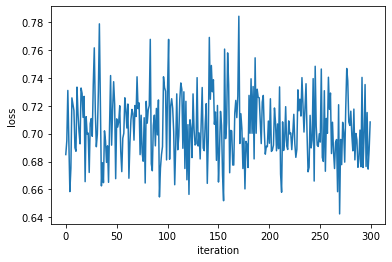

In [22]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

<h2 id="Question_3">Question 3:Find the misclassified samples</h2> 


<b>Identify the first four misclassified samples using the validation data:</b>


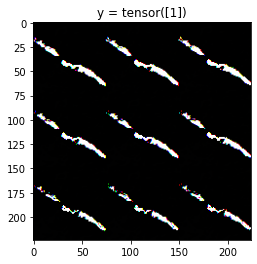

yhat:  tensor([0])


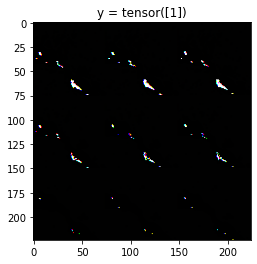

yhat:  tensor([0])


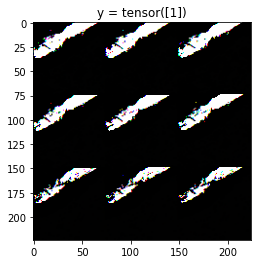

yhat:  tensor([0])


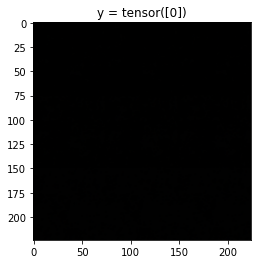

yhat:  tensor([1])


In [33]:
IMAGE_SIZE = 224

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().astype(np.uint8).reshape(IMAGE_SIZE,IMAGE_SIZE,3), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

count = 0
valid_one_batch = DataLoader(dataset=validation_dataset, batch_size=1)

for x, y in valid_one_batch:
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 4: # Select just first (4) misclassified samples
        break  

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork20647850-2022-01-01"> CLICK HERE </a> Click here to see how to share your notebook.


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork20647850-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-21        | 2.0     | Shubham    | Migrated Lab to Markdown and added to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


Copyright © 2018 <a href="https://cognitiveclass.ai/?utm_medium=dswb&utm_source=bducopyrightlink&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork20647850-2022-01-01&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0321ENSkillsNetwork20647850-2022-01-01">MIT License</a>.
